<img src="imagen/logo.png" width="100" height="100" align="right"/>

<h1><center>Proyecto Data Science (G30)</center></h1>
<h1><center>Hito 3</center></h1>
<h1><center>Tema: Otorgar Nuevos Créditos</center></h1>
<h3><bold>Alumnos :</bold> Claudia Villegas - Isabel Pilar - Barbara Herrera - Miguel Peña - Alexis Tapia</h3>

# 1. Objetivo

### ¿Cómo predecir el comportamiento de futuros buenos pagadores?

Este proyecto se enmarca en un caso práctico, para dar conformidad al plan de estudios de la carrera de Data Science. 

Los datos de estudio para la elaboración de esta propuesta fueron suministrados por Desafío Latam.

El caso de estudio seleccionado se enmarca en la industria bancaria, en particular en el análisis del comportamiento del pago de los clientes del banco International referente a la cartera de consumo para predecir el comportamiento de futuros buenos pagadores.

La motivación de este proyecto nace a partir de la necesidad de los bancos de disminuir los riesgos de crédito al facilitar préstamos a clientes que sean mejores pagadores, donde cada día las técnicas de Machine Learning se vuelven imprescindibles para trabajar con una alta cantidad de datos. 

__El vector objetivo es obtener un modelo capaz de predecir si el cliente presenta dificultades para pagar.__

Respecto de la implementación y pre procesamiento, en esta etapa, se tomarán las siguientes consideraciones:

1.- Eliminar columnas: las columnas que no generen un valor significativo al modelo o columnas repetidas, serán eliminadas.

2.- Valores nulos o perdidos: si se presentan demasiados nulos en los atributos que superen cierto umbral que se definirá posteriormente, se eliminarán las columnas respectivas.

3.- Valores atipicos: la variable será analizada, y si esta aporta valor al modelo, los valores outliers se reemplazarán por la media o mediana según corresponda. 

4.- Transformación del tipo de dato: si las variables no corresponden con el tipo de dato indicado, este será transformado a su tipo de dato correspondiente.

5.- Recodificación de variables: se analizará la variable, para recodificar o transformar la variable según corresponda.

# 2. Análisis Exploratorio

## 2.1 Importar librerías necesarias

In [1]:
#!pip install imblearn
#!pip install pygam

In [2]:
#%matplotlib inline

# Manipulación y limpieza de datos
# ==========================================================================================
import pandas as pd

# Análisis de datos
# ==========================================================================================
import numpy as np

# Visualizacion de gráficos
# ==========================================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as mtick
import seaborn as sns

# Procesamiento
# ==========================================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, LabelBinarizer
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

# Desbalanceo de clases
# ==========================================================================================
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Modelos Econometricos 
# ==========================================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Machine Learning
# ==========================================================================================
from pygam import LogisticGAM
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier  

# Funciones de estadística matemática
# ==========================================================================================
from statistics import quantiles

# Metricas 
# ==========================================================================================
from sklearn.metrics import plot_roc_curve, confusion_matrix, make_scorer
from sklearn.metrics import accuracy_score,recall_score,accuracy_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, cohen_kappa_score
from scipy.stats import ks_2samp
from sklearn.metrics import ConfusionMatrixDisplay

# Funciones propias
# ==========================================================================================
import funciones_auxiliares as hlp  

# Utilitarios
# ==========================================================================================
from math import ceil
from itertools import zip_longest

# Sistema
# ==========================================================================================
import pickle

In [3]:
#Configuracion de warnings
# ==========================================================================================
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Configuración matplotlib 
# ==========================================================================================
plt.style.use('ggplot')
sns.set_style("darkgrid")
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams["figure.figsize"] = ( 6, 4 )
plt.rcParams["figure.dpi"] = 100 

## 2.2 Ingesta de Datos

In [4]:
%%time
# Lectura de la data train 
df_train = pd.read_csv('data/training_new_credits.csv')
data = df_train.copy()

Wall time: 4.66 s


In [5]:
# Visualización de los primeros 5 registros de la data train
pd.options.display.max_columns = None
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
# Visualización de los últimos 5 registros de la data train
df_train.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

## 2.3 Comprobación de dimensión y tipo de datos

In [7]:
# Número de observaciones totales iniciales
print ("Train data shape:", df_train.shape)

Train data shape: (307511, 122)


In [8]:
# Tipo de datos de data train
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

* El total de registros del dataset es de 307511 filas, con un total de 106 columnas definidas como tipo numérico y 16 columnas definidas como tipo `object` o categóricas. Existen varias columnas con valores ausentes `NaN`, otras con valores negativos, los que serán analizados posteriormente, antes de crear los modelos.

## 2.4 Cartera de observaciones a seleccionar

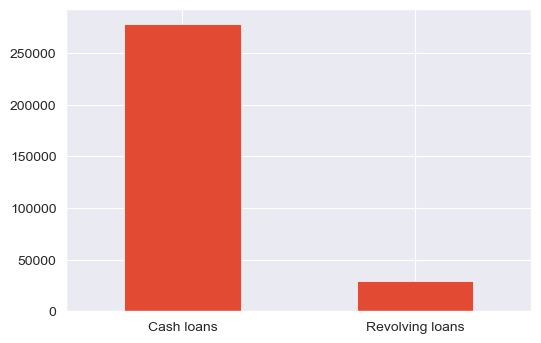

In [9]:
# Atributo NAME_CONTRACT_TYPE, identificación si el préstamo es en efectivo o crédito revolving 
df_train['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar');
plt.xticks(rotation=0);

Se modelará solamente créditos del tipo `Cash Loans`, referidos a préstamos en efectivo, ya que se visualizan un mayor número de observaciones.

In [10]:
# Selección de observaciones "Cash loans", que será cartera a modelar ya que existen un mayor número de ellas
#==================================================================================================
df_train = df_train[df_train['NAME_CONTRACT_TYPE'] == 'Cash loans']
df_train.sample()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
260060      400945       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
260060               N             0           90000.0    373941.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
260060      34425.0         346500.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
260060  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
260060                     0.00702      -10043          -2606   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
260060           -10026.0              -64          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
260060               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
260060           0        Laborers              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
260060                            2                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
260060                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
260060                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
260060                       0                       1   

        LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  \
260060                        1  Transport: type 2       0.27279   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
260060      0.494869           NaN             NaN               NaN   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
260060                          NaN              NaN             NaN   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
260060            NaN            NaN            NaN            NaN   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
260060           NaN                   NaN             NaN   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
260060                      NaN                NaN              NaN   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
260060                NaN                           NaN               NaN   

        COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
260060              NaN             NaN             NaN             NaN   

        FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
260060             NaN            NaN                    NaN              NaN   

        NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
260060                       NaN                 NaN              NaN   

        BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
260060                NaN                           NaN               NaN   

        COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  \
260060              NaN             NaN             NaN             NaN   

        FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  \
260060             NaN            NaN                    NaN              NaN   

        NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  \
260060                       NaN                 NaN                NaN   

       HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
260060            NaN             NaN                NaN                 NaN   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
260060             

In [11]:
# Eliminación de columna NAME_CONTRACT_TYPE por seleccion de cartera de prestamo en Efectivo.
#==================================================================================================
df_train = df_train.drop('NAME_CONTRACT_TYPE', axis=1)

## 2.5 Dimensión de cartera seleccionada

In [12]:
# Número de observaciones a considerar para análisis
print('Número de filas   :{}'.format(df_train.shape[0]))
print('Número de columnas:{}'.format(df_train.shape[1]))

Número de filas   :278232
Número de columnas:121


## 2.6 Información general de los datos

In [13]:
# Información general de los datos
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278232 entries, 0 to 307510
Data columns (total 121 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    278232 non-null  int64  
 1    TARGET                        278232 non-null  int64  
 2    CODE_GENDER                   278232 non-null  object 
 3    FLAG_OWN_CAR                  278232 non-null  object 
 4    FLAG_OWN_REALTY               278232 non-null  object 
 5    CNT_CHILDREN                  278232 non-null  int64  
 6    AMT_INCOME_TOTAL              278232 non-null  float64
 7    AMT_CREDIT                    278232 non-null  float64
 8    AMT_ANNUITY                   278220 non-null  float64
 9    AMT_GOODS_PRICE               278232 non-null  float64
 10   NAME_TYPE_SUITE               277225 non-null  object 
 11   NAME_INCOME_TYPE              278232 non-null  object 
 12   NAME_EDUCATION_TYPE         

* La base de datos a trabajar cuenta con 278232 observaciones y 121 atributos.

## 2.7. Distribución de variable objetivo TARGET

0    255011
1     23221
Name: TARGET, dtype: int64


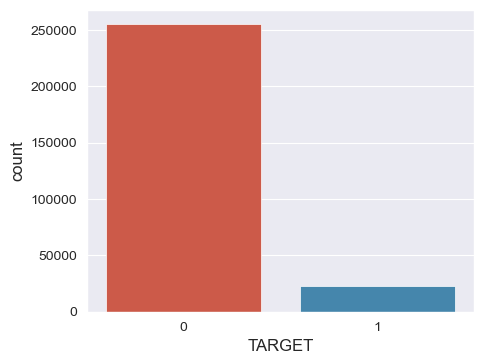

In [14]:
plt.figure(figsize = (5,4))
# 1: Mal pagador 
# 0: Buen pagador
target = df_train['TARGET'] 
print(target.value_counts())
sns.countplot(x = 'TARGET', data=df_train);

- Se aprecia que este es un problema de clase desbalanceada.Hay muchos más clientes que son buenos pagadores al solicitar un préstamo en efectivo que los que tuvieron dificultades para pagar. Es de especial cuidado este desbalanceo para las métricas de los modelos que se definirán en etapas posteriores para este tipo de clasificación.

## 2.8 Análisis descriptivo preliminar

Se separán los datos por tipo de dato, para realizar un análisis mas individualizado de las variables del dataset. 

### 2.8.1 Estadística básica

In [15]:
df_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  278232.000000  278232.000000  278232.000000      2.782320e+05   
mean   278125.362338       0.083459       0.410025      1.690695e+05   
std    102760.412749       0.276575       0.719522      2.459110e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189087.250000       0.000000       0.000000      1.125000e+05   
50%    278161.500000       0.000000       0.000000      1.530000e+05   
75%    367054.250000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.782320e+05  278220.000000     2.782320e+05   
mean   6.279657e+05   28244.263958     5.605637e+05   
std    4.054070e+05   14167.189802     3.736466e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.970000e+05   18103.500000     2.475000e+05   
50%    5.400000e+05   26086.500000     4.545000e+05   
75%    8.353800e+05   35694.000000     7.020000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               278232.000000  278232.000000  278232.000000   
mean                     0.020748  -16159.256060   66310.442020   
std                      0.013734    4343.738866  143346.548212   
min                      0.000533  -25201.000000  -17912.000000   
25%                      0.010006  -19791.000000   -2779.000000   
50%                      0.018850  -15874.000000   -1220.000000   
75%                      0.028663  -12552.000000    -271.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE     FLAG_MOBIL  \
count      278232.000000    278232.000000  94452.000000  278232.000000   
mean        -5009.613488     -3020.079240     12.019618       0.999996   
std          3535.561853      1501.233328     11.648180       0.001896   
min        -24672.000000     -7197.000000      0.000000       0.000000   
25%         -7509.000000     -4310.000000      5.000000       1.000000   
50%         -4522.000000     -3294.000000      9.000000       1.000000   
75%         -2028.000000     -1768.000000     15.000000       1.000000   
max             0.000000         0.000000     91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   278232.000000    278232.000000     278232.000000  278232.000000   
mean         0.813041         0.203729          0.999493       0.284184   
std          0.389879         0.402771          0.022506       0.451026   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  278232.000000    278232.000000         278232.000000   
mean        0.057531         2.149307              2.056029   
std         0.232855         0.906035              0.507045   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                278232.000000            278232.000000   
mean                      2.035291                12.025389   
std                       0.501058                 3.268399   
min                       1.000000                 0.000000   
25%                       2.000000 

### 2.8.2 Estadística básica datos continuos

In [16]:
# Análisis estadistico datos continuos
df_train.select_dtypes(include=['float64']).describe()

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      2.782320e+05  2.782320e+05  278220.000000     2.782320e+05   
mean       1.690695e+05  6.279657e+05   28244.263958     5.605637e+05   
std        2.459110e+05  4.054070e+05   14167.189802     3.736466e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.970000e+05   18103.500000     2.475000e+05   
50%        1.530000e+05  5.400000e+05   26086.500000     4.545000e+05   
75%        2.025000e+05  8.353800e+05   35694.000000     7.020000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE  DAYS_REGISTRATION   OWN_CAR_AGE  \
count               278232.000000      278232.000000  94452.000000   
mean                     0.020748       -5009.613488     12.019618   
std                      0.013734        3535.561853     11.648180   
min                      0.000533      -24672.000000      0.000000   
25%                      0.010006       -7509.000000      5.000000   
50%                      0.018850       -4522.000000      9.000000   
75%                      0.028663       -2028.000000     15.000000   
max                      0.072508           0.000000     91.000000   

       CNT_FAM_MEMBERS   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  \
count    278232.000000  120217.000000  2.776330e+05  223574.000000   
mean          2.149307       0.503116  5.134032e-01       0.511213   
std           0.906035       0.210994  1.917442e-01       0.194741   
min           1.000000       0.014568  8.173617e-08       0.000527   
25%           2.000000       0.335302  3.902801e-01       0.370650   
50%           2.000000       0.507617  5.653812e-01       0.537070   
75%           3.000000       0.675987  6.632655e-01       0.669057   
max          20.000000       0.962693  8.549997e-01       0.896010   

       APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
count   135824.000000     114278.000000                141294.000000   
mean         0.116954          0.088323                     0.977756   
std          0.107668          0.082430                     0.058890   
min          0.000000          0.000000                     0.000000   
25%          0.057700          0.044000                     0.976700   
50%          0.086600          0.076200                     0.981600   
75%          0.148100          0.111900                     0.986600   
max          1.000000          1.000000                     1.000000   

       YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
count     92241.000000    82996.000000  128741.000000  136910.000000   
mean          0.752227        0.044393       0.078172       0.149732   
std           0.113036        0.075464       0.133848       0.100382   
min           0.000000        0.000000       0.000000       0.000000   
25%           0.687200        0.007800       0.000000       0.069000   
50%           0.755200        0.021000       0.000000       0.137900   
75%           0.823200        0.051300       0.120000       0.206900   
max           1.000000        1.000000       1.000000       1.000000   

       FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
count  138563.000000   88518.000000  111900.000000          87169.000000   
mean        0.225022       0.230468       0.066275              0.100313   
std         0.143495       0.160262       0.081131              0.092040   
min         0.000000       0.000000       0.000000              0.000000   
25%         0.166700       0.083300       0.018600              0.050400   
50%         0.166700       0.208300       0.048100              0.075200   
75%         0.333300       0.375000       0.085600              0.121000   
max         1.000000       1.000000       1.000000              1.000000   

       LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
count   137415.000000             8

- Se observa que el monto del crédito `AMT_CREDIT` se ajusta a los montos en los que será utilizado el préstamo y que la mitad de los clientes solicitaron cifras superiores a 540000, y se tiene una media de 627966, también se puede inferir que estan variables estas muy correlacionadas.
- Existes variables que continen los sufijos `AVG`, `MODE` y `MEDI`que cuentan con una gran cantidad de valores nulos.

### 2.8.3 Estadística básica datos discretos

In [17]:
# Análisis estadistico datos discretos
df_train.select_dtypes(include=['int']).describe()

SK_ID_CURR         TARGET   CNT_CHILDREN     DAYS_BIRTH  \
count  278232.000000  278232.000000  278232.000000  278232.000000   
mean   278125.362338       0.083459       0.410025  -16159.256060   
std    102760.412749       0.276575       0.719522    4343.738866   
min    100002.000000       0.000000       0.000000  -25201.000000   
25%    189087.250000       0.000000       0.000000  -19791.000000   
50%    278161.500000       0.000000       0.000000  -15874.000000   
75%    367054.250000       0.000000       1.000000  -12552.000000   
max    456255.000000       1.000000      19.000000   -7489.000000   

       DAYS_EMPLOYED  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count  278232.000000    278232.000000  278232.000000   278232.000000   
mean    66310.442020     -3020.079240       0.999996        0.813041   
std    143346.548212      1501.233328       0.001896        0.389879   
min    -17912.000000     -7197.000000       0.000000        0.000000   
25%     -2779.000000     -4310.000000       1.000000        1.000000   
50%     -1220.000000     -3294.000000       1.000000        1.000000   
75%      -271.000000     -1768.000000       1.000000        1.000000   
max    365243.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    278232.000000     278232.000000  278232.000000  278232.000000   
mean          0.203729          0.999493       0.284184       0.057531   
std           0.402771          0.022506       0.451026       0.232855   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         278232.000000                278232.000000   
mean               2.056029                     2.035291   
std                0.507045                     0.501058   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            278232.000000               278232.000000   
mean                 12.025389                    0.014409   
std                   3.268399                    0.119169   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               278232.000000                278232.000000   
mean                     0.049646                     0.040150   
std                      0.217212                     0.196311   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count           278232.000000           278232.000000   
mean                 0.076990                0.229841   
std                  0.266576                0.420731   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000      

- Se puede inferir que existen atributos que definen características que corresponden a categorías y se identifican como variables del tipo `int`, por lo que se realizará la transformación del tipo de dato a tipo `object` para proceder correctamente con los análisis posterires.
- Respecto del `TARGET`, se aprecia que existe más del 75% de los clientes son buenos pagadores, esto infiere que los clientes que tiene un mal comportamiento de pago no son la mayoría, además de indicar que el dataset se encuentra desbalanceado.
- La variable `DAYS_EMPLOYED`, cuenta con un valor máximo de 365243, lo que podria indicar un valor referencial asociado a cliente no presenta dias trabajados previos a la postulación, en los atributos `DAYS_REGISTRATION` y `DAYS_ID_PUBLISH` el valor máximo es 0.

### 2.8.4 Estadística básica datos categóricos

In [18]:
# Analisis estadistico datos categóricos
df_train.describe(include = 'object').T

count unique                            top  \
CODE_GENDER                 278232      2                              F   
FLAG_OWN_CAR                278232      2                              N   
FLAG_OWN_REALTY             278232      2                              Y   
NAME_TYPE_SUITE             277225      7                  Unaccompanied   
NAME_INCOME_TYPE            278232      7                        Working   
NAME_EDUCATION_TYPE         278232      5  Secondary / secondary special   
NAME_FAMILY_STATUS          278232      5                        Married   
NAME_HOUSING_TYPE           278232      6              House / apartment   
OCCUPATION_TYPE             189432     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  278232      7                        TUESDAY   
ORGANIZATION_TYPE           278232     58         Business Entity Type 3   
FONDKAPREMONT_MODE           87022      4               reg oper account   
HOUSETYPE_MODE              137401      3                 block of flats   
WALLSMATERIAL_MODE          135590      7                          Panel   
EMERGENCYSTATE_MODE         145123      2                             No   

                              freq  
CODE_GENDER                 182800  
FLAG_OWN_CAR                183775  
FLAG_OWN_REALTY             190207  
NAME_TYPE_SUITE             224541  
NAME_INCOME_TYPE            142719  
NAME_EDUCATION_TYPE         200125  
NAME_FAMILY_STATUS          178711  
NAME_HOUSING_TYPE           247389  
OCCUPATION_TYPE              50131  
WEEKDAY_APPR_PROCESS_START   49110  
ORGANIZATION_TYPE            60755  
FONDKAPREMONT_MODE           66104  
HOUSETYPE_MODE              134949  
WALLSMATERIAL_MODE           59340  
EMERGENCYSTATE_MODE         143014

- Del análisis, existen varias categorías clasificadas en varios grupos, como el atributo `ORGANIZATION_TYPE` que tiene más de 58 niveles por lo que los atributos serán analizados y recodificados posteriormente.
- La mayoría de los clientes son mujeres que solicitaron el préstamo.
- Muchos de los clientes no tiene automovil, pero si son propietarios de una casa o departamento.
- Los clientes prefieren no ir acompañados y la mayoría trabajan.

## 2.9 Inspección de Valores Nulos

### 2.9.1 Porcentaje de valores nulos

In [19]:
# Porcentaje de atributos nulos por atributo del dataset
#==================================================================================================
pd.options.display.max_columns = None
missing_df = hlp.missing_values(df_train)
missing_df.T

COMMONAREA_AVG  COMMONAREA_MODE  COMMONAREA_MEDI  \
Total Nulos   195236.000000    195236.000000    195236.000000   
Porcentaje        70.170218        70.170218        70.170218   

             NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MODE  \
Total Nulos            194054.000000             194054.000000   
Porcentaje                 69.745392                 69.745392   

             NONLIVINGAPARTMENTS_MEDI  FONDKAPREMONT_MODE  \
Total Nulos             194054.000000       191210.000000   
Porcentaje                  69.745392           68.723224   

             LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  \
Total Nulos           191063.00000          191063.00000   
Porcentaje                68.67039              68.67039   

             LIVINGAPARTMENTS_MODE  FLOORSMIN_AVG  FLOORSMIN_MODE  \
Total Nulos           191063.00000  189714.000000   189714.000000   
Porcentaje                68.67039      68.185543       68.185543   

             FLOORSMIN_MEDI  YEARS_BUILD_AVG  YEARS_BUILD_MEDI  \
Total Nulos   189714.000000    185991.000000     185991.000000   
Porcentaje        68.185543        66.847451         66.847451   

             YEARS_BUILD_MODE   OWN_CAR_AGE  LANDAREA_MEDI   LANDAREA_AVG  \
Total Nulos     185991.000000  183780.00000  166332.000000  166332.000000   
Porcentaje          66.847451      66.05279      59.781765      59.781765   

             LANDAREA_MODE  BASEMENTAREA_MEDI  BASEMENTAREA_AVG  \
Total Nulos  166332.000000      163954.000000     163954.000000   
Porcentaje       59.781765          58.927082         58.927082   

             BASEMENTAREA_MODE   EXT_SOURCE_1  NONLIVINGAREA_AVG  \
Total Nulos      163954.000000  158015.000000        154702.0000   
Porcentaje           58.927082      56.792533            55.6018   

             NONLIVINGAREA_MODE  NONLIVINGAREA_MEDI  ELEVATORS_MODE  \
Total Nulos         154702.0000         154702.0000   149491.000000   
Porcentaje              55.6018             55.6018       53.728902   

             ELEVATORS_AVG  ELEVATORS_MEDI  WALLSMATERIAL_MODE  \
Total Nulos  149491.000000   149491.000000       142642.000000   
Porcentaje       53.728902       53.728902           51.267288   

             APARTMENTS_AVG  APARTMENTS_MEDI  APARTMENTS_MODE  ENTRANCES_AVG  \
Total Nulos   142408.000000    142408.000000    142408.000000  141322.000000   
Porcentaje        51.183185        51.183185        51.183185      50.792864   

             ENTRANCES_MEDI  ENTRANCES_MODE  HOUSETYPE_MODE  LIVINGAREA_MEDI  \
Total Nulos   141322.000000   141322.000000   140831.000000     140817.00000   
Porcentaje        50.792864       50.792864       50.616392         50.61136   

             LIVINGAREA_MODE  LIVINGAREA_AVG  FLOORSMAX_MEDI  FLOORSMAX_MODE  \
Total Nulos     140817.00000    140817.00000   139669.000000   139669.000000   
Porcentaje          50.61136        50.61136       50.198755       50.198755   

             FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MEDI  \
Total Nulos  139669.000000                   136938.0000   
Porcentaje       50.198755                       49.2172   

             YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG  \
Total Nulos                   136938.0000                  136938.0000   
Porcentaje                        49.2172                      49.2172   

             TOTALAREA_MODE  EMERGENCYSTATE_MODE  OCCUPATION_TYPE  \
Total Nulos   135514.000000         133109.00000     88800.000000   
Porcentaje        48.705397             47.84101        31.915811   

             EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_WEEK  \
Total Nulos  54658.000000                37239.000000   
Porcentaje      19.644757                   13.384154   

             AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  \
Total Nulos                37239.000000               37239.000000   
Porcentaje                    13.384154                  13.384154   

             AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_DAY  \
Total N

### 2.9.2 Atributos que superan umbral 45% de valores nulos

In [20]:
# Lista de atributos nulos que superan el porcentaje definido como umbral mayor a 45%
#==================================================================================================
columns_nulls = list(missing_df[missing_df["Porcentaje"] > 45].T.columns)
print(f'Lista de atributos que serán eliminados: \n\n{columns_nulls}\n')
print(f'Cantidad de columnas que serán eliminadas por superar umbral de datos nulos: {len(columns_nulls)} columnas.')     

Lista de atributos que serán eliminados: 

['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'HOUSETYPE_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_A

* Existe 49 atributos con más de 45% de valores nulos y que contienen los sufijos `AVG`(Promedio), `MODE`(Moda), `MEDI`(Mediana) que corresponden a las características del lugar donde vive el cliente. Estos datos serán eliminados ya que superan el umbral de porcentaje nulos definido, y además se encuentran normalizados. Como se desconoce los atributos originales desde donde se obtuvieron estos valores se eliminan porque no aportan información relevante para el caso de estudio.

### 2.9.3 Eliminación de valores nulos que superan umbral

In [21]:
# Eliminación de 49 Atributos que superan umbral de 45% de nulos
#==================================================================================================
columns_nulls_drop = ['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'HOUSETYPE_MODE', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE']
df_train = df_train.drop(columns=columns_nulls_drop)

In [22]:
# Dimensión de la data posterior a la eliminación de atributos que superan umbral
df_train.shape

(278232, 72)

### 2.9.4 Imputación de valores Nulos

- Se analiza el porcentaje de valores nulos de los atributos restantes para imputar los valores `NaN` por `Unknown` como reemplazo a los atributos categóricos o por imputar por la mediana o reemplazar por valor 0, según sea el caso para variables numéricas o eliminar el atributo.

In [23]:
# Nulos de variables categoricas
df_obj = df_train.select_dtypes(include=['object'])
missing_df_obj = hlp.missing_values(df_obj)
missing_df_obj.head(2)

Total Nulos  Porcentaje
OCCUPATION_TYPE        88800   31.915811
NAME_TYPE_SUITE         1007    0.361928

In [24]:
# Atributo OCCUPATION_TYPE - Profesion del cliente
#==================================================================================================
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].replace(np.nan,'Unknown')

In [25]:
# Atributo NAME_TYPE_SUITE - Quien acompana al cliente cuando solicta el préstamo
#==================================================================================================
df_train['NAME_TYPE_SUITE'] = df_train['NAME_TYPE_SUITE'].replace(np.nan,'Unknown')

In [26]:
# Nulos de variables continuas
df_num = df_train.select_dtypes(include=['float64', 'int'])
missing_df_num = hlp.missing_values(df_num)
missing_df_num.head(14)

Total Nulos  Porcentaje
EXT_SOURCE_3                      54658   19.644757
AMT_REQ_CREDIT_BUREAU_YEAR        37239   13.384154
AMT_REQ_CREDIT_BUREAU_QRT         37239   13.384154
AMT_REQ_CREDIT_BUREAU_MON         37239   13.384154
AMT_REQ_CREDIT_BUREAU_WEEK        37239   13.384154
AMT_REQ_CREDIT_BUREAU_DAY         37239   13.384154
AMT_REQ_CREDIT_BUREAU_HOUR        37239   13.384154
EXT_SOURCE_2                        599    0.215288
AMT_ANNUITY                          12    0.004313
DAYS_LAST_PHONE_CHANGE                1    0.000359
DEF_60_CNT_SOCIAL_CIRCLE              1    0.000359
OBS_60_CNT_SOCIAL_CIRCLE              1    0.000359
DEF_30_CNT_SOCIAL_CIRCLE              1    0.000359
OBS_30_CNT_SOCIAL_CIRCLE              1    0.000359

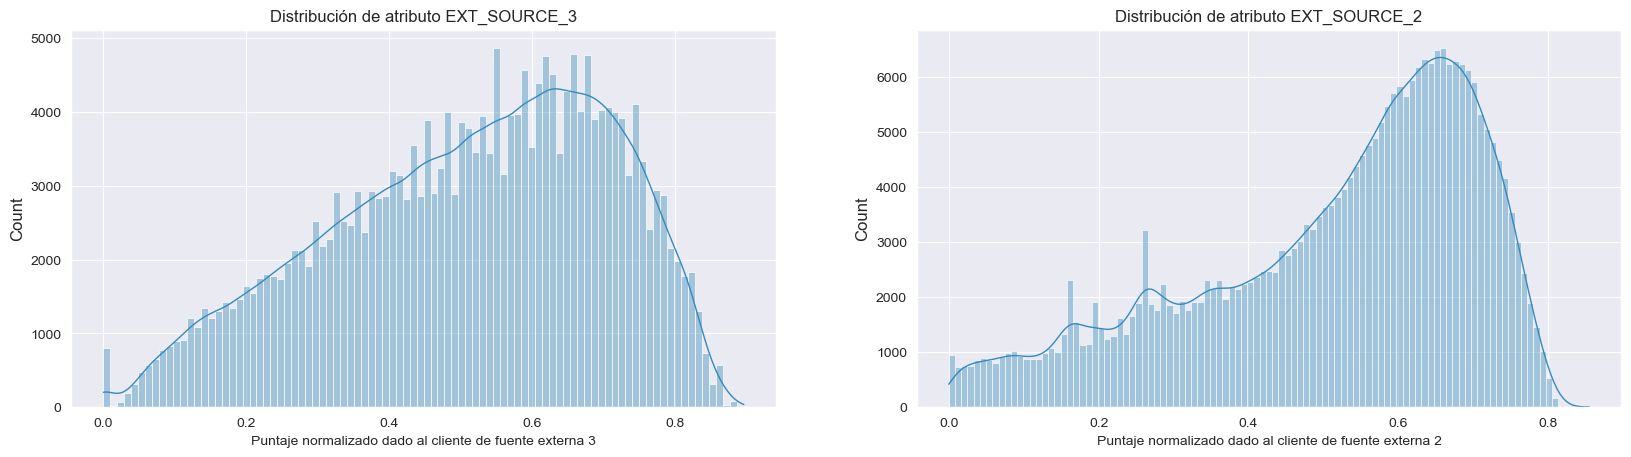

In [27]:
# Distribucion de EXT_SOURCE_3 y EXT_SOURCE_2 con valores nulos
plt.figure(figsize = (20,5))

# Atributo EXT_SOURCE_3 - Puntaje normalizado de fuente externa 3
plt.subplot(1,2,1)
plt.title('Distribución de atributo EXT_SOURCE_3',  fontsize=12);
sns.histplot(x="EXT_SOURCE_3",  data=df_train, kde=True, line_kws={'linewidth':1}, alpha=0.4);
plt.xlabel('Puntaje normalizado dado al cliente de fuente externa 3', fontsize = 10);

# Atributo EXT_SOURCE_2 - Puntaje normalizado de fuente externa 2
plt.subplot(1,2,2)
plt.title('Distribución de atributo EXT_SOURCE_2',  fontsize=12);
sns.histplot(x="EXT_SOURCE_2",  data=df_train, kde=True, line_kws={'linewidth':1}, alpha=0.4);
plt.xlabel('Puntaje normalizado dado al cliente de fuente externa 2', fontsize = 10);

In [28]:
# Imputar por la mediana variable EXT_SOURCE_3
median_ext_source_3 = df_train['EXT_SOURCE_3'].median()

# Mediana de fuente externa 3 serializada
#==================================================================================================
pickle.dump(median_ext_source_3, open('median_ext_source_3.pkl', 'wb'))

# EXT_SOURCE_3 se reemplazan los valores NaN por la mediana
#==================================================================================================
df_train['EXT_SOURCE_3'] = df_train['EXT_SOURCE_3'].replace(np.nan, df_train['EXT_SOURCE_3'].median())

In [29]:
# Imputar por la mediana variable EXT_SOURCE_2, ya que cuenta con menos observaciones nulas
median_ext_source_2 = df_train['EXT_SOURCE_2'].median()

# Mediana de fuente externa 2 serializada
#==================================================================================================
pickle.dump(median_ext_source_2, open('median_ext_source_2.pkl', 'wb'))

# EXT_SOURCE_2 se reemplazan los valores NaN por la mediana
#==================================================================================================
df_train['EXT_SOURCE_2'] = df_train['EXT_SOURCE_2'].replace(np.nan, df_train['EXT_SOURCE_2'].median())

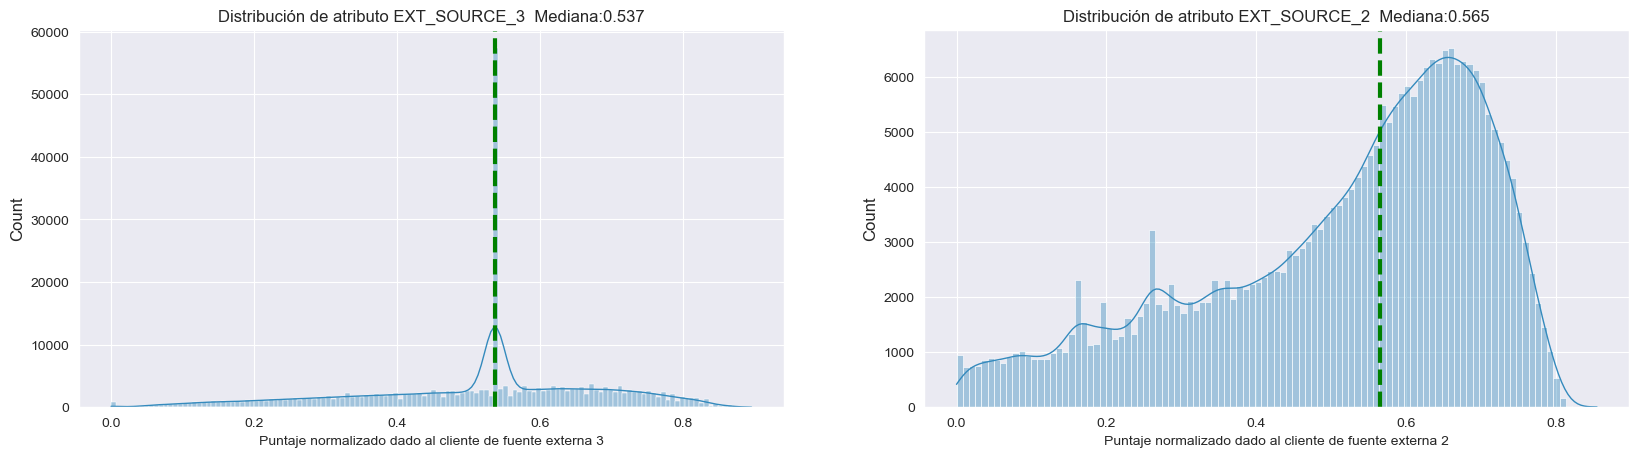

In [30]:
# Distribucion de EXT_SOURCE_3 y EXT_SOURCE_2 sin valores nulos
plt.figure(figsize = (20,5))

# Atributo EXT_SOURCE_3 - Puntaje normalizado de fuente externa 3
plt.subplot(1,2,1)
plt.title('Distribución de atributo EXT_SOURCE_3  Mediana:'+str(round(median_ext_source_3, 3)), fontsize=12);
sns.histplot(x="EXT_SOURCE_3",  data=df_train, kde=True, line_kws={'linewidth':1}, alpha=0.4);
plt.axvline(median_ext_source_3 ,  color = 'g', linestyle='--', lw = 3, label = 'Mediana' )
plt.xlabel('Puntaje normalizado dado al cliente de fuente externa 3', fontsize = 10);

# Atributo EXT_SOURCE_2 - Puntaje normalizado de fuente externa 2
plt.subplot(1,2,2)
plt.title('Distribución de atributo EXT_SOURCE_2  Mediana:'+str(round(median_ext_source_2, 3)), fontsize=12);
sns.histplot(x="EXT_SOURCE_2",  data=df_train, kde=True, line_kws={'linewidth':1}, alpha=0.4);
plt.axvline(median_ext_source_2 ,  color = 'g', linestyle='--', lw = 3, label = 'Mediana' )
plt.xlabel('Puntaje normalizado dado al cliente de fuente externa 2', fontsize = 10);

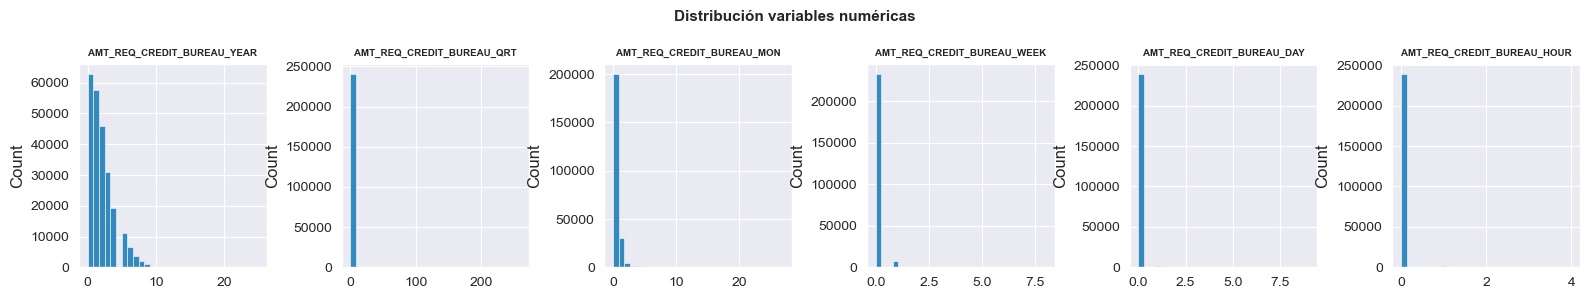

In [31]:
# Distribucion de atributos con valores nulos
plt.figure(figsize = (16,3))
df_amt_req_credit_bureau = df_train.loc[:, ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                                         'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
                                        'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']]
cols_amt_req = len(df_amt_req_credit_bureau.columns)
hlp.grid_plot_batch(df_amt_req_credit_bureau, cols_amt_req)

In [32]:
# Imputacion de nulos por valor 0 a los siguientes atributos:

# Atributo AMT_REQ_CREDIT_BUREAU_YEAR - Cantidad de consultas sobre el cliente al buró de credito. Una year antes de la postulacion
# AMT_REQ_CREDIT_BUREAU_YEAR se reemplazan los valores NaN por 0
#==================================================================================================
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(np.nan,0)

# AMT_REQ_CREDIT_BUREAU_QRT se reemplazan los valores NaN por 0
#==================================================================================================
df_train['AMT_REQ_CREDIT_BUREAU_QRT'] = df_train['AMT_REQ_CREDIT_BUREAU_QRT'].replace(np.nan,0)

# AMT_REQ_CREDIT_BUREAU_MON se reemplazan los valores NaN por 0
#==================================================================================================
df_train['AMT_REQ_CREDIT_BUREAU_MON'] = df_train['AMT_REQ_CREDIT_BUREAU_MON'].replace(np.nan,0)

# AMT_REQ_CREDIT_BUREAU_WEEK se reemplazan los valores NaN por 0
#==================================================================================================
df_train['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].replace(np.nan,0)

# AMT_REQ_CREDIT_BUREAU_YEAR se reemplazan los valores NaN por 0
#==================================================================================================
df_train['AMT_REQ_CREDIT_BUREAU_DAY'] = df_train['AMT_REQ_CREDIT_BUREAU_DAY'].replace(np.nan,0)

# AMT_REQ_CREDIT_BUREAU_HOUR se reemplazan los valores NaN por 0
#==================================================================================================
df_train['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].replace(np.nan,0)

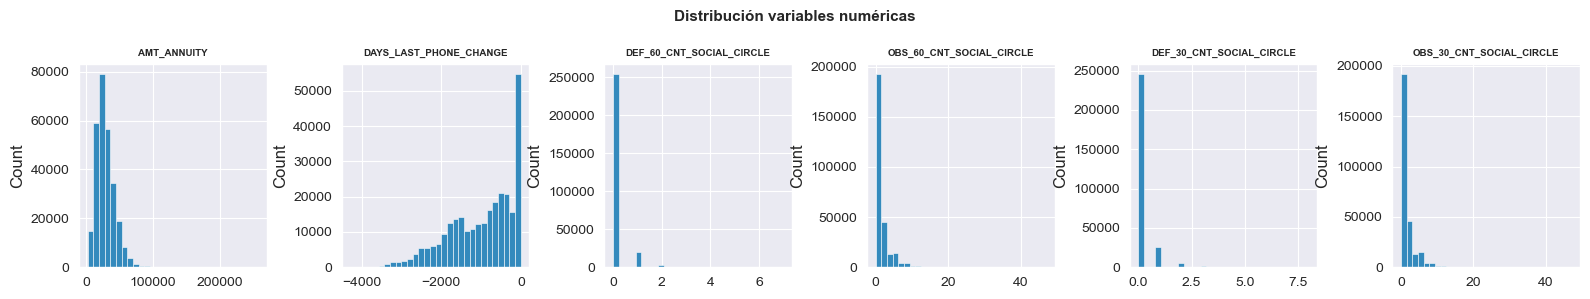

In [33]:
# Distribucion de atributos con 1 valor nulo
plt.figure(figsize = (16,3))
df_annuity_def_obs_dayslastphone = df_train.loc[:, ['AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                                            'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE']]
cols = len(df_annuity_def_obs_dayslastphone.columns)
hlp.grid_plot_batch(df_annuity_def_obs_dayslastphone, cols)

In [34]:
# Imputacion de nulos por valor 0 a los siguientes atributos:

# AMT_ANNUITY se reemplazan los valores NaN por 0
#==================================================================================================
df_train['AMT_ANNUITY'] = df_train['AMT_ANNUITY'].replace(np.nan,0)

# DAYS_LAST_PHONE_CHANGE se reemplazan los valores NaN por 0
#==================================================================================================
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].replace(np.nan,0)

# DEF_60_CNT_SOCIAL_CIRCLE se reemplazan los valores NaN por 0
#==================================================================================================
df_train['DEF_60_CNT_SOCIAL_CIRCLE'] = df_train['DEF_60_CNT_SOCIAL_CIRCLE'].replace(np.nan,0)

# OBS_60_CNT_SOCIAL_CIRCLE se reemplazan los valores NaN por 0
#==================================================================================================
df_train['OBS_60_CNT_SOCIAL_CIRCLE'] = df_train['OBS_60_CNT_SOCIAL_CIRCLE'].replace(np.nan,0)

# DEF_30_CNT_SOCIAL_CIRCLE se reemplazan los valores NaN por 0
#==================================================================================================
df_train['DEF_30_CNT_SOCIAL_CIRCLE'] = df_train['DEF_30_CNT_SOCIAL_CIRCLE'].replace(np.nan,0)

# OBS_30_CNT_SOCIAL_CIRCLE se reemplazan los valores NaN por 0
#==================================================================================================
df_train['OBS_30_CNT_SOCIAL_CIRCLE'] = df_train['OBS_30_CNT_SOCIAL_CIRCLE'].replace(np.nan,0)

In [35]:
# Resultado sin nulos en las variables
hlp.missing_values(df_train)

Total Nulos  Porcentaje
SK_ID_CURR                            0         0.0
TARGET                                0         0.0
FLAG_DOCUMENT_8                       0         0.0
FLAG_DOCUMENT_7                       0         0.0
FLAG_DOCUMENT_6                       0         0.0
...                                 ...         ...
FLAG_CONT_MOBILE                      0         0.0
FLAG_WORK_PHONE                       0         0.0
FLAG_EMP_PHONE                        0         0.0
FLAG_MOBIL                            0         0.0
AMT_REQ_CREDIT_BUREAU_YEAR            0         0.0

[72 rows x 2 columns]

* Para proceder con el análisis univariado de los atributos restantes, se procederá con la transformación del tipo de dato, para posteriormente separar por tipo de datos y la visualización con gráficos para continuar con el análisis de posibles atributos a ser eliminados, transformación o la recodificación según sea el caso.

## 2.10 Transformación de tipo de datos

In [36]:
# Columnas numéricas a modificar su tipo de dato
#==================================================================================================
columns_a_type_object = [ 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 
                          'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY', 
                          'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                          'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                          'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                          'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                          'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
                          'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'
                          ] 

In [37]:
# Modificación del tipo de dato
#==================================================================================================
df_train[columns_a_type_object] = df_train[columns_a_type_object].astype('object')

In [38]:
# Tipo de datos
df_train.dtypes.value_counts()

object     39
float64    20
int64      13
dtype: int64

In [39]:
df_obj = df_train.select_dtypes(include=['object'])
df_obj.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [40]:
df_num = df_train.select_dtypes(include=['float64', 'int'])
df_num.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

## 2.11 Análisis univariable de atributos con Gráficos 

* Del análisis en la estadística descriptiva, se observa que los valores en varias de las observaciones vienen dados en días negativos, en los atributos `DAYS_BIRTH`, `DAYS_EMPLOYED`, `DAYS_REGISTRATION`, `DAYS_ID_PUBLISH` y `DAYS_LAST_PHONE_CHANGE`, los que serán transformados a valores positivos, para dar claridad y mejor entendimiento de la variable a analizar.

Se separan los datos por tipo de datos para analizarlos, limpiarlos, recodificarlos o transformarlos, según corresponda.

### 2.11.1 Descripción de datos continuos y discretos

### Atributos :

* `SK_ID_CURR` : Id préstamo realizado.
* `CNT_CHILDREN`: Cantidad de hijos por parte del cliente.
* `AMT_INCOME_TOTAL` : Ingreso total del cliente.
* `AMT_CREDIT` : Cantidad total del préstamo realizado.
* `AMT_ANNUITY`: Anualidad del préstamo.
* `AMT_GOODS_PRICE` : Para préstamos de consumo representa el precio de los bienes que se comprara con el préstamo.
* `REGION_POPULATION_RELATIVE` : Población donde vive el cliente.
* `DAYS_BIRTH` : Edad del cliente cuando solicitó el préstamo.
* `DAYS_EMPLOYED` : Cantidad de días trabajados previos a la postulación.
* `DAYS_REGISTRATION` : Cantidad de días previos a la última modificación de los registros del cliente previos a la postulación.
* `DAYS_ID_PUBLISH` : Cantidad de días previos a la modificaciòn de su documento de identificaciòn con el cual postulación al préstamo.
* `FLAG_EMP_PHONE`: Da un teléfono de trabajo de contacto.
* `FLAG_WORK_PHONE`: Da un teléfono de hogar de contacto.
* `FLAG_PHONE`: Da un teléfono contacto el cliente.
* `CNT_FAM_MEMBERS`: Cuántos miembros familiares tiene el cliente.
* `REGION_RATING_CLIENT` : Evaluación interna (de Home Credit Group) sobre la región donde vive el cliente.
* `REG_CITY_NOT_LIVE_CITY` : Identificador booleano si es que la dirección permanente no concuerda con la dirección de contacto.
* `REG_CITY_NOT_WORK_CITY` : Identificador booleano si es que la dirección permanente no concuerda con la dirección del trabajo.
* `LIVE_CITY_NOT_WORK_CITY` : Identificador booleano si es que la dirección de contacto del cliente no concuerda con la dirección del trabajo.
* `EXT_SOURCE_2` : Puntaje normalizado de fuente externa.
* `EXT_SOURCE_3` : Puntaje normalizado de fuente externa.
* `OBS_30_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 30 días su entorno.
* `DEF_30_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 30 días su entorno.
* `OBS_60_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 60 días su entorno.
* `DEF_60_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 60 días su entorno.
* `DAYS_LAST_PHONE_CHANGE` : Hace cuántos días antes de la postulación cambia número de teléfono.
* `AMT_REQ_CREDIT_BUREAU_HOUR`: Cantidad de consultas sobre el cliente al buró de crédito. Una hora antes de la postulación.
* `AMT_REQ_CREDIT_BUREAU_DAY`: Cantidad de consultas sobre el cliente al buró de crédito. Un día antes de la postulación
* `AMT_REQ_CREDIT_BUREAU_WEEK`: Cantidad de consultas sobre el cliente al buró de crédito. Una semana antes de la postulación.
* `AMT_REQ_CREDIT_BUREAU_MON`: Cantidad de consultas sobre el cliente al buró de crédito. Un mes antes de la postulación.
* `AMT_REQ_CREDIT_BUREAU_QRT`: Cantidad de consultas sobre el cliente al buró de crédito. Tres meses antes de la postulación.
* `AMT_REQ_CREDIT_BUREAU_YEAR`: Cantidad de consultas sobre el cliente al buró de crédito. Un año antes de la postulación.

### 2.11.2 Creación y transformación de atributos

In [41]:
# Transformar la edad en años del atributo DAYS_BIRTH a valores positivos
#==================================================================================================
df_train['AGE'] = (df_train['DAYS_BIRTH'] * -1 ) /365

In [42]:
# Creación de variable RATIO_CREDIT_INCOME indica la proporcion ingreso-prestamo  
#==================================================================================================
df_train["RATIO_CREDIT_INCOME"] = df_train["AMT_INCOME_TOTAL"] / df_train["AMT_CREDIT"]

In [43]:
# Selección de datos continuos para realizar graficos
#==================================================================================================
df_train_num = df_train.select_dtypes(include=['float64', 'int'])
df_train_num.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'RATIO_CREDIT_INCOME'],
      dtype='object')

### 2.11.3 Gráficos variables continuas

### Gráfico de los atributos:

* `AMT_INCOME_TOTAL` : Ingreso total del cliente.
* `AMT_CREDIT` : Cantidad total del préstamo realizado.
* `AMT_ANNUITY`: Anualidad del préstamo.

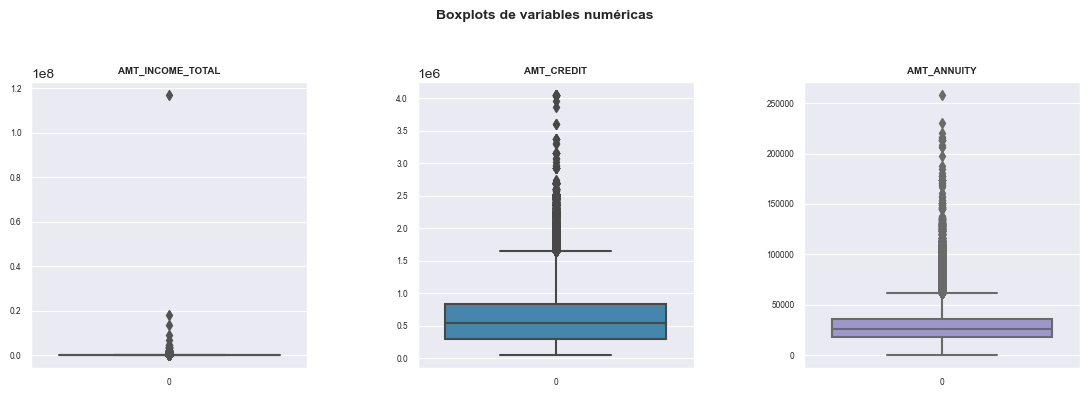

In [44]:
# Graficos boxplot de atributos
data_graf_num1 = df_train_num.loc[:, [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']]
hlp.grafico_boxplot(data_graf_num1)

- Los atributos `AMT_INCOME_TOTAL`, `AMT_CREDIT` y `AMT_ANNUITY`, se transformarán utilizando logaritmo para visualizar si presentan una distribución más cercana a la distribución normal.

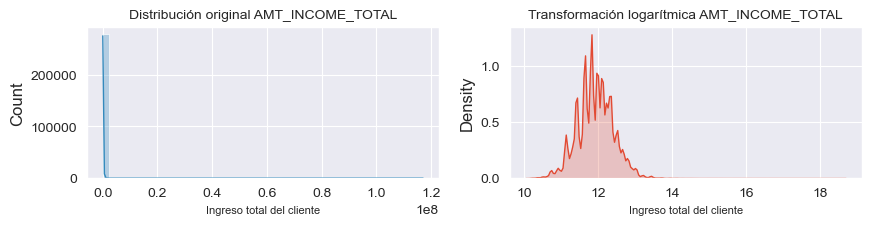

In [45]:
# Analisis con histograma variable AMT_INCOME_TOTAL - Ingreso total del cliente #
hlp.histograma(df_train_num, 'AMT_INCOME_TOTAL', 'Ingreso total del cliente')

- Al transformar la variable `AMT_INCOME_TOTAL`, ésta mejora y presenta una distribución más cercana a la distribución normal, por lo que la variable original será eliminada para ser reprocesada.

In [46]:
# Reprocesar AMT_INCOME_TOTAL - Ingreso total del cliente
#==================================================================================================
df_train['LOG_AMT_INCOME_TOTAL'] = np.log(df_train['AMT_INCOME_TOTAL'])

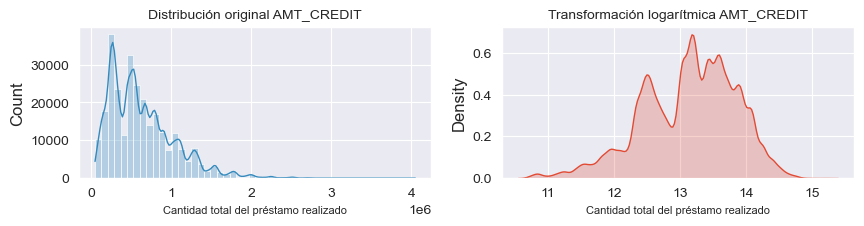

In [47]:
# Analisis con histograma variable AMT_CREDIT - Cantidad total del préstamo realizado #
hlp.histograma(df_train_num, 'AMT_CREDIT', 'Cantidad total del préstamo realizado')

- Al transformar la variable `AMT_CREDIT`, ésta mejora y presenta una distribución más cercana a la distribución normal, por lo que la variable original será eliminada para ser reprocesada.

In [48]:
# Reprocesar AMT_CREDIT - Cantidad total del préstamo realizado
#==================================================================================================
df_train['LOG_AMT_CREDIT'] = np.log(df_train['AMT_CREDIT'])

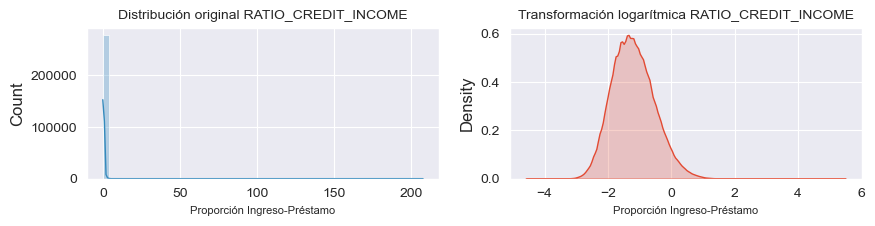

In [49]:
# Analisis con histograma de variable RATIO_CREDIT_INCOME
hlp.histograma(df_train_num, 'RATIO_CREDIT_INCOME', 'Proporción Ingreso-Préstamo')

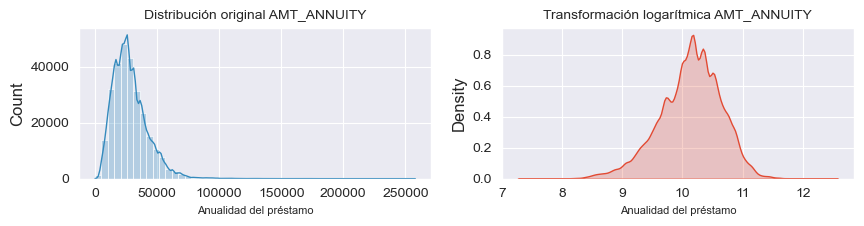

In [50]:
# Analisis con histograma de variable AMT_ANNUITY - Anualidad del préstamo #
hlp.histograma(df_train_num, 'AMT_ANNUITY', 'Anualidad del préstamo')

- Al transformar la variable `AMT_ANNUITY`, ésta mejora y presenta una distribución más cercana a la distribución normal, por lo que la variable original será eliminada para ser reprocesada.

In [51]:
# Reprocesar AMT_ANNUITY - Anualidad del préstamo
#==================================================================================================
df_train['LOG_AMT_ANNUITY'] = np.log(df_train['AMT_ANNUITY'])

### Gráficos de los atributos :

- `AMT_GOODS_PRICE` : Representa el precio de los bienes que se comprará con el préstamo.
- `REGION_POPULATION_RELATIVE` : Población donde vive el cliente (la variable está normalizada, donde valores más altos significan que el cliente vive en una región más poblada).
- `AGE` : Edad del cliente cuando solicitó el préstamo.

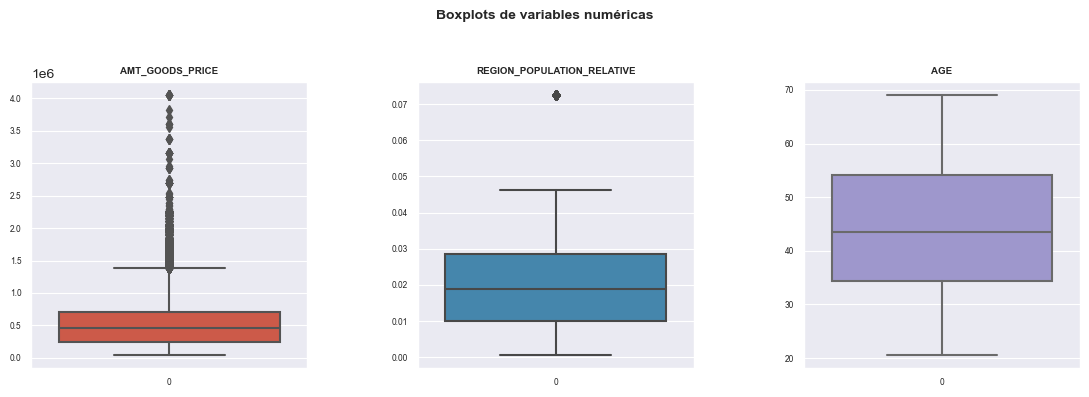

In [52]:
# Graficos boxplot de atributos
data_graf_num2 = df_train_num.loc[:, [ 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE']]
hlp.grafico_boxplot(data_graf_num2)

- El atributo `AMT_GOODS_PRICE`, se transformará utilizando logaritmo para visualizar si presenta una distribución más cercana a la distribución normal. 

- Los atributos `REGION_POPULATION_RELATIVE` y `AGE`, serán analizados y comparados con el vector objetivo.

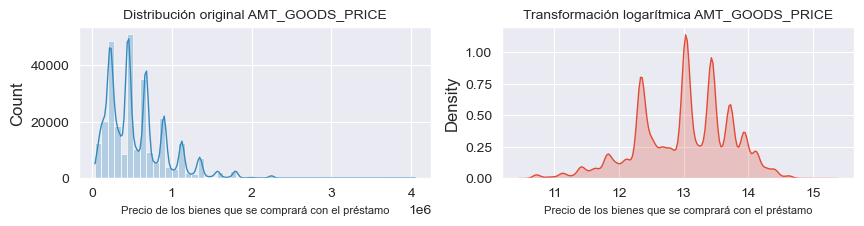

In [53]:
# Analisis con histograma de variable AMT_GOODS_PRICE - Precio de los bienes que se comprará con el préstamo #
hlp.histograma(df_train_num, 'AMT_GOODS_PRICE', 'Precio de los bienes que se comprará con el préstamo')

- Al transformar la variable `AMT_GOODS_PRICE`, esta mejora y presenta una distribución mas cercana a la distribución normal, por lo que la variable original será eliminada para ser reprocesada.

In [54]:
# Reprocesar AMT_GOODS_PRICE - Precio de los bienes que se comprara con el préstamo
#==================================================================================================
df_train['LOG_AMT_GOODS_PRICE'] = np.log(df_train['AMT_GOODS_PRICE'])

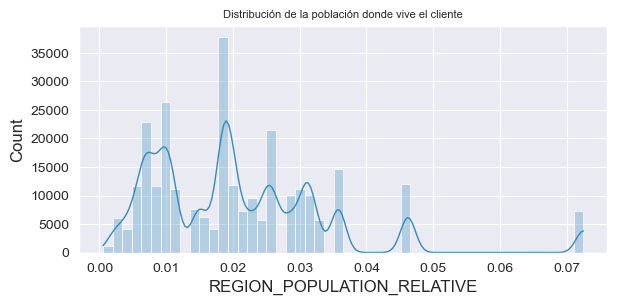

In [55]:
# Analisis con histograma de variable REGION_POPULATION_RELATIVE - Población donde vive el cliente #
plt.figure(figsize=(15, 3));
plt.subplot(1,2,1)
sns.histplot(df_train['REGION_POPULATION_RELATIVE'], kde=True, bins=50,  line_kws={'linewidth':1}, alpha = 0.3);
plt.title('Distribución de la población donde vive el cliente',  fontsize=8);

- Valores más altos indican que el cliente vive en una región más poblada

Media: 44


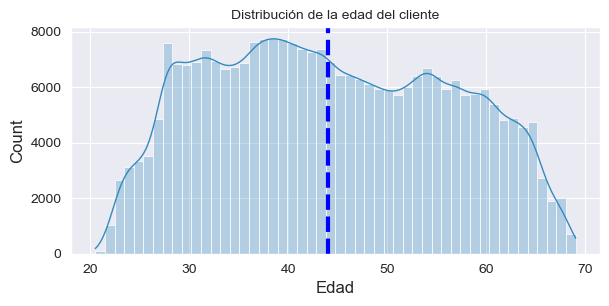

In [56]:
# Analisis con histograma de variable AGE - Edad del cliente #
plt.figure(figsize=(15, 3));
plt.subplot(1,2,1)
mu = round(np.mean(df_train['AGE']))
print(f'Media: {mu}')
plt.title('Distribución de la edad del cliente',  fontsize=10);
sns.histplot(df_train['AGE'], kde=True, bins=50,  line_kws={'linewidth':1}, alpha = 0.3);
plt.axvline(mu , color='b', linestyle='--' , lw='3', label = 'Media')
plt.xlabel('Edad');

- La distribución de la edad indica que los clientes que solicitan crédito en efectivo, ya sea buenos o malos pagadores fluctúa entre los 20 y 70 años, con un promedio de edad de 44 años.

### Gráfico de los atributos :

- `DAYS_EMPLOYED` : Cantidad de días trabajados previos a la postulación.
- `DAYS_REGISTRATION` : Cantidad de días previos a la última modificación de los registros del cliente previos a la postulación.
- `DAYS_ID_PUBLISH` : Cantidad de días previos a la modificación de su documento de identificación con el cual realizo la postulación al préstamo.

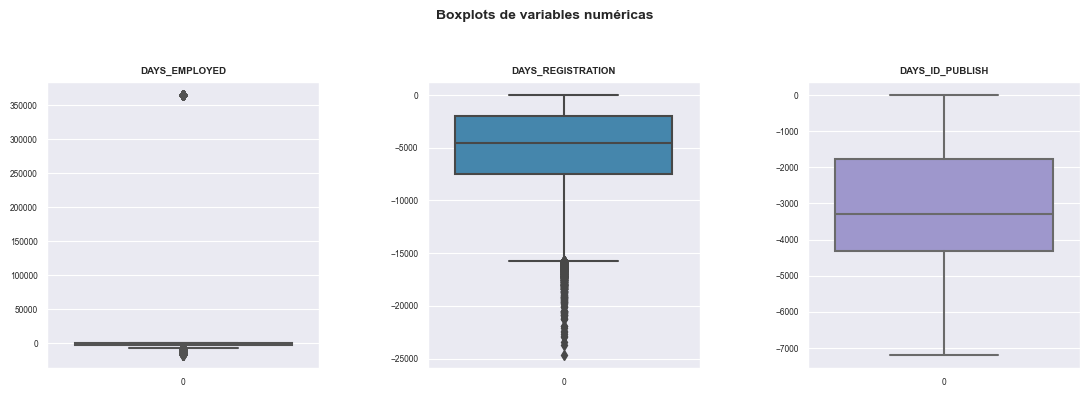

In [57]:
# Graficos boxplot de atributos
data_graf_num3 = df_train_num.loc[:, [ 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']]
hlp.grafico_boxplot(data_graf_num3)

- La distribución de las observaciones para la variable `DAYS_EMPLOYED`, `DAYS_REGISTRATION` y `DAYS_ID_PUBLISH` presentan valores negativos, por lo que serán transformados a valores positvos, y transformadas a logarítmicas o categóricas según sea el caso.

In [58]:
# Estadistica de variable DAYS_EMPLOYED, DAYS_REGISTRATION y DAYS_ID_PUBLISH
df_train_num.loc[:, ['DAYS_EMPLOYED', 'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].describe()

DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  278232.000000      278232.000000    278232.000000
mean    66310.442020       -5009.613488     -3020.079240
std    143346.548212        3535.561853      1501.233328
min    -17912.000000      -24672.000000     -7197.000000
25%     -2779.000000       -7509.000000     -4310.000000
50%     -1220.000000       -4522.000000     -3294.000000
75%      -271.000000       -2028.000000     -1768.000000
max    365243.000000           0.000000         0.000000

- La variable `DAYS_EMPLOYED`, cuenta con un valor máximo de 365243, lo que podria indicar un valor referencial asociado a cliente no presenta dias trabajados previos a la postulación, en los atributos `DAYS_REGISTRATION` y `DAYS_ID_PUBLISH` el valor máximo es 0.

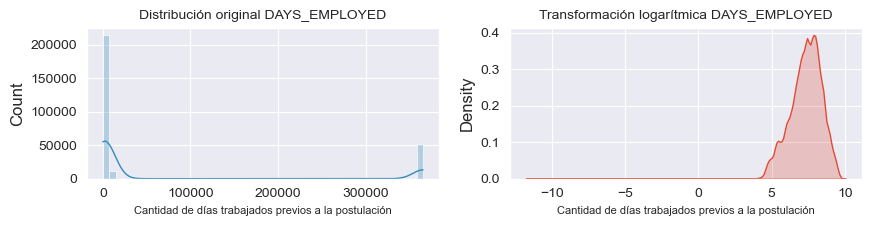

In [59]:
# Analisis con histograma de variable DAYS_EMPLOYED - Cantidad de días trabajados previos a la postulación #
hlp.histograma(df_train_num, 'DAYS_EMPLOYED', 'Cantidad de días trabajados previos a la postulación')

- En esta gráfica el atributo `DAYS_EMPLOYED`, apenas toma unos pocos valores y la gran mayoría de las observaciones pertenecen a solo dos de ellos, por lo que el atributo será transformado, en los que las observaciones serán condicionadas a valores menores a 0 en los que tomará el valor 1, para los casos en que el cliente presenta días trabajados y tomará el valor 0 en caso contrario.

In [60]:
# Transformar DAYS_EMPLOYED - Cantidad de días trabajados previos a la postulación
#==================================================================================================
df_train['WITH_DAYS_WORKED'] = np.where(df_train['DAYS_EMPLOYED'] < 0, 1 , 0)

df_train['WITH_DAYS_WORKED'] = df_train['WITH_DAYS_WORKED'].astype('int')

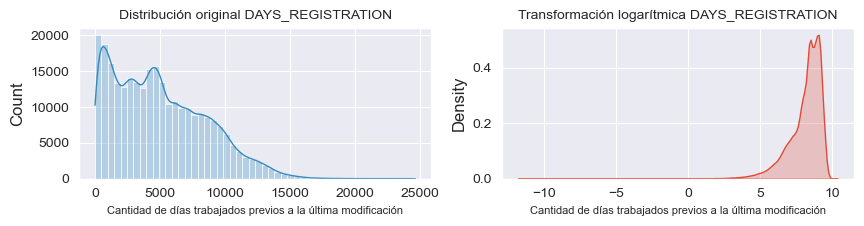

In [61]:
# Analisis con histograma variable DAYS_REGISTRATION - Cantidad de días previos a la última modificación de los registros del cliente previos a la postulación #
hlp.histograma(df_train_num, 'DAYS_REGISTRATION', 'Cantidad de días trabajados previos a la última modificación')

- Al transformar la variable `DAYS_REGISTRATION`, esta mejora y presenta una distribución mas cercana a la distribución normal, por lo que la variable original será eliminada para ser reprocesada.

In [62]:
# Transformar DAYS_REGISTRATION - Cantidad de días previos a la última modificación de sus registros
#==================================================================================================
df_train['LOG_DAYS_REGISTRATION'] = np.log(df_train['DAYS_REGISTRATION']*-1 + 0.00001)

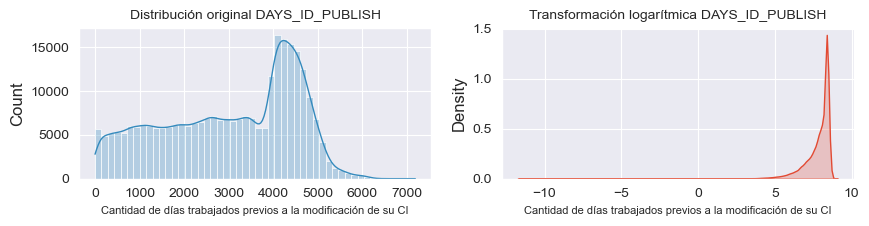

In [63]:
# Analisis con histograma variable DAYS_REGISTRATION - Cantidad de días previos a la modificación de su CI con el cual realizo la postulación al préstamo #
hlp.histograma(df_train_num, 'DAYS_ID_PUBLISH', 'Cantidad de días trabajados previos a la modificación de su CI')

- Al transformar la variable `DAYS_ID_PUBLISH`, ésta mejora y presenta una distribución más cercana a la distribución normal, por lo que la variable original será eliminada para ser reprocesada.

In [64]:
# Transformar DAYS_ID_PUBLISH - Cantidad de días previos a la modificación de su CI con el cual realizo la postulación
#==================================================================================================
df_train['LOG_DAYS_ID_PUBLISH'] = np.log(df_train['DAYS_ID_PUBLISH']*-1 + 0.00001)

### Gráfico de los atributos:

* `EXT_SOURCE_2` : Puntaje normalizado de fuente externa.
* `EXT_SOURCE_3` : Puntaje normalizado de fuente externa.
* `DAYS_LAST_PHONE_CHANGE` : Hace cuantos días antes de la postulación cambia número de teléfono.
* `FLAG_PHONE`: Da un teléfono contacto el cliente.

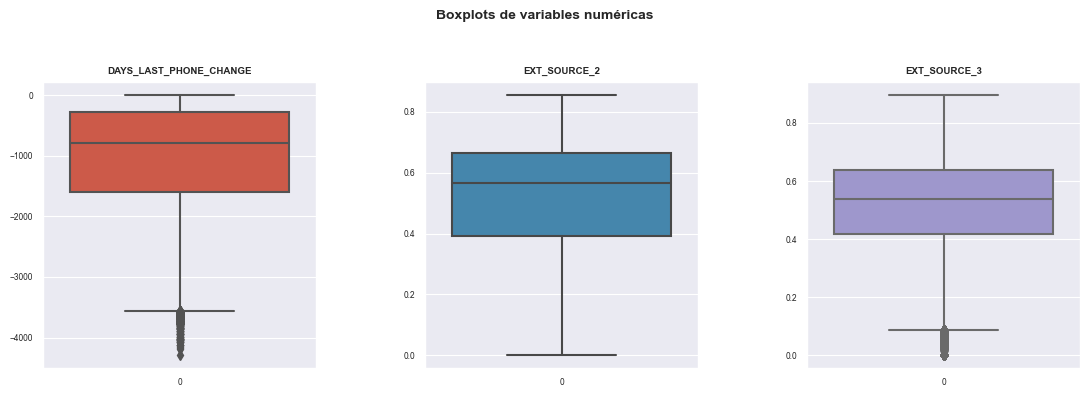

In [65]:
# Graficos boxplots de atributos
data_graf_num4 = df_train_num.loc[:, [ 'DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2', 'EXT_SOURCE_3', ]]
hlp.grafico_boxplot(data_graf_num4)

- La distribución de las observaciones para la variable `DAYS_LAST_PHONE_CHANGE` presenta valores negativos, por lo que será transformada a valores positivos, y reprocesada a logarítmica o se cambiara a tipo categórica según sea el caso analizado.

- Los atributos `EXT_SOURCE_2`, `EXT_SOURCE_2`, serán analizados y comparados con el vector objetivo.

In [66]:
# Estadistica DAYS_LAST_PHONE_CHANGE 
df_train_num.loc[:, ['DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_LAST_PHONE_CHANGE
count            278232.00000
mean               -979.43885
std                 833.81689
min               -4292.00000
25%               -1592.00000
50%                -785.00000
75%                -279.00000
max                   0.00000

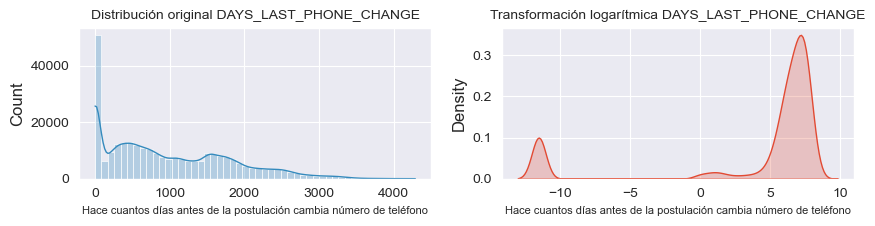

In [67]:
# Analisis con histograma de variable DAYS_LAST_PHONE_CHANGE - Hace cuantos días antes de la postulación cambia número de teléfono #
hlp.histograma(df_train_num, 'DAYS_LAST_PHONE_CHANGE', 'Hace cuantos días antes de la postulación cambia número de teléfono')

- En esta gráfica el atributo `DAYS_LAST_PHONE_CHANGE`, ciertos valores y la gran mayoría de las observaciones pertenecen a un solo valor, por lo que el atributo será condicionado a valores menores a 0 (toma el valor 1) en los casos en que el cliente cambia de teléfono y 0 en el caso que no cambia de teléfono.

In [68]:
# Transformar DAYS_LAST_PHONE_CHANGE - Hace cuantos días antes de la postulación cambia número de teléfono
#==================================================================================================
df_train['PHONE_CHANGE'] = np.where(df_train['DAYS_LAST_PHONE_CHANGE'] < 0, 1, 0)

df_train['PHONE_CHANGE'] = df_train['PHONE_CHANGE'].astype('int')

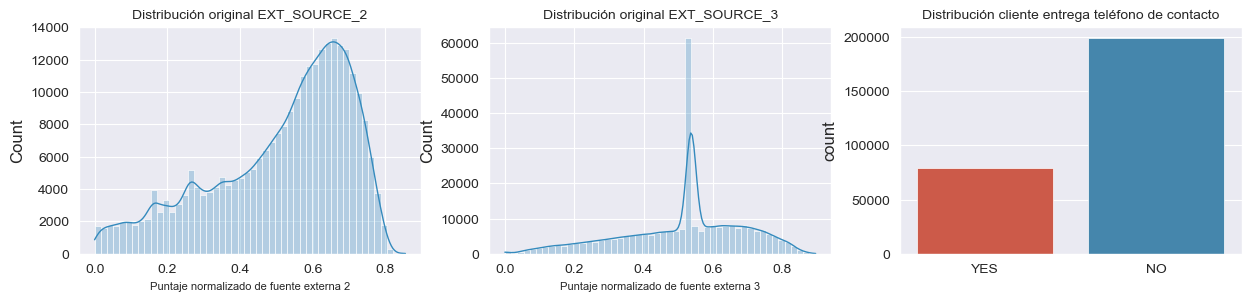

In [69]:
# Analisis de variables  EXT_SOURCE_2 , EXT_SOURCE_3, FLAG_PHONE
# Puntaje normalizado de fuentes externas y cliente entrega telefono de contacto#

plt.figure(figsize=(15, 3));

plt.subplot(1,3,1)
sns.histplot(df_train['EXT_SOURCE_2'], kde=True, bins=50, line_kws={'linewidth':1}, alpha=0.3);
plt.title('Distribución original EXT_SOURCE_2',  fontsize=10);
plt.xlabel('Puntaje normalizado de fuente externa 2', fontsize = 8);

plt.subplot(1,3,2)
sns.histplot(df_train['EXT_SOURCE_3'], kde=True, bins=50, line_kws={'linewidth':1}, alpha=0.3);
plt.title('Distribución original EXT_SOURCE_3',  fontsize=10);
plt.xlabel('Puntaje normalizado de fuente externa 3', fontsize = 8);

# Conversion de tipo de dato para realizacion de grafico
df_train_num['FLAG_PHONE_'] = df_train['FLAG_PHONE'].astype('object')
tmp_flag_phone = df_train_num['FLAG_PHONE_'] 
df_train_num['FLAG_PHONE_'] = np.where(tmp_flag_phone == 1, 'YES', 'NO')

plt.subplot(1,3,3)
sns.countplot(df_train_num['FLAG_PHONE_']); 
plt.title('Distribución cliente entrega teléfono de contacto',  fontsize=10);
plt.xlabel('');

- La distribución de las observaciones para ambas fuentes externas se acercan más a una distribución normal.

### Gráficos de los atributos :

* `FLAG_EMP_PHONE`: Da un teléfono de trabajo de contacto.
* `FLAG_WORK_PHONE`: Da un teléfono de hogar de contacto.
* `LIVE_CITY_NOT_WORK_CITY` : Identificador booleano si es que la dirección de contacto del cliente no concuerda con la dirección del trabajo.

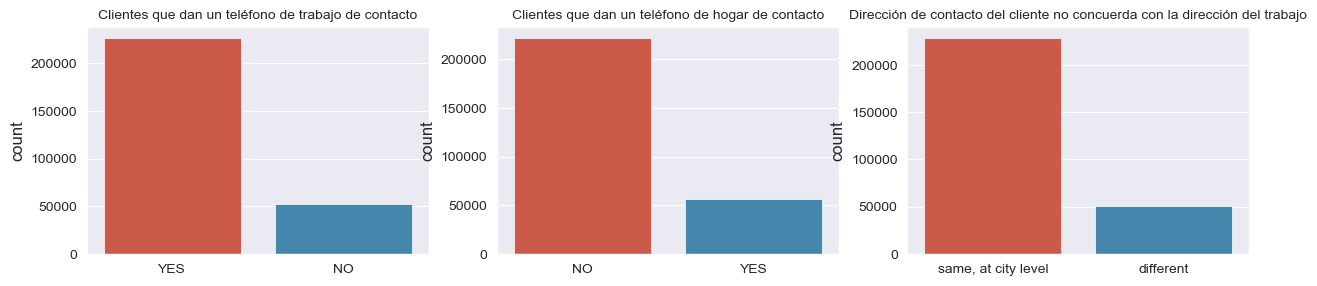

In [70]:
# Graficos countplot de atributos
plt.figure(figsize=(15, 3));

# Conversion de tipo de dato para realizacion de grafico
df_train_num['FLAG_EMP_PHONE_'] = df_train['FLAG_EMP_PHONE'].astype('object')
tmp_flag_emp_phone = df_train_num['FLAG_EMP_PHONE_'] 

df_train_num['FLAG_WORK_PHONE_'] = df_train['FLAG_WORK_PHONE'].astype('object')
tmp_flag_work_phone = df_train_num['FLAG_WORK_PHONE_'] 

df_train_num['LIVE_CITY_NOT_WORK_CITY_'] = df_train['LIVE_CITY_NOT_WORK_CITY'].astype('object')
tmp_live_city_not_work_city = df_train_num['LIVE_CITY_NOT_WORK_CITY_'] 

plt.subplot(1,3,1)
df_train_num['FLAG_EMP_PHONE_'] = np.where(tmp_flag_emp_phone == 1, 'YES', 'NO')
hlp.countplot2(df_train_num, 'FLAG_EMP_PHONE_', etiqueta='Clientes que dan un teléfono de trabajo de contacto')
plt.xlabel('');

plt.subplot(1,3,2)
df_train_num['FLAG_WORK_PHONE_'] = np.where(tmp_flag_work_phone == 1, 'YES', 'NO')
hlp.countplot2(df_train_num, 'FLAG_WORK_PHONE_', etiqueta='Clientes que dan un teléfono de hogar de contacto')
plt.xlabel('');

plt.subplot(1,3,3)
df_train_num['LIVE_CITY_NOT_WORK_CITY_'] = np.where(tmp_live_city_not_work_city == 1, 'different', 'same, at city level')
hlp.countplot2(df_train_num, 'LIVE_CITY_NOT_WORK_CITY_', etiqueta='Dirección de contacto del cliente no concuerda con la dirección del trabajo')
plt.xlabel('');

- La mayoría de los clientes dan un télefono de trabajo como contacto, pero no dan contacto de casa.
- La dirección de contacto del cliente en su mayoría concuerda con la dirección del trabajo y en un menor cantidad de casos es diferente.

### Gráficos de los atributos :

* `REGION_RATING_CLIENT` : Evaluación interna (de Home Credit Group) sobre la región donde vive el cliente.
* `REG_CITY_NOT_LIVE_CITY` : Identificador booleano si es que la dirección permanente no concuerda con la dirección de contacto.
* `REG_CITY_NOT_WORK_CITY` : Identificador booleano si es que la dirección permanente no concuerda con la dirección del trabajo.

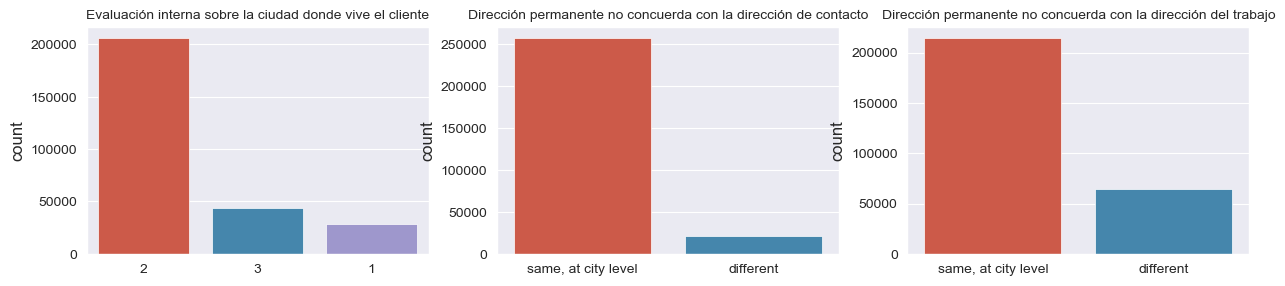

In [71]:
# Graficos countplot de atributos
plt.figure(figsize=(15, 3));

# Conversion de tipo de dato para realizacion de grafico
df_train_num['REGION_RATING_CLIENT_'] = df_train['REGION_RATING_CLIENT'].astype('object')
tmp_region_rating_client = df_train_num['REGION_RATING_CLIENT_'] 

df_train_num['REG_CITY_NOT_LIVE_CITY_'] = df_train['REG_CITY_NOT_LIVE_CITY'].astype('object')
tmp_reg_city_not_live_city = df_train_num['REG_CITY_NOT_LIVE_CITY_'] 

df_train_num['REG_CITY_NOT_WORK_CITY_'] = df_train['REG_CITY_NOT_WORK_CITY'].astype('object')
tmp_reg_city_not_work_city = df_train_num['REG_CITY_NOT_WORK_CITY_'] 

plt.subplot(1,3,1)
hlp.countplot2(df_train_num, 'REGION_RATING_CLIENT', etiqueta='Evaluación interna sobre la ciudad donde vive el cliente')
plt.xlabel('');

plt.subplot(1,3,2)
df_train_num['REG_CITY_NOT_LIVE_CITY_'] = np.where(tmp_reg_city_not_live_city == 1,'different', 'same, at city level')
hlp.countplot2(df_train_num, 'REG_CITY_NOT_LIVE_CITY_', etiqueta='Dirección permanente no concuerda con la dirección de contacto')
plt.xlabel('');

plt.subplot(1,3,3)
df_train_num['REG_CITY_NOT_WORK_CITY_'] = np.where(tmp_reg_city_not_work_city == 1, 'different', 'same, at city level')
hlp.countplot2(df_train_num, 'REG_CITY_NOT_WORK_CITY_', etiqueta='Dirección permanente no concuerda con la dirección del trabajo')
plt.xlabel('');

- Los clientes indican que la dirección permanente es la misma que la dirección de contacto y la misma para dirección de trabajo. 

- Se entrega un puntaje 2 a la mayoría de los clientes, lo que podría indicar que la mayoría radica en esa ciudad.

### Gráficos de los atributos :

* `OBS_30_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 30 días su entorno.
* `DEF_30_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 30 días su entorno.
* `OBS_60_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 60 días su entorno.

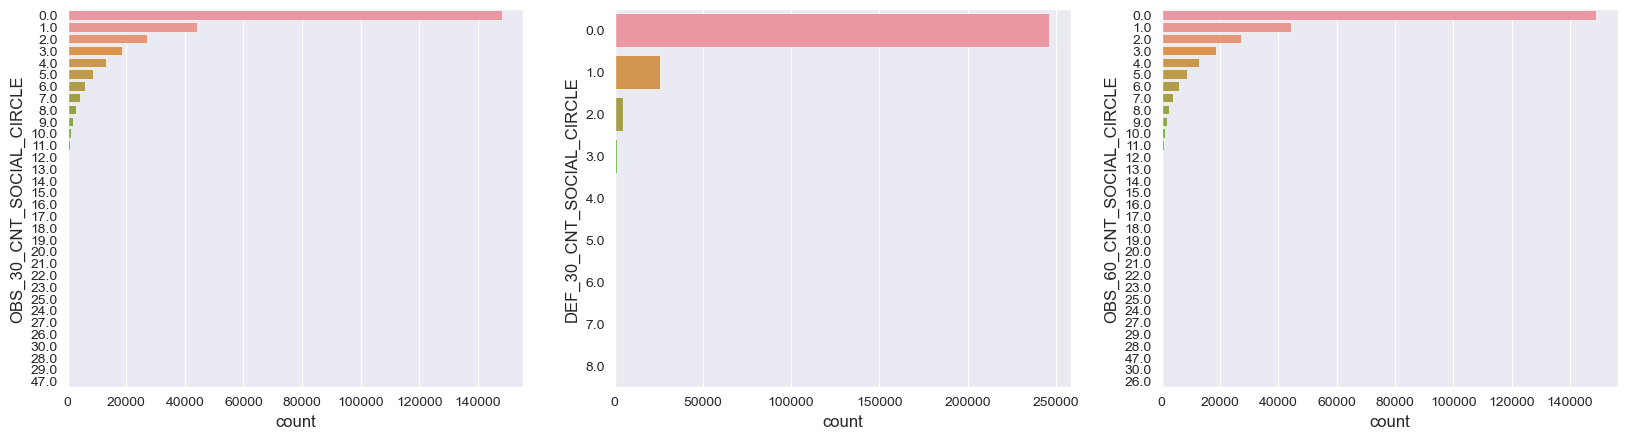

In [72]:
# Grafico de los atributos
plt.figure(figsize=(20, 5));
plt.subplot(1,3,1)
hlp.countplot(df_train_num, 'OBS_30_CNT_SOCIAL_CIRCLE' )

plt.subplot(1,3,2)
hlp.countplot(df_train_num, 'DEF_30_CNT_SOCIAL_CIRCLE' )

plt.subplot(1,3,3)
hlp.countplot(df_train_num, 'OBS_60_CNT_SOCIAL_CIRCLE' )

 - Se eliminarán las variables `OBS_30_CNT_SOCIAL_CIRCLE` y `OBS_60_CNT_SOCIAL_CIRCLE`, por ser variables que describen lo mismo que las variables `DEF_30_CNT_SOCIAL_CIRCLE` y `DEF_60_CNT_SOCIAL_CIRCLE` respecto de cuantas veces ha registrado mora su entorno.<br><br>
 
 - `DEF_30_CNT_SOCIAL_CIRCLE` será analizada y comparada con el vector objetivo.

### Gráficos de los atributos :

* `DEF_60_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 60 días su entorno.
* `AMT_REQ_CREDIT_BUREAU_HOUR`:Cantidad de consultas sobre el cliente al buró de crédito. Una hora antes de la postulación.
* `AMT_REQ_CREDIT_BUREAU_DAY`: Cantidad de consultas sobre el cliente al buró de crédito. Un día antes de la postulación.

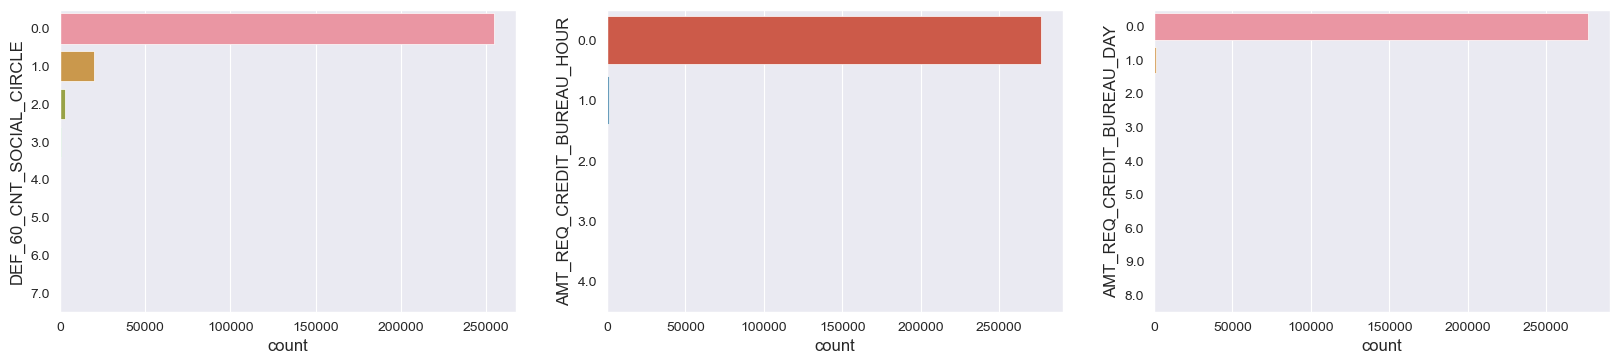

In [73]:
# Grafico de los atributos
plt.figure(figsize=(20, 4));
plt.subplot(1,3,1)
hlp.countplot(df_train_num, 'DEF_60_CNT_SOCIAL_CIRCLE' )

plt.subplot(1,3,2)
hlp.countplot(df_train_num, 'AMT_REQ_CREDIT_BUREAU_HOUR' )

plt.subplot(1,3,3)
hlp.countplot(df_train_num, 'AMT_REQ_CREDIT_BUREAU_DAY' )

- `AMT_REQ_CREDIT_BUREAU_HOUR` y `AMT_REQ_CREDIT_BUREAU_DAY`, estas variables serán eliminadas ya que la mayoria de las observaciones estan sesgadas a un solo valor que indica cero consultas sobre el cliente al buró de crédito una hora o un día antes de la postulación. <br><br>

- `DEF_60_CNT_SOCIAL_CIRCLE`, será analizada y comparada con el vector objetivo.

### Gráficos de los atributos :

* `AMT_REQ_CREDIT_BUREAU_WEEK`: Cantidad de consultas sobre el cliente al buró de crédito. Una semana antes de la postulación.
* `AMT_REQ_CREDIT_BUREAU_MON`: Cantidad de consultas sobre el cliente al buró de crédito. Un mes antes de la postulación.
* `AMT_REQ_CREDIT_BUREAU_QRT`: Cantidad de consultas sobre el cliente al buró de crédito. Tres meses antes de la postulación.

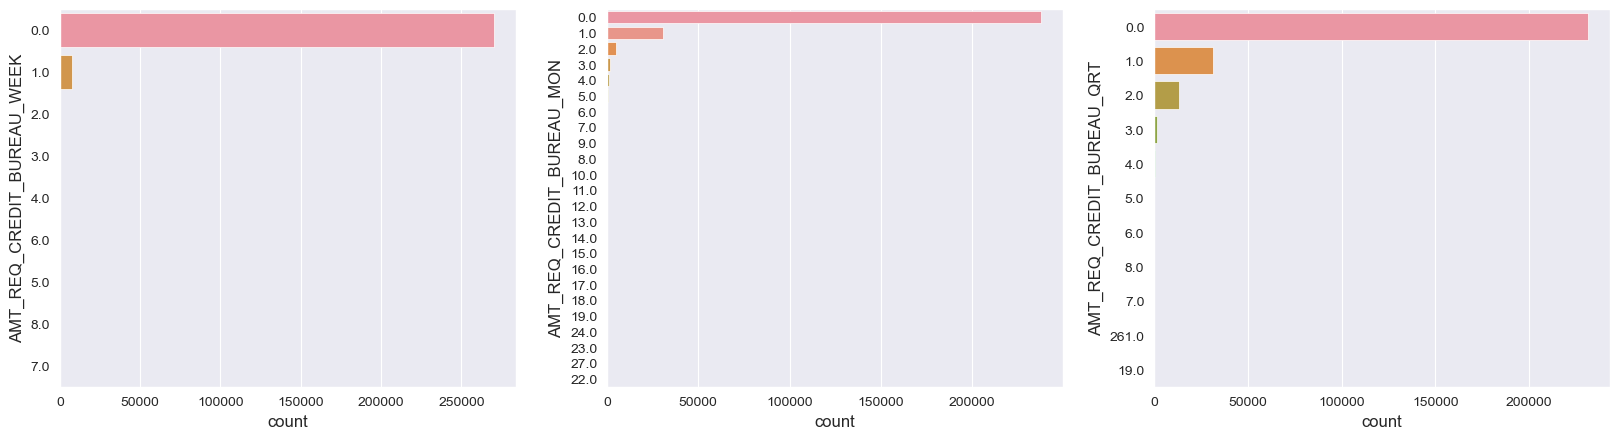

In [74]:
# Grafico de los atributos
plt.figure(figsize=(20, 5));
plt.subplot(1,3,1)
hlp.countplot(df_train_num, 'AMT_REQ_CREDIT_BUREAU_WEEK')

plt.subplot(1,3,2)
hlp.countplot(df_train_num, 'AMT_REQ_CREDIT_BUREAU_MON' )

plt.subplot(1,3,3)
hlp.countplot(df_train_num, 'AMT_REQ_CREDIT_BUREAU_QRT' )

- `AMT_REQ_CREDIT_BUREAU_WEEK` y  `AMT_REQ_CREDIT_BUREAU_QRT`, estas variables serán eliminadas ya que la mayoría de las observaciones estan sesgadas a un solo valor que indica cero consultas sobre el cliente al buró de crédito una semana o tres meses antes de la postulación.
- `AMT_REQ_CREDIT_BUREAU_MON`, será analizada y comparada con el vector objetivo.

### Gráficos de los atributos :

* `AMT_REQ_CREDIT_BUREAU_YEAR`: Cantidad de consultas sobre el cliente al buró de crédito. Un año antes de la postulación.
* `CNT_CHILDREN`: Cantidad de hijos por parte del cliente.
* `CNT_FAM_MEMBERS`: Cuántos miembros familiares tiene el cliente.

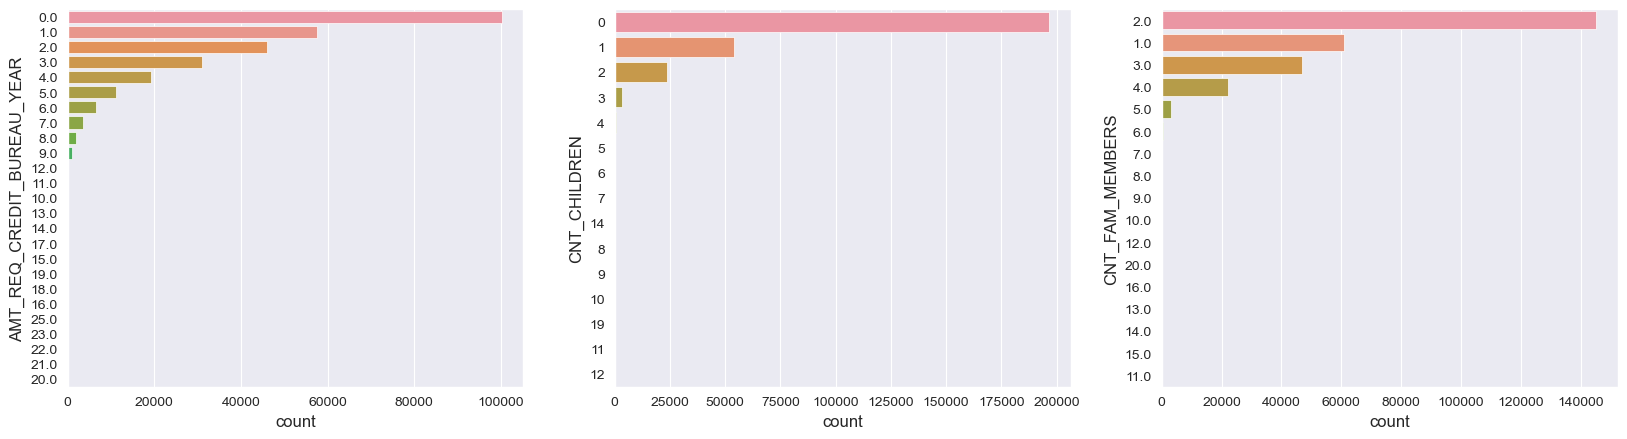

In [75]:
# Grafico de los atributos
plt.figure(figsize=(20, 5));
plt.subplot(1,3,1)
hlp.countplot(df_train_num, 'AMT_REQ_CREDIT_BUREAU_YEAR')

plt.subplot(1,3,2)
hlp.countplot(df_train_num, 'CNT_CHILDREN')

plt.subplot(1,3,3)
hlp.countplot(df_train_num, 'CNT_FAM_MEMBERS' )

- La mayoría de los clientes que solicitan el préstamo no tienen hijos y su grupo familiar lo componen una o dos personas en su mayoría.

- `AMT_REQ_CREDIT_BUREAU_YEAR`, `CNT_CHILDREN`, `CNT_FAM_MEMBERS`, estos atributos serán analizados y comparados con el vector objetivo.

#### Resumen atributos continuos:

- Los atributos `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `DAYS_REGISTRATION`, `DAYS_ID_PUBLISH` fueron reprocesadas ya que al ser procesadas como logaritmo presentan una distribución mas cercana a la distribución normal. Se elimina la variable original.<br><br>

- Los atributos `DAYS_EMPLOYED` y `DAYS_LAST_PHONE_CHANGE`, fueron transformadas a categóricas. Se elimina la variable original.<br><br>

- Los atributos generados de las transformaciones: `RATIO_CREDIT_INCOME`, `FLAG_EMP_PHONE`, `LOG_AMT_INCOME_TOTAL`, `LOG_AMT_CREDIT`, `LOG_AMT_GOODS_PRICE`, `LOG_AMT_ANNUATY`, `REGION_POPULATION_RELATIVE`, `LOG_DAYS_REGISTRATION`, `LOG_DAYS_ID_PUBLISH`,  `AGE`,  `EXT_SOURCE_2`, `EXT_SOURCE_2`, `FLAG_EMP_PHONE`, `FLAG_WORK_PHONE`, `LIVE_CITY_NOT_WORK_CITY`, `REGION_RATING_CLIENT`, `REG_CITY_NOT_LIVE_CITY`, `REG_CITY_NOT_WORK_CITY`, `DEF_30_CNT_SOCIAL_CIRCLE`, `DEF_60_CNT_SOCIAL_CIRCLE`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_YEAR`, `CNT_CHILDREN`, `CNT_FAM_MEMBERS`, serán analizadas con el vector objetivo o eliminadas si presentan colinealidad.<br><br>

- Los atributos `OBS_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE` , `AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY`,  `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_QRT` serán eliminados ya que estan muy sesgados a una solo valor.<br><br>

- Los atributos originales: `DAYS_BIRTH`, `AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `DAYS_EMPLOYED`,  `DAYS_REGISTRATION`, `DAYS_ID_PUBLISH`, `DAYS_LAST_PHONE_CHANGE`, serán eliminadas por transformación de su atributo original.<br><br>

In [76]:
# Seleccion de columnas continuas a Eliminar
#==================================================================================================
columns_num_drop = ['SK_ID_CURR', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 
                    'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                    'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                    'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 
                    'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
                    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT' ]

### 2.11.4 Eliminación de atributos continuos de análisis univariado

In [77]:
# Eliminacion de Atributos Transformados: 
#==================================================================================================
df_train = df_train.drop(columns = columns_num_drop)

In [78]:
# Dimensión de la data posterior a la eliminación de atributos continuos
df_train.shape

(278232, 66)

In [79]:
print(f'Lista de {len(columns_num_drop)} atributos que fueron eliminados: \n\n{columns_num_drop}')

Lista de 16 atributos que fueron eliminados: 

['SK_ID_CURR', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT']


### 2.11.5 Correlación entre variables numéricas

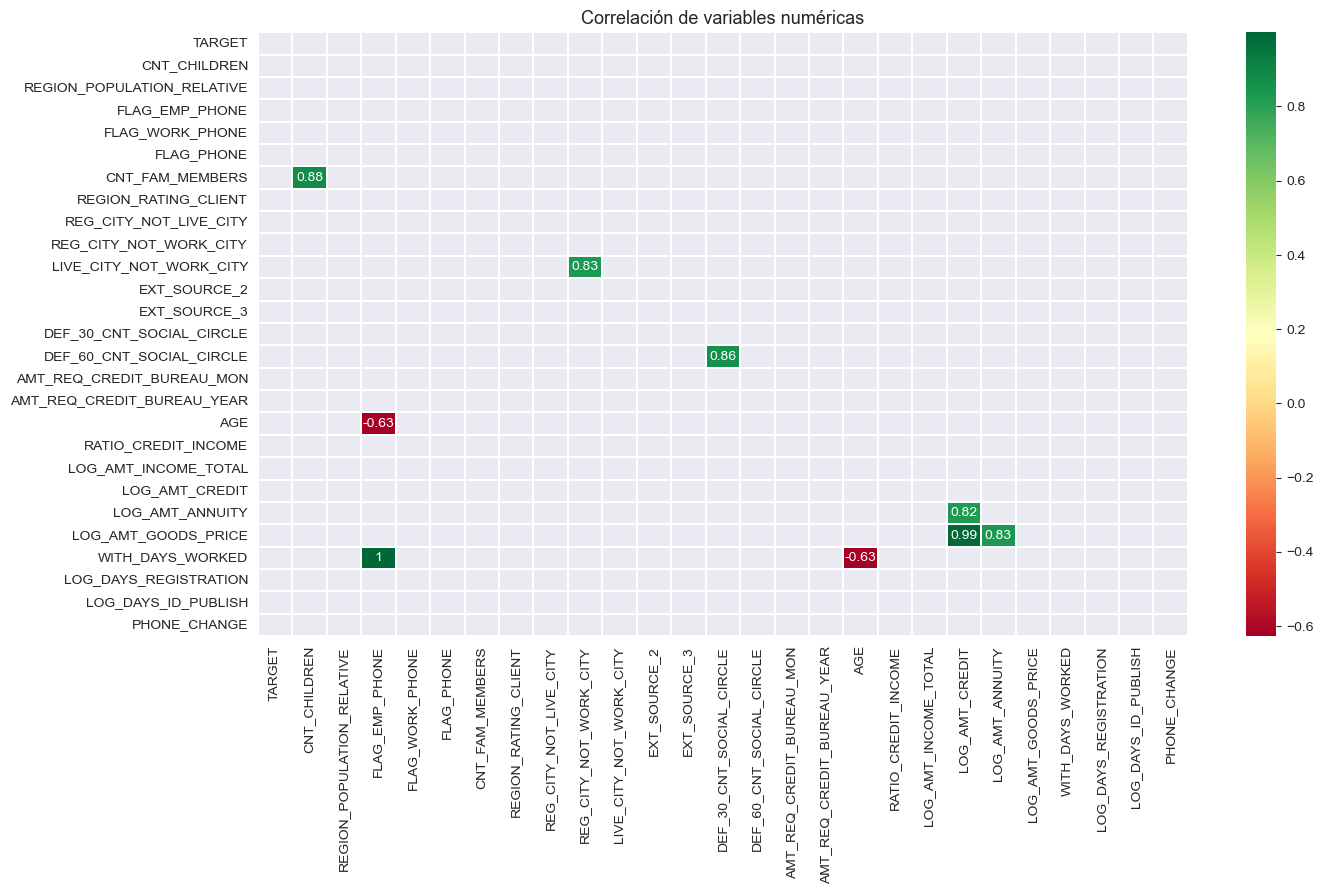

In [80]:
correlacion = df_train.corr().mask(abs(df_train.corr()) <.6, df_train) #.drop('TARGET',axis=1)
mask = np.zeros_like(correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 8))
plt.title('Correlación de variables numéricas', fontsize=13)
sns.heatmap(correlacion, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':10})
plt.show()

Del análisis de la correlación de las variables continuas se puede observar que:

- `LOG_AMT_ANNUITY` y `LOG_AMT_CREDIT`, estan muy correlacionadas, por lo que se mantendrá sólo una de las dos.

- `WITH_DAYS_WORKED` y `FLAG_EMP_PHONE`, estan muy correlacionadas, por lo que se mantendrá sólo una de las dos.

- `LOG_AMT_GOODS_PRICE` y `LOG_AMT_CREDIT`, otro caso de multicolinealidad.

- `LOG_AMT_GOODS_PRICE` y `LOG_AMT_ANNUITY`, otro caso de multicolinealidad.

### 2.11.6 Correlación entre variables numéricas y Variable Objetivo `TARGET`

In [81]:
# Seleccion de columnas continuas
df_train_num = df_train.select_dtypes(include=['float64', 'int']).drop('TARGET', axis=1)
columns_numeric = list(df_train_num)

In [82]:
# Separacion de clases
target = df_train['TARGET'] 
df_clase_1 = df_train_num[target == 1]
df_clase_0 = df_train_num[target == 0]

In [83]:
# Correlacion de Cohen
d_de_Cohen = []
for col in columns_numeric:
    a = df_clase_1[col].mean()
    b = df_clase_0[col].mean()
    std = df_train_num[col].std()
    d = round((b - a)/std, 3)
    d_de_Cohen.append((col, d))
d_de_Cohen

[('CNT_CHILDREN', -0.077),
 ('REGION_POPULATION_RELATIVE', 0.128),
 ('FLAG_EMP_PHONE', -0.18),
 ('FLAG_WORK_PHONE', -0.096),
 ('FLAG_PHONE', 0.095),
 ('CNT_FAM_MEMBERS', -0.039),
 ('REGION_RATING_CLIENT', -0.214),
 ('REG_CITY_NOT_LIVE_CITY', -0.165),
 ('REG_CITY_NOT_WORK_CITY', -0.19),
 ('LIVE_CITY_NOT_WORK_CITY', -0.121),
 ('EXT_SOURCE_2', 0.584),
 ('EXT_SOURCE_3', 0.573),
 ('DEF_30_CNT_SOCIAL_CIRCLE', -0.114),
 ('DEF_60_CNT_SOCIAL_CIRCLE', -0.111),
 ('AMT_REQ_CREDIT_BUREAU_MON', 0.055),
 ('AMT_REQ_CREDIT_BUREAU_YEAR', -0.015),
 ('AGE', 0.298),
 ('RATIO_CREDIT_INCOME', -0.006),
 ('LOG_AMT_INCOME_TOTAL', 0.057),
 ('LOG_AMT_CREDIT', 0.061),
 ('LOG_AMT_ANNUITY', nan),
 ('LOG_AMT_GOODS_PRICE', 0.094),
 ('WITH_DAYS_WORKED', -0.18),
 ('LOG_DAYS_REGISTRATION', 0.129),
 ('LOG_DAYS_ID_PUBLISH', 0.152),
 ('PHONE_CHANGE', 0.072)]

- Del análisis de la correlación de la d de Cohen las variables `LOG_AMT_ANNUITY`, `LOG_AMT_GOODS_PRICE`,`RATIO_CREDIT_INCOME` , `REGION_POPULATION_RELATIVE` y `FLAG_EMP_PHONE`, serán eliminadas dado que la correlación es muy baja respecto del target.

### 2.11.7 Eliminación de atributos correlacionados

In [84]:
# Eliminacion de Atributos correlacionados: 
# REGION_POPULATION_RELATIVE, RATIO_CREDIT_INCOME, LOG_AMT_ANNUITY, LOG_AMT_GOODS_PRICE, FLAG_EMP_PHONE
#==================================================================================================
columns_num_drop_corr = ['REGION_POPULATION_RELATIVE', 'RATIO_CREDIT_INCOME',
                         'LOG_AMT_ANNUITY', 'LOG_AMT_GOODS_PRICE', 'FLAG_EMP_PHONE']

df_train = df_train.drop(columns = columns_num_drop_corr)

In [85]:
# Dimensión de la data posterior a la eliminación de atributos continuos correlacionados
df_train.shape

(278232, 61)

### 2.11.8 Descripción de datos categóricos

### Atributos :

* `CODE_GENDER` : Sexo del cliente
* `FLAG_OWN_CAR`: Indicador binario sobre la tenencia de automóvil por parte del cliente.
* `FLAG_OWN_REALTY`: Indicador binario sobre la propiedad de una casa o departamento por parte del cliente.
* `NAME_TYPE_SUITE`: Quien acompaña al cliente cuando fue a solicitar el préstamo.
* `NAME_INCOME_TYPE`: Tipo de ingreso por parte del cliente.
* `NAME_EDUCATION_TYPE`: Máximo nivel educacional por parte del cliente.
* `NAME_FAMILY_STATUS`: Situación familiar del cliente.
* `NAME_HOUSING_TYPE`: Cuál es la situación habitacional del cliente.
* `FLAG_MOBIL`: Da un teléfono celular de contacto
* `FLAG_CONT_MOBILE`: Se pudo contactar al cliente mediante el celular.
* `FLAG_EMAIL`: Da un email de contacto el cliente.
* `OCCUPATION_TYPE`: Cuál es la profesión del cliente.
* `REGION_RATING_CLIENT_W_CITY` : Evaluación interna (de Home Crédito Group) sobre la región donde vive el cliente          considerando ciudad.
* `WEEKDAY_APPR_PROCESS_START`: Día hábil en el cual el cliente pide el préstamo.
* `HOUR_APPR_PROCESS_START`: Hora aproximada de la solicitud de préstamo por parte del cliente.
* `REG_REGION_NOT_LIVE_REGION` : Identificador booleano si es que la dirección permanente del cliente no concuerda con la dirección de contacto.
* `REG_REGION_NOT_WORK_REGION` : Identificador booleano si es que la dirección permanente del cliente no concuerda con la dirección de trabajo.
* `LIVE_REGION_NOT_WORK_REGION` : Identificador booleano si es que la dirección de contacto del cliente no concuerda con la dirección del trabajo
* `ORGANIZATION_TYPE`: Tipo de organización donde trabaja el cliente.
* `FLAG_DOCUMENT_2`, `FLAG_DOCUMENT_3`, `FLAG_DOCUMENT_4`, `FLAG_DOCUMENT_5`, `FLAG_DOCUMENT_6`, `FLAG_DOCUMENT_7`, `FLAG_DOCUMENT_8`, `FLAG_DOCUMENT_9`, `FLAG_DOCUMENT_10`, `FLAG_DOCUMENT_11`, `FLAG_DOCUMENT_12`, `FLAG_DOCUMENT_13`, `FLAG_DOCUMENT_14`, `FLAG_DOCUMENT_15`, `FLAG_DOCUMENT_16`, `FLAG_DOCUMENT_17`, `FLAG_DOCUMENT_18`, `FLAG_DOCUMENT_19`, `FLAG_DOCUMENT_20` y `FLAG_DOCUMENT_21`: Indicador documento del 2 al 21.

In [86]:
# Conversion de tipo de dato del vector objetivo para realizacion de graficos
df_train['TARGET_'] = df_train['TARGET'].astype('object')
target_tmp = df_train['TARGET'] 
df_train['TARGET_'] = np.where(target_tmp == 1, 'Mal pagador', 'Buen pagador')

In [87]:
# Descripcion estadistica de datos categoricos
pd.options.display.max_columns = None
df_train_obj = df_train.select_dtypes(include=['object']).describe()
df_train_obj

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
count       278232       278232          278232          278232   
unique           2            2               2               8   
top              F            N               Y   Unaccompanied   
freq        182800       183775          190207          224541   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            278232                         278232             278232   
unique                7                              5                  5   
top             Working  Secondary / secondary special            Married   
freq             142719                         200125             178711   

        NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_CONT_MOBILE  FLAG_EMAIL  \
count              278232      278232            278232      278232   
unique                  6           2                 2           2   
top     House / apartment           1                 1           0   
freq               247389      278231            278091      262225   

       OCCUPATION_TYPE  REGION_RATING_CLIENT_W_CITY  \
count           278232                       278232   
unique              19                            3   
top            Unknown                            2   
freq             88800                       208033   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
count                      278232                   278232   
unique                          7                       24   
top                       TUESDAY                       10   
freq                        49110                    34526   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                       278232                      278232   
unique                           2                           2   
top                              0                           0   
freq                        274223                      264419   

        LIVE_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  FLAG_DOCUMENT_2  \
count                        278232                  278232           278232   
unique                            2                      58                2   
top                               0  Business Entity Type 3                0   
freq                         267061                   60755           278219   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
count            278232           278232           278232           278232   
unique                2                2                2                2   
top                   1                0                0                0   
freq             217198           278213           274350           251205   

        FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
count            278232           278232           278232            278232   
unique                1                2                2                 1   
top                   0                0                0                 0   
freq             278232           253494           277111            278232   

        FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
count             278232            278232            278232   
unique                 2                 2                 2   
top                    0                 0                 0   
freq              277290            278230            277225   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
count             278232            278232            278232   
unique                 2                 2                 2   
top                    0                 0                 0   
freq              277415            277871            275260   

        FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count             278232            278232            278232   
unique                 2                 2           

- Existe una gran variedad de flag que indican si dicho documento se entrego o no, pero no se tiene claridad de que documentos fueron solictados.

In [88]:
# Cantidad de atributos categoricos
df_train_object = df_train.select_dtypes(include=['object'])
len(df_train_object.columns)

40

In [89]:
df_train_object.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'TARGET_'],
      dtype='object')

Estas número de variables categóricas serán analizadas en este apartado, para ser eliminadas, reprocesadas o pasarán a formar parte de una categoria.

### 2.11.9 Gráficos atributos categóricos

### Gráficos de atributos :

* `CODE_GENDER` : Sexo del cliente
* `FLAG_OWN_CAR`: Indicador binario sobre la tenencia de automóvil por parte del cliente.
* `FLAG_OWN_REALTY`: Indicador binario sobre la propiedad de una casa o departamento por parte del cliente.
* `FLAG_MOBIL`: Da un teléfono celular de contacto
* `FLAG_CONT_MOBILE`: Se pudo contactar al cliente mediante el celular.
* `FLAG_EMAIL`: Da un email de contacto el cliente.

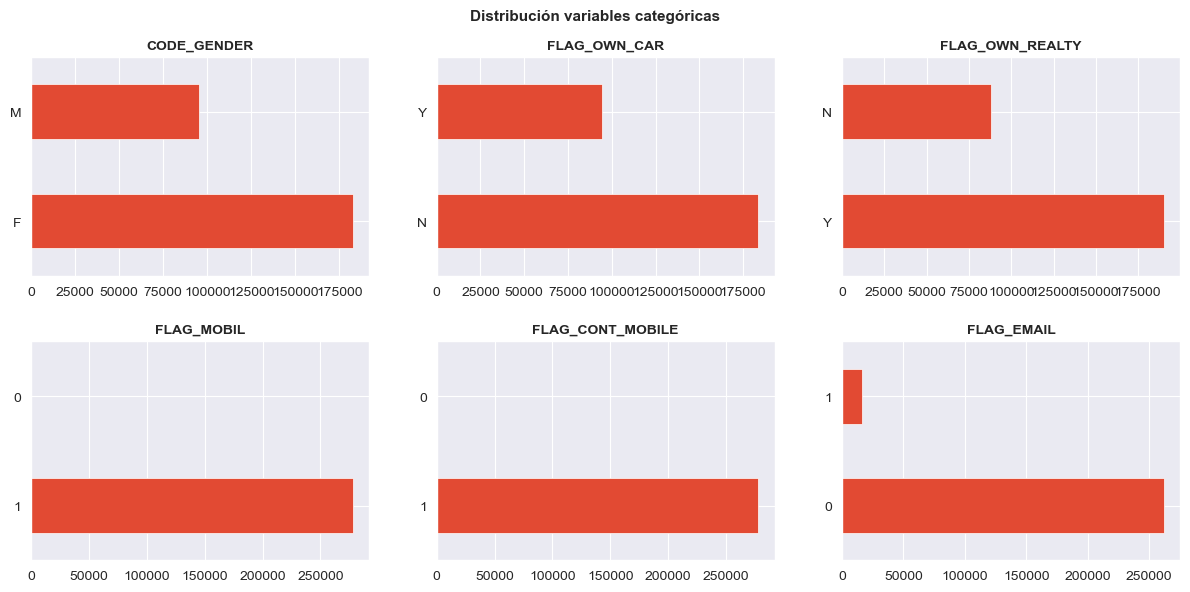

In [90]:
# Columnas agrupadas para graficar
data_graf_obj1 = df_train_object.loc[:, [ 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                          'FLAG_MOBIL', 'FLAG_CONT_MOBILE',  'FLAG_EMAIL']]
hlp.graficos_barra(data_graf_obj1)

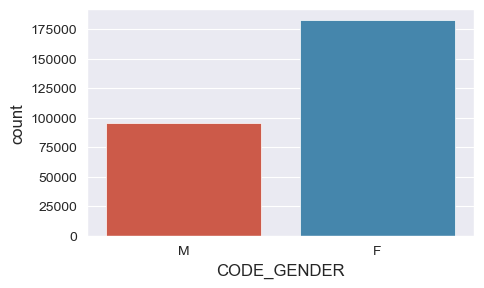

In [91]:
plt.figure(figsize=(5, 3));
sns.countplot(x='CODE_GENDER', data=df_train_object);

- Los atributos `FlAG_MOBIL` , `FLAG_CONT_MOBILE` , `FLAG_EMAIL`serán eliminados ya que estos atributos están muy sesgadas a una sola categoría. La mayoría de los clientes entregan un número de celular de contacto y se les pudo contactar por dicho medio. <br><br>

- Se observa que en su mayoría los clientes que solicitaron el préstamo son mujeres, muchos de los clientes no tienen auto y también otros son propietarios de una casa o departamento.<br><br>

- Estos atributos `CODE_GENDER`, `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`, serán analizados y comparados con el vector objetivo.

### Gráfico de atributos :

* `WEEKDAY_APPR_PROCESS_START`: Día hábil en el cual el cliente pide el préstamo.
* `HOUR_APPR_PROCESS_START`: Hora aproximada de la solicitud de préstamo por parte del cliente.
* `REGION_RATING_CLIENT_W_CITY` : Evaluación interna (de Home Crédito Group) sobre la región donde vive el cliente          considerando ciudad.
* `REG_REGION_NOT_LIVE_REGION` : Identificador booleano si es que la dirección permanente del cliente no concuerda con la dirección de contacto
* `REG_REGION_NOT_WORK_REGION` : Identificador booleano si es que la dirección permanente del cliente no concuerda con la dirección de trabajo
* `LIVE_REGION_NOT_WORK_REGION` : Identificador booleano si es que la dirección de contacto del cliente no concuerda con la dirección del trabajo.

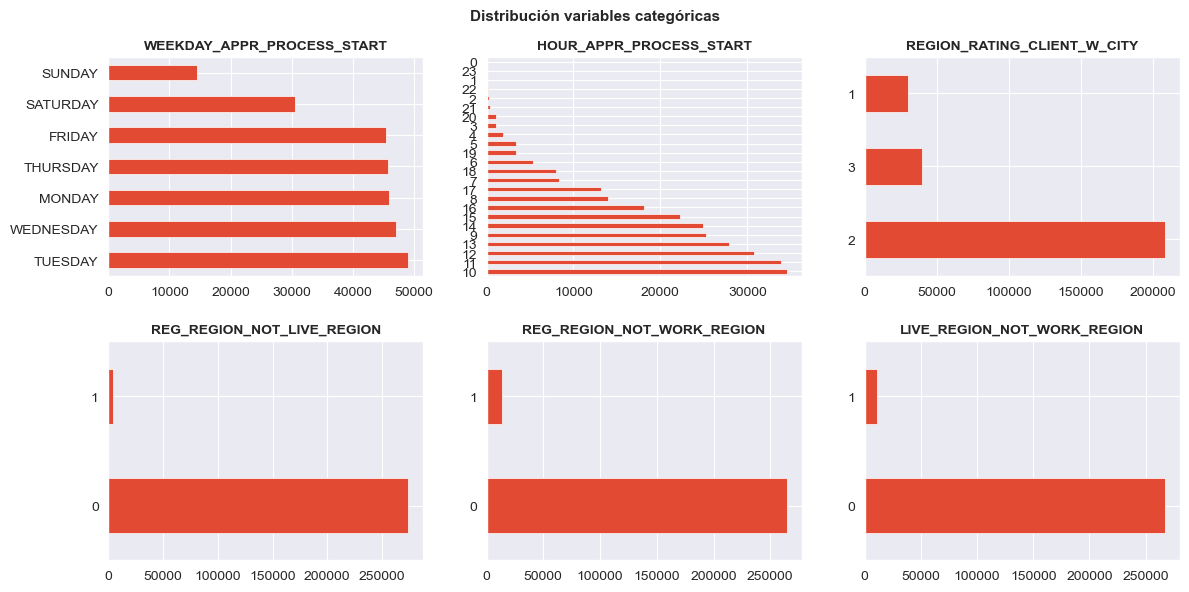

In [92]:
# Columnas a graficar
data_graf_obj2 = df_train_object.loc[:, [ 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                                         'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 
                                         'REG_REGION_NOT_WORK_REGION',  'LIVE_REGION_NOT_WORK_REGION' ]]

hlp.graficos_barra(data_graf_obj2)

- Los atributos `REG_REGION_NOT_LIVE_REGION`, `REG_REGION_NOT_WORK_REGION` , `LIVE_REGION_NOT_WORK_REGION`, serán eliminados ya que estos atributos están muy sesgadas a una sola categoría, o no parecen ser útiles para el análisis.

- `WEEKDAY_APPR_PROCESS_START` y `HOUR_APPR_PROCESS_START`, estos atributos se eliminarán, dado que no aportan para el análisis o no afectan en que un cliente sea buen o mal pagador.

- El atributo `REGION_RATING_CLIENT_W_CITY`, será analizado y comparado con el vector objetivo.

### Gráficos de Atributos :

* `NAME_TYPE_SUITE` : Quien acompaña al cliente cuando fue a solicitar el préstamo.
* `NAME_INCOME_TYPE` : Tipo de ingreso por parte del cliente.

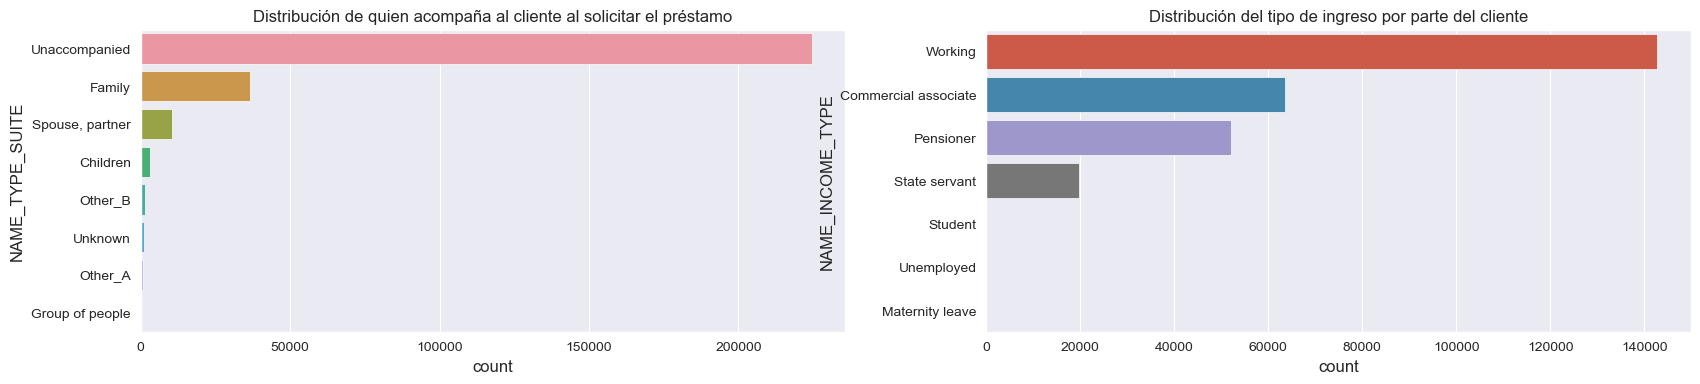

In [93]:
# Analisis con grafico de barras #
plt.figure(figsize=( 20, 4 )) 
# Atributo NAME_TYPE_SUITE - Quien acompaña al cliente cuando fue a solicitar el préstamo #
plt.subplot(1,2,1)
hlp.countplot(df_train_object, 'NAME_TYPE_SUITE', 'Distribución de quien acompaña al cliente al solicitar el préstamo')

# Atributo NAME_INCOME_TYPE - Tipo de ingreso por parte del cliente #
plt.subplot(1,2,2)
hlp.countplot(df_train_object, 'NAME_INCOME_TYPE', 'Distribución del tipo de ingreso por parte del cliente')

- El atributo `NAME_TYPE_SUITE`, no parece ser un atributo útil para el análisis, al parecer el cliente prefiere no ir acompañado cuando realiza esta solicitud, por lo que será eliminado.

- El atributo `NAME_INCOME_TYPE`, será recodificado a cuatro categorias: working, commercial, government y others.

In [94]:
# NAME_INCOME_TYPE
df_train_object['NAME_INCOME_TYPE'].value_counts(dropna=False)

Working                 142719
Commercial associate     63652
Pensioner                51993
State servant            19836
Student                     15
Unemployed                  15
Maternity leave              2
Name: NAME_INCOME_TYPE, dtype: int64

In [95]:
pd.crosstab(index=df_train_object['NAME_INCOME_TYPE'], columns=df_train_object['TARGET_'], normalize='index').T

NAME_INCOME_TYPE  Commercial associate  Maternity leave  Pensioner  \
TARGET_                                                              
Buen pagador                  0.921605              0.0   0.945339   
Mal pagador                   0.078395              1.0   0.054661   

NAME_INCOME_TYPE  State servant  Student  Unemployed   Working  
TARGET_                                                         
Buen pagador           0.940109      1.0    0.466667  0.900567  
Mal pagador            0.059891      0.0    0.533333  0.099433

In [96]:
# Recodificación a categorias NAME_INCOME_TYPE - Tipo de ingreso por parte del cliente - segun analisis de tabla
#==================================================================================================
name_income_type = df_train_object['NAME_INCOME_TYPE']
df_train['NAME_INCOME_TYPE'] = np.where((name_income_type == 'Working'), "working" ,
                                 np.where((name_income_type == 'Commercial associate'), "commercial",
                                    np.where((name_income_type == 'Pensioner') | (name_income_type == 'Maternity leave') |
                                             (name_income_type == 'Student') | (name_income_type == 'Unemployed'), "others", "government")))  

In [97]:
# NAME_INCOME_TYPE resultante
df_train['NAME_INCOME_TYPE'].value_counts() 

working       142719
commercial     63652
others         52025
government     19836
Name: NAME_INCOME_TYPE, dtype: int64

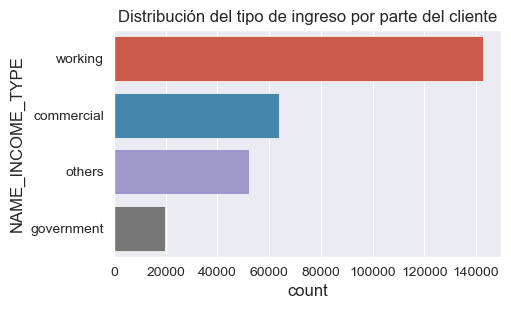

In [98]:
plt.figure(figsize=(5, 3))
hlp.countplot(df_train, 'NAME_INCOME_TYPE', 'Distribución del tipo de ingreso por parte del cliente');

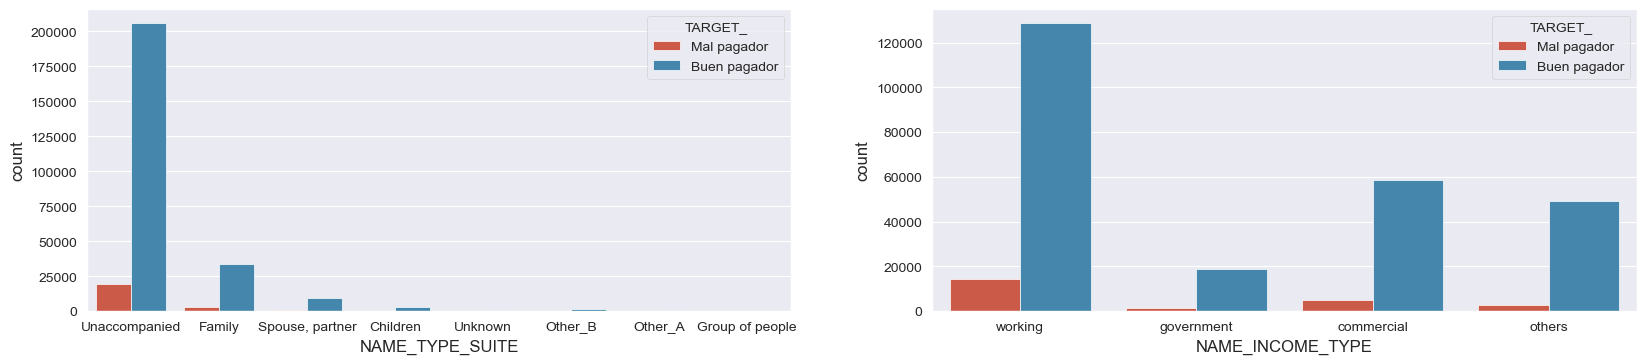

In [99]:
# Resultado de la recategorizacion
plt.figure(figsize=(20, 4)) 

plt.subplot(1,2,1)
sns.countplot(x="NAME_TYPE_SUITE", hue="TARGET_", data=df_train);

plt.subplot(1,2,2)
sns.countplot(x="NAME_INCOME_TYPE", hue="TARGET_", data=df_train);

De la recodificación anterior, se analizará el comportamiento de ambas variable en el análisis bivariado.

### Gráfico de Atributos :

* `NAME_EDUCATION_TYPE` : Máximo nivel educacional por parte del cliente.
* `NAME_FAMILY_STATUS` : Situación familiar del cliente.

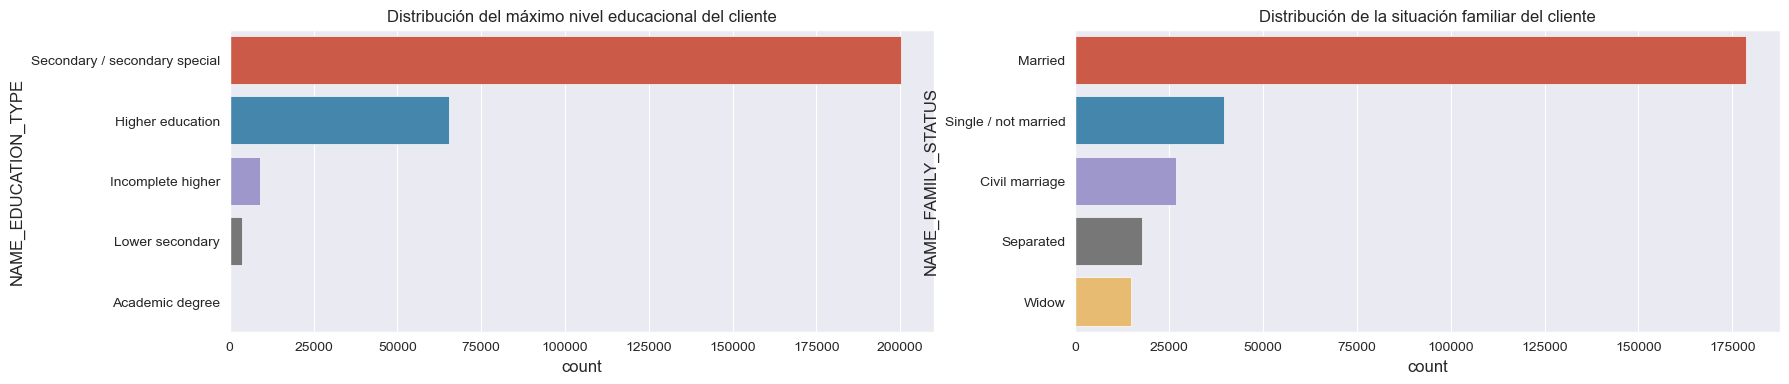

In [100]:
# Analisis con grafico de barras #
plt.figure(figsize=( 20, 4 )) 

# Atributo NAME_EDUCATION_TYPE - Máximo nivel educacional por parte del cliente
plt.subplot(1,2,1)
hlp.countplot(df_train_object, 'NAME_EDUCATION_TYPE', 'Distribución del máximo nivel educacional del cliente');

# Atributo NAME_FAMILY_STATUS - Situación familiar del cliente #
plt.subplot(1,2,2)
hlp.countplot(df_train_object, 'NAME_FAMILY_STATUS', 'Distribución de la situación familiar del cliente');

- El atributo `NAME_EDUCATION_TYPE` será recodificado a 3 categorias, y se observa que en general los clientes cuentan con estudios secundarios.

- El atributo `NAME_FAMILY_STATUS` será recodificado a 3 categorias, y los clientes indican ser casados a la hora de solicitar un crédito.

In [101]:
# NAME_EDUCATION_TYPE
df_train_object['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    200125
Higher education                  65321
Incomplete higher                  9032
Lower secondary                    3608
Academic degree                     146
Name: NAME_EDUCATION_TYPE, dtype: int64

In [102]:
pd.crosstab(index=df_train_object['NAME_EDUCATION_TYPE'], columns=df_train_object['TARGET_'], normalize='index')

TARGET_                        Buen pagador  Mal pagador
NAME_EDUCATION_TYPE                                     
Academic degree                    0.979452     0.020548
Higher education                   0.943449     0.056551
Incomplete higher                  0.911205     0.088795
Lower secondary                    0.889967     0.110033
Secondary / secondary special      0.908432     0.091568

In [103]:
# Recodificación a categorias NAME_EDUCATION_TYPE - Máximo nivel educacional por parte del cliente - segun analisis de tabla
#==================================================================================================
name_education_type = df_train_object['NAME_EDUCATION_TYPE']
df_train['NAME_EDUCATION_TYPE'] = np.where(((name_education_type == 'Secondary / secondary special') |\
                                            (name_education_type == 'Incomplete higher')), "secondary" ,\
                                      np.where(((name_education_type == 'Higher education') |\
                                                (name_education_type == 'Academic degree')),  "university", "school"))

In [104]:
# NAME_EDUCATION_TYPE resultante
df_train['NAME_EDUCATION_TYPE'].value_counts()

secondary     209157
university     65467
school          3608
Name: NAME_EDUCATION_TYPE, dtype: int64

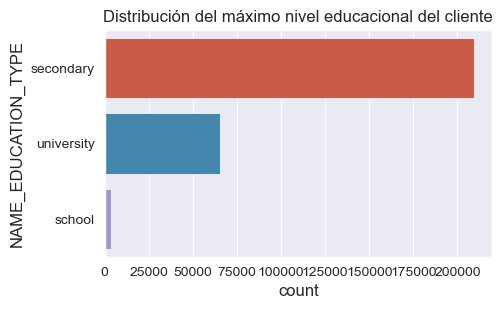

In [105]:
plt.figure(figsize=(5, 3))
hlp.countplot(df_train, 'NAME_EDUCATION_TYPE', 'Distribución del máximo nivel educacional del cliente');

In [106]:
# NAME_FAMILY_STATUS
df_train_object['NAME_FAMILY_STATUS'].value_counts()

Married                 178711
Single / not married     39709
Civil marriage           26981
Separated                17846
Widow                    14985
Name: NAME_FAMILY_STATUS, dtype: int64

In [107]:
pd.crosstab(index=df_train_object['NAME_FAMILY_STATUS'], columns=df_train_object['TARGET_']).apply(lambda r: r/r.sum() * 100, axis=1).T

NAME_FAMILY_STATUS  Civil marriage   Married  Separated  Single / not married  \
TARGET_                                                                         
Buen pagador             89.755754  92.18291  91.482685             89.747916   
Mal pagador              10.244246   7.81709   8.517315             10.252084   

NAME_FAMILY_STATUS      Widow  
TARGET_                        
Buen pagador        94.020687  
Mal pagador          5.979313

In [108]:
# Recodificación a categorias NAME_FAMILY_STATUS - Situación familiar del cliente - segun analisis de tabla
#==================================================================================================
name_family_status = df_train_object['NAME_FAMILY_STATUS']
df_train['NAME_FAMILY_STATUS'] = np.where(((name_family_status == 'Married') | (name_family_status == 'Civil marriage')), "married" , 'not_married')

In [109]:
df_train['NAME_FAMILY_STATUS'].value_counts()

married        205692
not_married     72540
Name: NAME_FAMILY_STATUS, dtype: int64

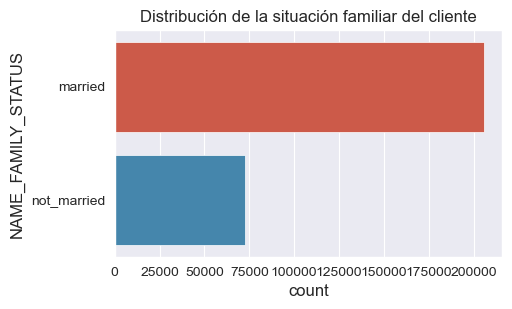

In [110]:
plt.figure(figsize=(5, 3))
hlp.countplot(df_train, 'NAME_FAMILY_STATUS', 'Distribución de la situación familiar del cliente');

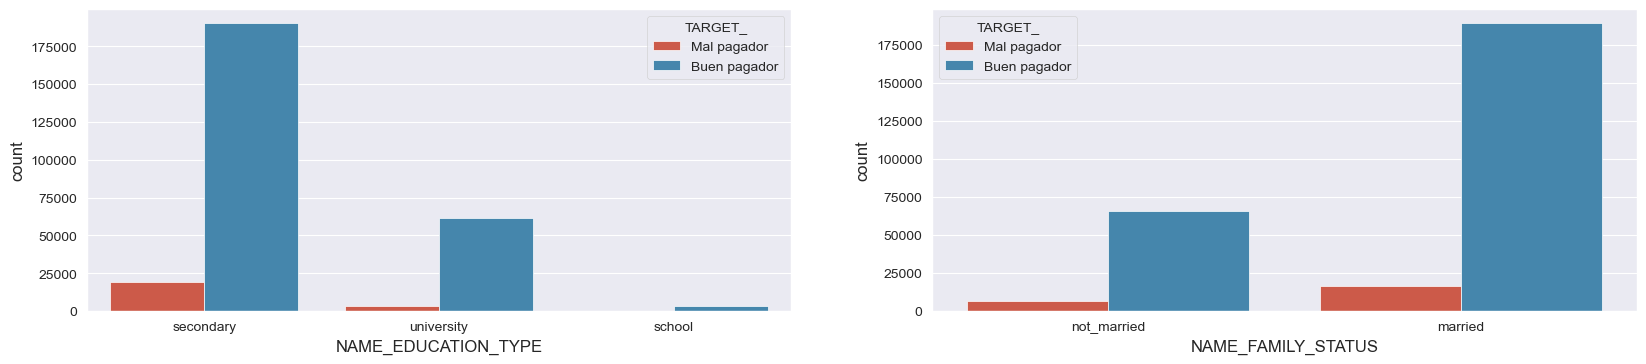

In [111]:
# Resultado de la recodificacion
plt.figure(figsize=(20, 4)) 

plt.subplot(1,2,1)
sns.countplot(x="NAME_EDUCATION_TYPE", hue="TARGET_", data=df_train);

plt.subplot(1,2,2)
sns.countplot(x="NAME_FAMILY_STATUS", hue="TARGET_", data=df_train);

De la recodificación anterior, se analizará el comportamiento de ambas variables en el análisis bivariado.

### Gráfico de atributos :

* `NAME_HOUSING_TYPE` : Cuál es la situación habitacional del cliente.
* `OCCUPATION_TYPE` : Cuál es la profesión del cliente.

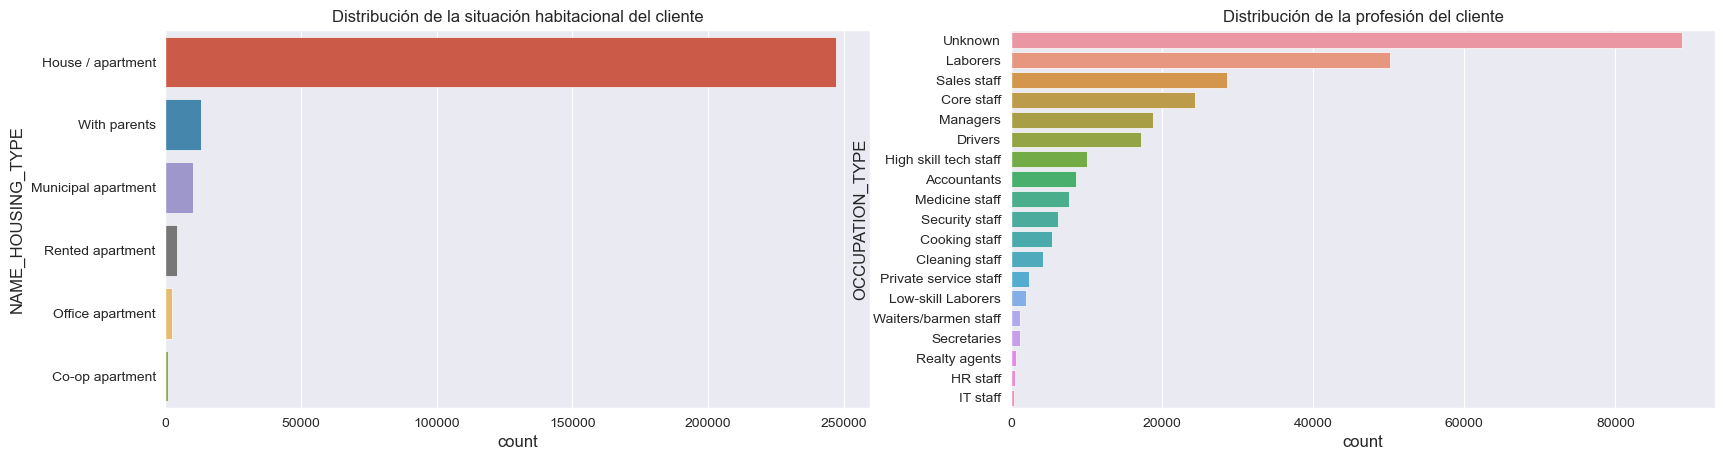

In [112]:
# Analisis con grafico de barras #
plt.figure(figsize=( 20, 5 )) 

# Atributo NAME_HOUSING_TYPE - Cuál es la situación habitacional del cliente #
plt.subplot(1,2,1)
hlp.countplot(df_train_object, 'NAME_HOUSING_TYPE', 'Distribución de la situación habitacional del cliente');

# Atributo OCCUPATION_TYPE - Tipo de organización donde trabaja el cliente #
plt.subplot(1,2,2)
hlp.countplot(df_train_object, 'OCCUPATION_TYPE', 'Distribución de la profesión del cliente');

- El atributo `NAME_HOUSING_TYPE` será recodificado a tres categorias, los clientes señalan tener casa o apartamento.

- El atributo `OCCUPATION_TYPE` será recodificado a 5 niveles, más la categoria `Unknown` a clientes que no se identifican en algun nivel profesional.

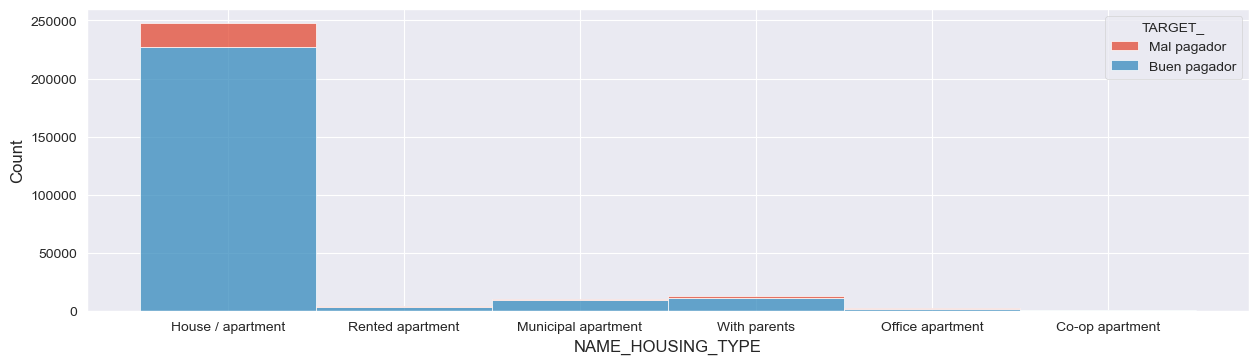

In [113]:
plt.figure(figsize=(15, 4)) 
sns.histplot(binwidth=0.5, x='NAME_HOUSING_TYPE', hue="TARGET_", data=df_train_object, stat="count", multiple="stack");
plt.xticks(rotation=0);

In [114]:
pd.crosstab(index=df_train_object['NAME_HOUSING_TYPE'], columns=df_train_object['TARGET_']).apply(lambda r: r/r.sum() * 100, axis=1).T

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET_                                                                      
Buen pagador             91.649899          91.939415            91.120445   
Mal pagador               8.350101           8.060585             8.879555   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET_                                                              
Buen pagador              93.208031         87.296037      87.79755  
Mal pagador                6.791969         12.703963      12.20245

In [115]:
# Recodificación a categorias NAME_HOUSING_TYPE - Cuál es la situación habitacional del cliente - segun analisis de tabla y grafico
#==================================================================================================
name_housing_type = df_train_object['NAME_HOUSING_TYPE']
df_train['NAME_HOUSING_TYPE'] = np.where(((name_housing_type == 'With parents') | (name_housing_type == 'Rented apartment')), 'with_parents_or_rented',
                                         np.where((name_housing_type == 'House / apartment'), 'house_apartment', 'others'))

In [116]:
# NAME_HOUSING_TYPE resultante
df_train['NAME_HOUSING_TYPE'].value_counts()

house_apartment           247389
with_parents_or_rented     17271
others                     13572
Name: NAME_HOUSING_TYPE, dtype: int64

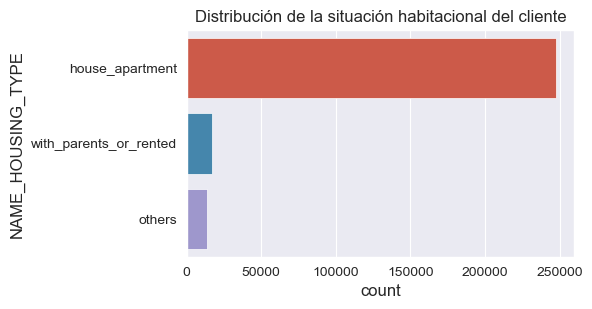

In [117]:
plt.figure(figsize=(5, 3))
hlp.countplot(df_train, 'NAME_HOUSING_TYPE', 'Distribución de la situación habitacional del cliente');

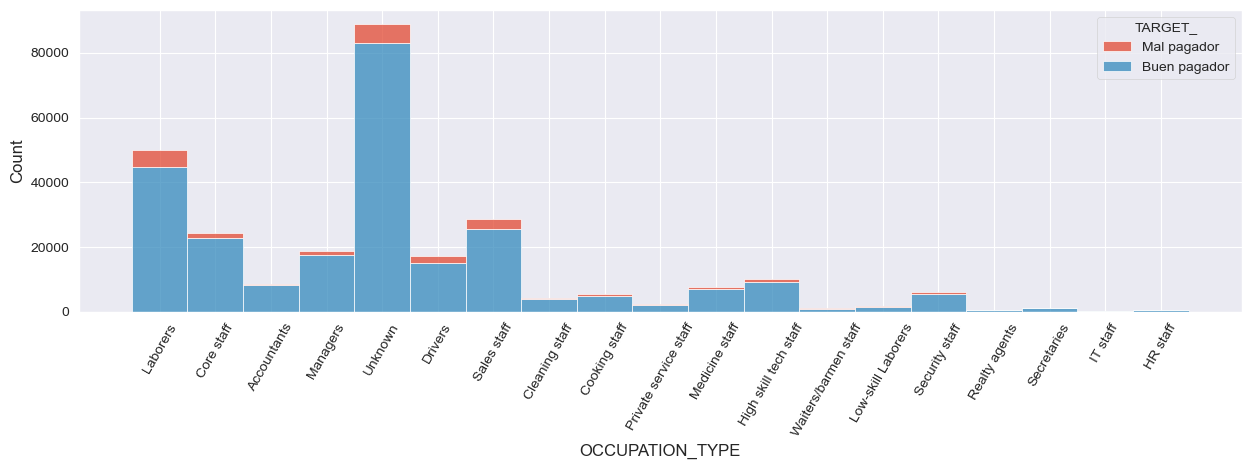

In [118]:
plt.figure(figsize=(15, 4)) 
sns.histplot(binwidth=0.5, x="OCCUPATION_TYPE", hue="TARGET_", data=df_train_object, stat="count", multiple="stack");
plt.xticks(rotation=60);

Como se observa, existen 18 categorías únicas de la varible `OCCUPATION_TYPE`, por lo que se recategoriza a 5 niveles para disminuir la cantidad de valores dentro de esta. Se debe considerar además que esta varible posee 88800 nulos que corresponden a un 31.9% de sus observaciones, por lo que, se define una categoria como `Unknown` para representar a los clientes que no tienen definido el tipo de ocupación.

Para agrupar, se analiza la tasa de malos pagadores por categoría, agrupando categorías que tienen % de malos pagadores similares. Así, se espera obtener distintos grupos que contengan distintos tipos de ocupación, con un comportamiento similar en función de la variable objetivo, y a su vez, que los distintos grupos tengan comportamiento diferente (lo cual se verá en análisis bivariado). 

In [119]:
# Recodificación de categorias OCCUPATION_TYPE - Cuál es la profesión del cliente
#==================================================================================================
lista_g1 = ['Core staff','High skill tech staff','HR staff','IT staff','Managers',
            'Medicine staff','Private service staff','Realty agents','Secretaries']
lista_g2 = ['Cleaning staff','Sales staff']
lista_g3 = ['Cooking staff','Laborers','Security staff']
lista_g4 = ['Drivers','Low-skill Laborers','Waiters/barmen staff']
lista_g5 = ['Accountants']

df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].replace(lista_g1,'OCCUPATION_TYPE_G1')
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].replace(lista_g2,'OCCUPATION_TYPE_G2')
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].replace(lista_g3,'OCCUPATION_TYPE_G3')
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].replace(lista_g4,'OCCUPATION_TYPE_G4')
df_train['OCCUPATION_TYPE'] = df_train['OCCUPATION_TYPE'].replace(lista_g5,'OCCUPATION_TYPE_G5')

In [120]:
# OCCUPATION_TYPE Resultante
df_train['OCCUPATION_TYPE'].value_counts() 

Unknown               88800
OCCUPATION_TYPE_G1    65962
OCCUPATION_TYPE_G3    61746
OCCUPATION_TYPE_G2    32769
OCCUPATION_TYPE_G4    20348
OCCUPATION_TYPE_G5     8607
Name: OCCUPATION_TYPE, dtype: int64

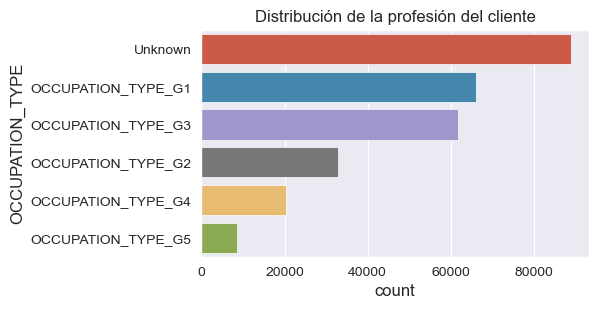

In [121]:
plt.figure(figsize=(5, 3))
hlp.countplot(df_train, 'OCCUPATION_TYPE', 'Distribución de la profesión del cliente');

El ajuste del atributo `OCCUPATION_TYPE`, fue resumido a 5 categorias y de la imputacion de nulos se reemplazo el valor `NaN` por `Unknown`.

- Grupo 1 `OCCUPATION TYPE` representa a las profesiones: `Core staff`, `High skill tech staff`, `HR staff`, `IT staff`, `Managers`, `Medicine staff`, `Private service staff`, `Realty agents`, `Secretaries`
- Grupo 2 `OCCUPATION TYPE` representa a las profesiones: `Cleaning staff`, `Sales staff`
- Grupo 3 `OCCUPATION TYPE` representa a las profesiones: `Cooking staff`, `Laborers`, `Security staff`
- Grupo 4 `OCCUPATION TYPE` representa a las profesiones: `Drivers`, `Low-skill Laborers`, `Waiters/barmen staff`
- Grupo 5 `OCCUPATION TYPE` representa a las profesiones: `Accountants`

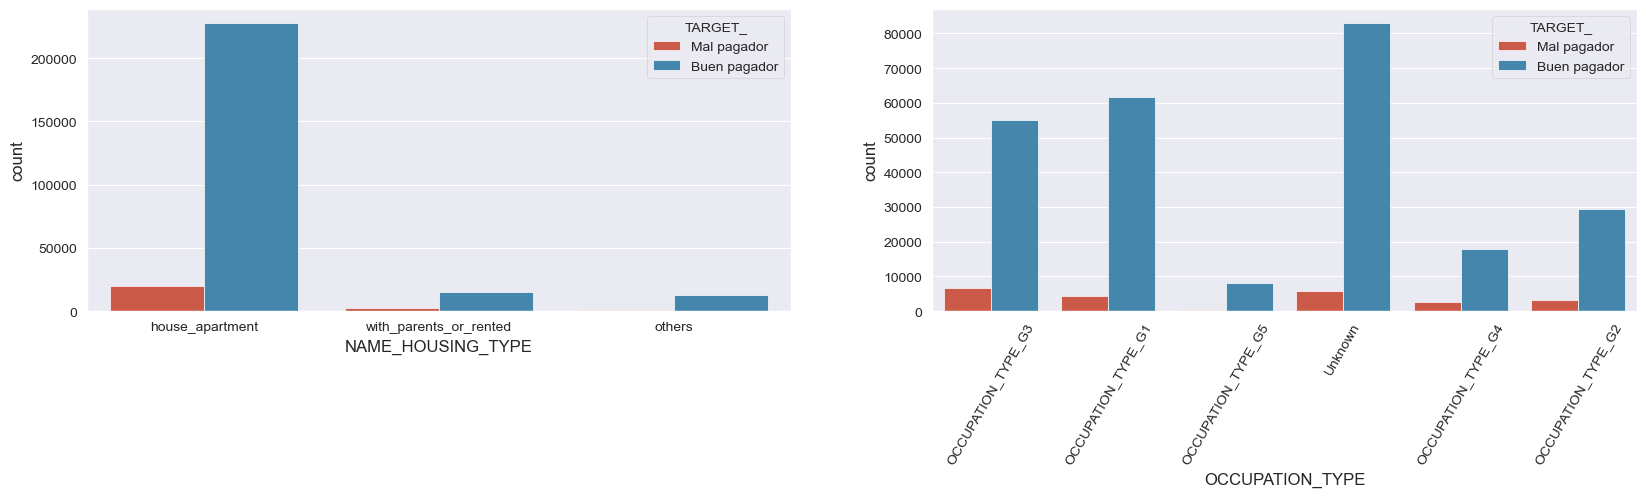

In [122]:
# Resultado de la recodificación
plt.figure(figsize=(20, 4)) 

plt.subplot(1,2,1)
sns.countplot(x="NAME_HOUSING_TYPE", hue="TARGET_", data=df_train);

plt.subplot(1,2,2)
sns.countplot(x="OCCUPATION_TYPE", hue="TARGET_", data=df_train);
plt.xticks(rotation=60);

De la recodificación anterior, se analizará el comportamiento de ambas variables en el análisis bivariado.

### Gráfico de atributo :

* ` ORGANIZATION_TYPE` : Tipo de organización donde trabaja el cliente.

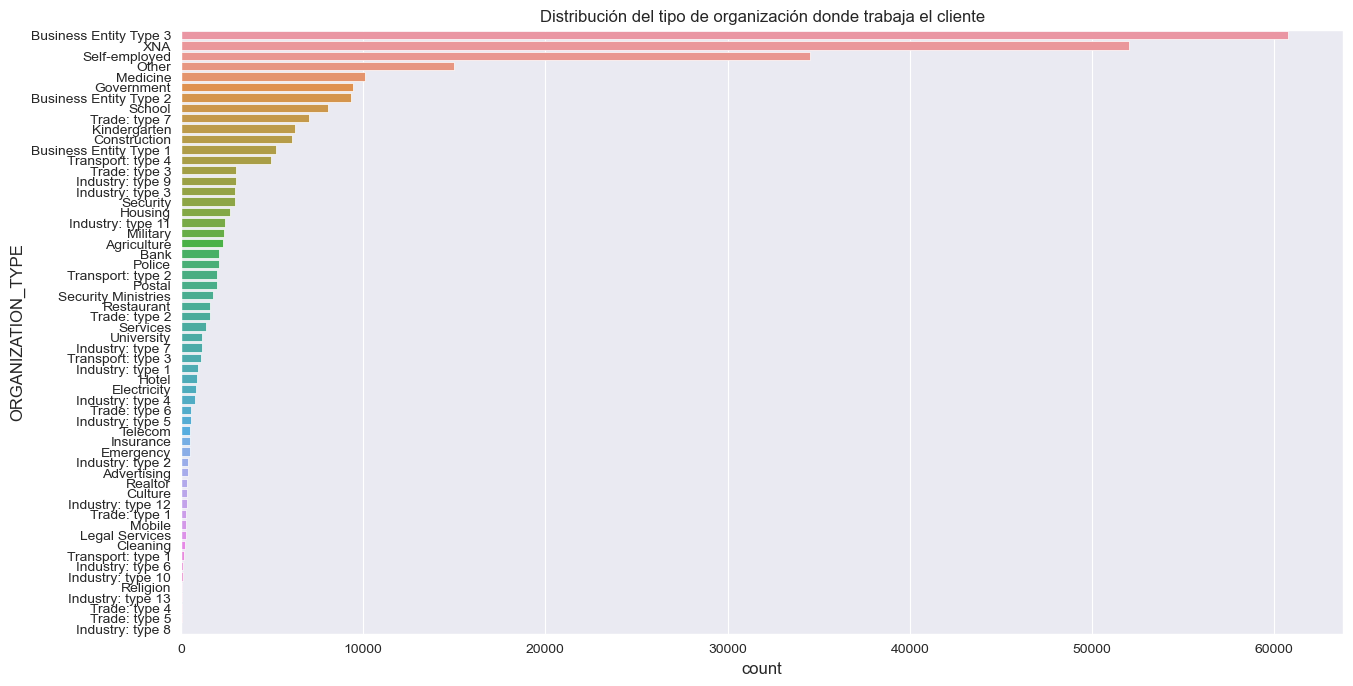

In [123]:
# Atributo ORGANIZATION_TYPE - Tipo de organización donde trabaja el cliente
plt.figure(figsize=(15, 8))
hlp.countplot(df_train_object, 'ORGANIZATION_TYPE', 'Distribución del tipo de organización donde trabaja el cliente');

- El atributo `ORGANIZATION_TYPE`, será recodificado en varias categorias, dado que se observan diversas entidades y subcategorias según el tipo. También se observa la categoria `XNA` con una alta concentración de observaciones nulas.

In [124]:
len(df_train_object['ORGANIZATION_TYPE'].value_counts())

58

Como se observa, existen 58 categorías únicas de la varible `ORGANIZATION_TYPE`, por lo que se recategoriza a 8 niveles para disminuir la cantidad de valores dentro de esta. Se debe considerar además que esta variable posee 52008 nulos que se sumaran a la última categoría.

La primera categorización se realiza en base a la descripción de la variable, donde por ejemplo valores como `Industry: type 1`, `Industry: type 10` (distintos tipos de organizaciones), se agrupan dentro de una misma categoría `Industry`. Para esto se aplica la función `extrae_tipo`.

Del resultado de esta agrupación resultan 35 categorías, por lo que se vuelven a categorizar para reducir la dimensionalidad. Para esto se utiliza la misma metodología que con la variable `ORGANIZATION_TYPE`, donde se analiza el % de malos según categoría. Así, se espera obtener distintos grupos que contengan distintos tipos de organización, con un comportamiento similar en función de la variable objetivo, y a su vez, que los distintos grupos tengan comportamiento diferente (lo cual se verá en análisis bivariado).

In [125]:
# Recodificacion para recategorizar ORGANIZATION_TYPE
#==================================================================================================

# De esta recodificacion se obtiene  35 categorias
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].apply(lambda x: hlp.extrae_tipo(x))

# Se agrupan las 35 categorias segun niveles de riesgo en 8 niveles
lista_g1 = ["Construction","Realtor","Restaurant"]
lista_g2 = ["Agriculture","Cleaning","Security","Self-employed","Transport"]
lista_g3 = ["Business Entity","Trade"]
lista_g4 = ["Advertising","Industry","Mobile","Postal"]
lista_g5 = ["Housing","Legal Services","Other"]
lista_g6 = ["Electricity","Emergency","Government","Kindergarten","Medicine","Services","Telecom"]
lista_g7 = ["Hotel","Insurance","Religion","School"]
lista_g8 = ["Bank","Culture","Military","Police","Security Ministries","University","XNA"]

df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(lista_g1,'ORGANIZATION_TYPE_G1')
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(lista_g2,'ORGANIZATION_TYPE_G2')
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(lista_g3,'ORGANIZATION_TYPE_G3')
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(lista_g4,'ORGANIZATION_TYPE_G4')
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(lista_g5,'ORGANIZATION_TYPE_G5')
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(lista_g6,'ORGANIZATION_TYPE_G6')
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(lista_g7,'ORGANIZATION_TYPE_G7')
df_train['ORGANIZATION_TYPE'] = df_train['ORGANIZATION_TYPE'].replace(lista_g8,'ORGANIZATION_TYPE_G8')

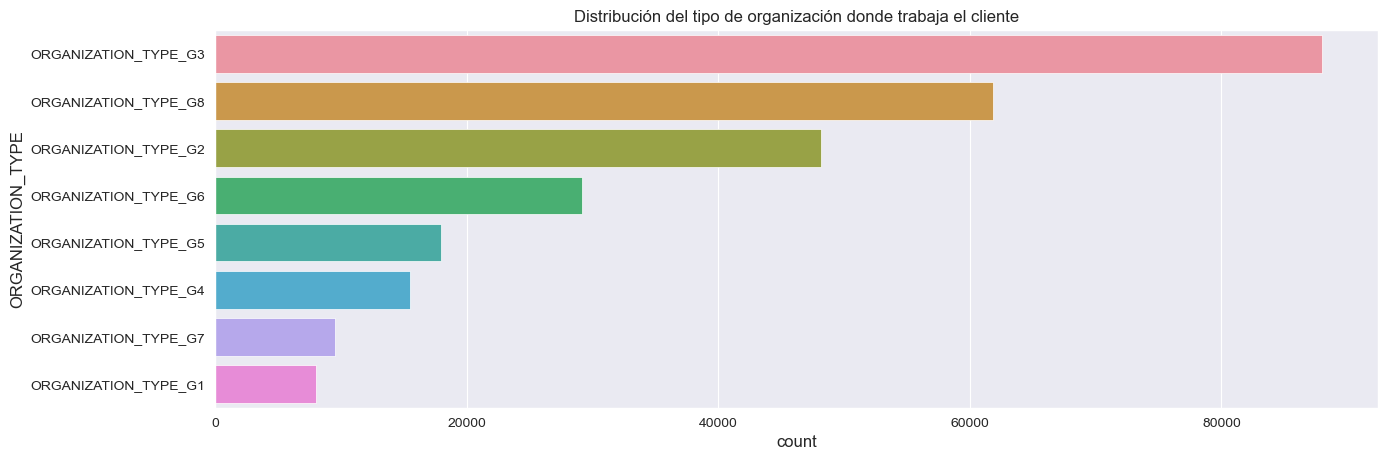

In [126]:
# Atributo ORGANIZATION_TYPE - Tipo de organización donde trabaja el cliente
plt.figure(figsize=(15, 5))
hlp.countplot(df_train, 'ORGANIZATION_TYPE', 'Distribución del tipo de organización donde trabaja el cliente');

La 8 categorias son:

- Grupo 1 `ORGANIZATION TYPE` representa a las organizaciones: `Construction`, `Realtor`, `Restaurant`
- Grupo 2 `ORGANIZATION TYPE` representa a las organizaciones: `Agriculture`, `Cleaning`, `Security`, `Self-employed`, `Transport`
- Grupo 3 `ORGANIZATION TYPE` representa a las organizaciones: `Business`, `Entity`, `Trade`
- Grupo 4 `ORGANIZATION TYPE` representa a las organizaciones: `Advertising`, `Industry`, `Mobile`,`Postal`
- Grupo 5 `ORGANIZATION TYPE` representa a las organizaciones: `Housing`, `Legal Services`, `Other`
- Grupo 6 `ORGANIZATION TYPE` representa a las organizaciones: `Electricity`,  `Emergency`, `Government`, `Kindergarten`, `Medicine`, `Services`, `Telecom`
- Grupo 7 `ORGANIZATION TYPE` representa a las organizaciones: `Hotel`, `Insurance`, `Religion`, `School`
- Grupo 8 `ORGANIZATION TYPE`  representa a las organizaciones: `Bank`, `Culture`, `Military`, `Police`, `Security`, `Ministries`,`University` y `XNA`.

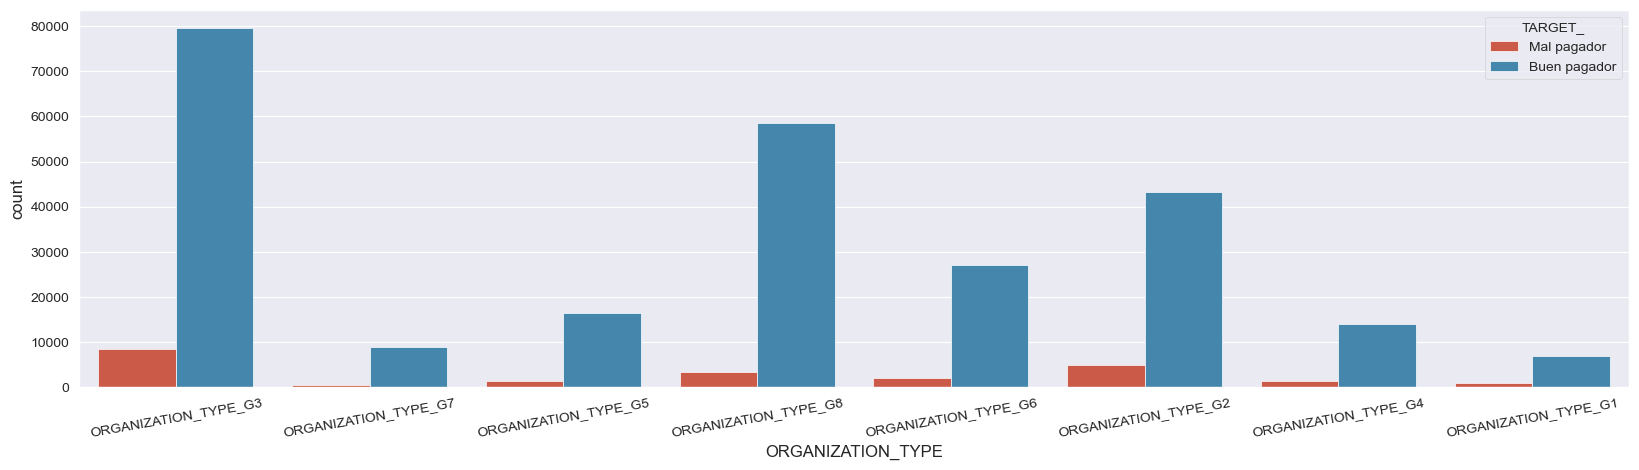

In [127]:
# Resultado de la recodificación
plt.figure(figsize=(20, 5)) 
sns.countplot(x="ORGANIZATION_TYPE", hue="TARGET_", data=df_train);
plt.xticks(rotation=10);

De la recodificación anterior, se analizará el comportamiento de ambas variables en el análisis bivariado.

### Gráfico de atributos:

* `FLAG_DOCUMENT_2`: Indicador documento 2.
* `FLAG_DOCUMENT_3`: Indicador documento 3.
* `FLAG_DOCUMENT_4`: Indicador documento 4.
* `FLAG_DOCUMENT_5`: Indicador documento 5.
* `FLAG_DOCUMENT_6`: Indicador documento 6.
* `FLAG_DOCUMENT_7`: Indicador documento 7.

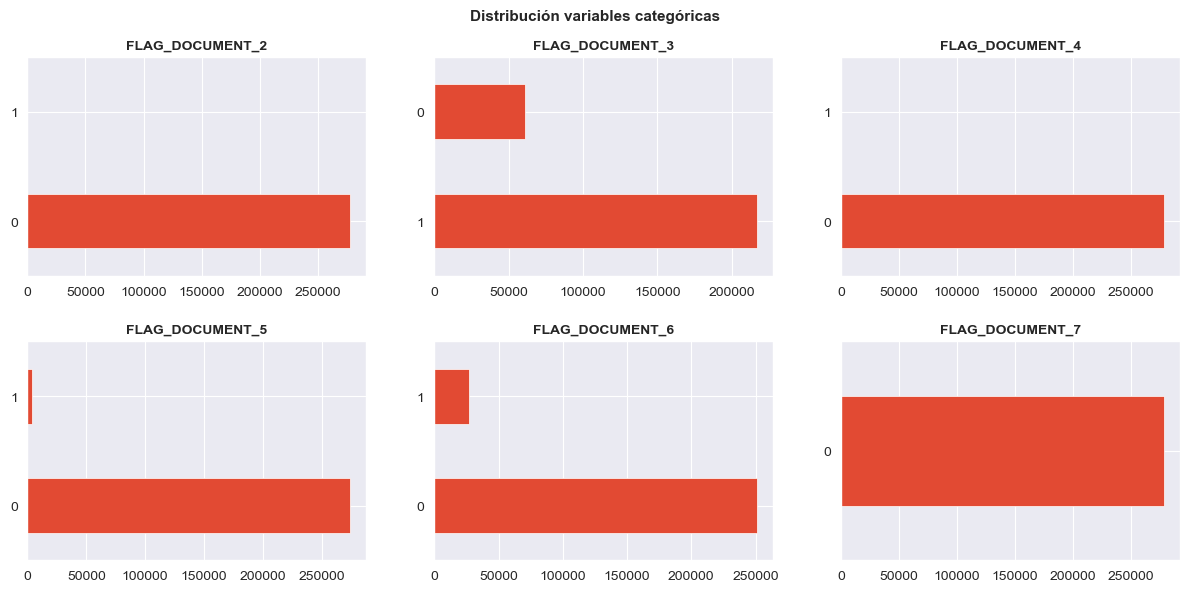

In [128]:
# Columnas agrupadas para graficar
data_graf_obj3 = df_train_object.loc[:, [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
                                       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7' ]]
hlp.graficos_barra(data_graf_obj3)

Estos atributos: `FLAG_DOCUMENT_2`, `FLAG_DOCUMENT_3`, `FLAG_DOCUMENT_4`, `FLAG_DOCUMENT_5`, `FLAG_DOCUMENT_6`, `FLAG_DOCUMENT_7`, serán eliminados , ya que algunas  categorías solo tienen un nivel, además de indicar un flag de documento, donde no sabemos cual es más o menos importante.  

### Gráfico de atributos:

* `FLAG_DOCUMENT_8`: Indicador documento 8.
* `FLAG_DOCUMENT_9`: Indicador documento 9.
* `FLAG_DOCUMENT_10`: Indicador documento 10.
* `FLAG_DOCUMENT_11`: Indicador documento 11.
* `FLAG_DOCUMENT_12`: Indicador documento 12.
* `FLAG_DOCUMENT_13`: Indicador documento 13.

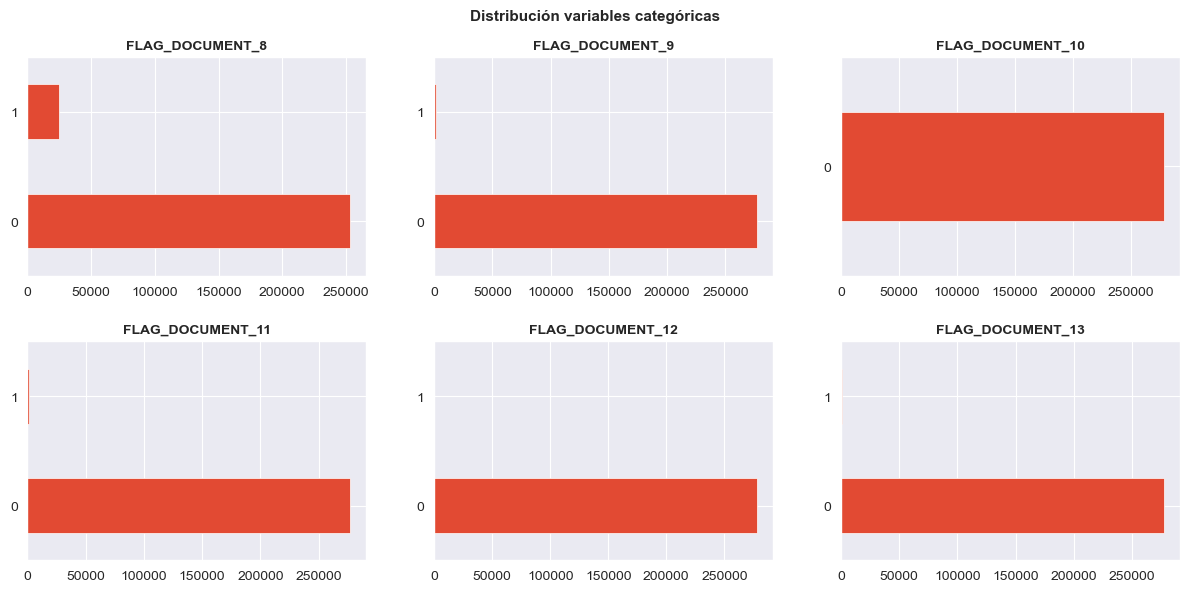

In [129]:
# Columnas agrupadas para graficar
data_graf_obj4 = df_train_object.loc[:, [ 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 
                                       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13' ]]
hlp.graficos_barra(data_graf_obj4)

Estos atributos: `FLAG_DOCUMENT_8`,`FLAG_DOCUMENT_9` , `FLAG_DOCUMENT_10`, `FLAG_DOCUMENT_11`, `FLAG_DOCUMENT_12` y `FLAG_DOCUMENT_13` serán eliminados , ya que algunas solo tienen un nivel, además de indicar un flag de documento, donde no sabemos cual es más o menos importante. 

### Gráfico de atributos:

* `FLAG_DOCUMENT_14`: Indicador documento 14.
* `FLAG_DOCUMENT_15`: Indicador documento 15.
* `FLAG_DOCUMENT_16`: Indicador documento 16.
* `FLAG_DOCUMENT_17`: Indicador documento 17.
* `FLAG_DOCUMENT_18`: Indicador documento 18.
* `FLAG_DOCUMENT_19`: Indicador documento 19.

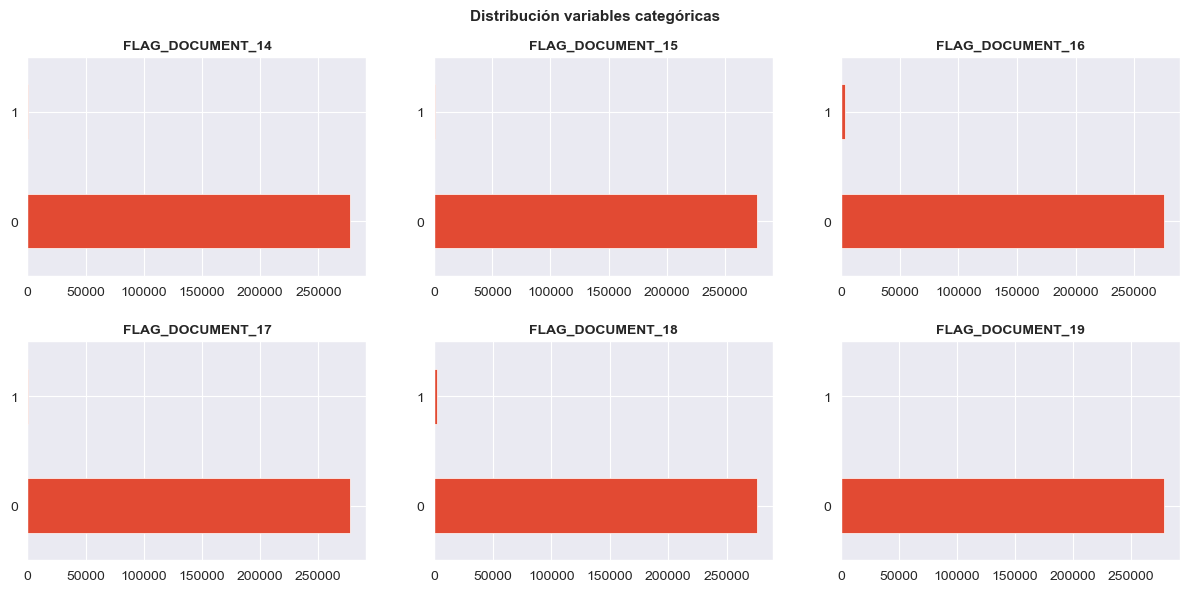

In [130]:
# Columnas agrupadas para graficar
data_graf_obj5 = df_train_object.loc[:, [ 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
                                       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19' ]]
hlp.graficos_barra(data_graf_obj5)

- Estos atributos `FLAG_DOCUMENT_14`, `FLAG_DOCUMENT_15`, `FLAG_DOCUMENT_16`, `FLAG_DOCUMENT_17`,  `FLAG_DOCUMENT_18` y `FLAG_DOCUMENT_19` serán eliminados, ya que estas categorías sólo tienen un nivel o estan muy sesgadas a una sola categoría, además de indicar un flag de documento, pero no sabemos cual es más o menos importante.

### Gráfico de atributos:

* `FLAG_DOCUMENT_20`: Indicador documento 20.
* `FLAG_DOCUMENT_21`: Indicador documento 21.

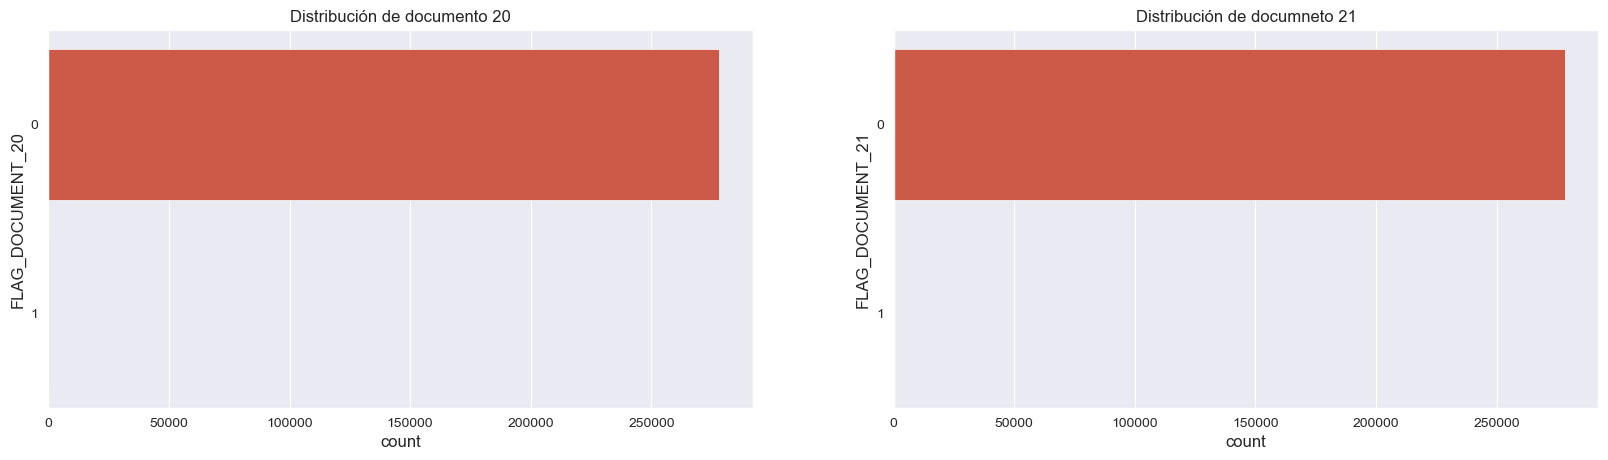

In [131]:
# Analisis con grafico de barras #
plt.figure(figsize=( 20, 5 )) 
# Atributo FLAG_DOCUMENT_20 - 
plt.subplot(1,2,1)
hlp.countplot(df_train_object, 'FLAG_DOCUMENT_20', 'Distribución de documento 20');

# Atributo FLAG_DOCUMENT_21  - 
plt.subplot(1,2,2)
hlp.countplot(df_train_object, 'FLAG_DOCUMENT_21', 'Distribución de documneto 21');

- Se eliminarán los atributos `FLAG_DOCUMENT_20`, `FLAG_DOCUMENT_21`,  ya que solo tienen un nivel, además de indicar un flag de documento, pero no sabemos cual es mas o menos importante.

### 2.11.10 Eliminación de atributos categóricos de análisis univariado

In [132]:
# Seleccion de columnas categoricas a Eliminar
#==================================================================================================
columns_object_drop = [
    'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
    'LIVE_REGION_NOT_WORK_REGION', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
    'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15' , 
    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18' , 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
    'FLAG_DOCUMENT_21']

In [133]:
len(columns_object_drop)

29

In [134]:
# Eliminacion de Atributos categoricas Transformados: 
#==================================================================================================
df_train = df_train.drop(columns = columns_object_drop)

In [135]:
df_train.columns

Index(['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',
       'LOG_AMT_INCOME_TOTAL', 'LOG_AMT_CREDIT', 'WITH_DAYS_WORKED',
       'LOG_DAYS_REGISTRATION', 'LOG_DAYS_ID_PUBLISH', 'PHONE_CHANGE',
       'TARGET_'],
      dtype='object')

In [136]:
df_train.shape

(278232, 33)

## 2.12 Análisis bivariado de atributos con Vector Objetivo

### 2.12.1 Gráficos

In [137]:
# Seleccion de variables continuas
df_train_num = df_train.select_dtypes(include=['float64', 'int'])
df_train_num.columns

Index(['TARGET', 'CNT_CHILDREN', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',
       'LOG_AMT_INCOME_TOTAL', 'LOG_AMT_CREDIT', 'WITH_DAYS_WORKED',
       'LOG_DAYS_REGISTRATION', 'LOG_DAYS_ID_PUBLISH', 'PHONE_CHANGE'],
      dtype='object')

### Gráfico de atributos con target:

- `LOG_AMT_INCOME_TOTAL` : ingreso total del cliente
- `LOG_AMT_CREDIT` : cantidad total del préstamo realizado.
- `LOG_DAYS_REGISTRATION` : cantidad de días previos a la última modificación de los registros del cliente previos a la postulación.
- `LOG_DAYS_ID_PUBLISH` : cantidad de días previos a la modificación de su documento de identificación con el cual postulo al préstamo.

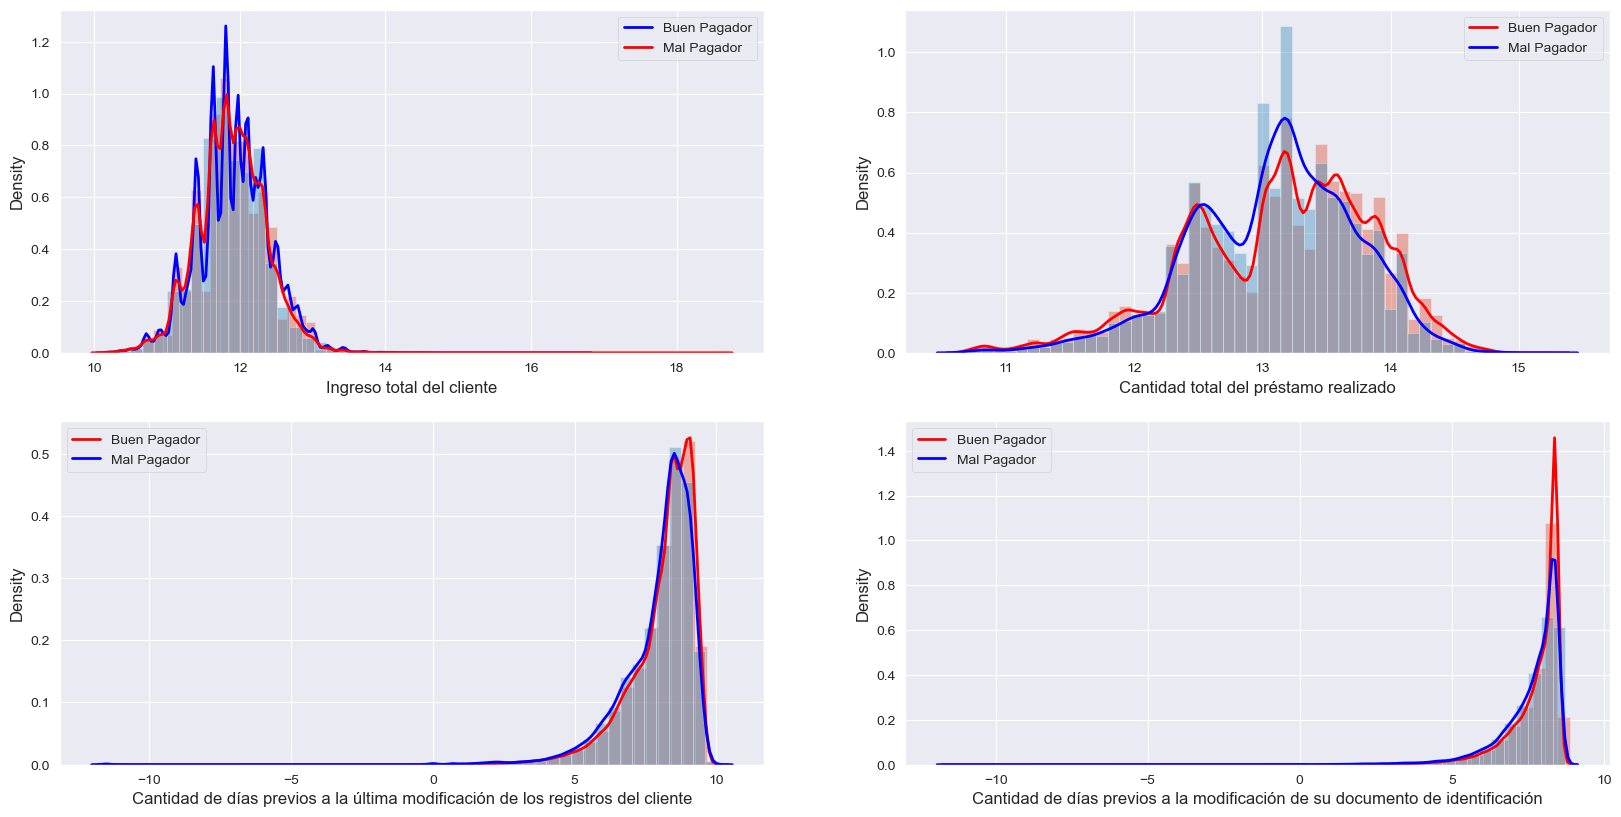

In [138]:
# Gráficos
mask0 = df_train['TARGET_']=='Buen pagador'
mask1 = df_train['TARGET_']=='Mal pagador'

plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.distplot(df_train['LOG_AMT_INCOME_TOTAL'][mask0].dropna(), kde_kws={"color": "b", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['LOG_AMT_INCOME_TOTAL'][mask1], kde_kws={"color": "r", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Ingreso total del cliente', fontsize = 12);
plt.legend();

plt.subplot(2,2,2)
sns.distplot(df_train['LOG_AMT_CREDIT'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['LOG_AMT_CREDIT'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Cantidad total del préstamo realizado', fontsize = 12);
plt.legend();

plt.subplot(2,2,3)
sns.distplot(df_train['LOG_DAYS_REGISTRATION'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['LOG_DAYS_REGISTRATION'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Cantidad de días previos a la última modificación de los registros del cliente', fontsize = 12);
plt.legend();

plt.subplot(2,2,4)
sns.distplot(df_train['LOG_DAYS_ID_PUBLISH'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['LOG_DAYS_ID_PUBLISH'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Cantidad de días previos a la modificación de su documento de identificación', fontsize = 12);
plt.legend();

- Las variables `LOG_AMT_INCOME_TOTAL`, `LOG_DAYS_REGISTRATION`, `LOG_DAYS_ID_PUBLISH` presentan varios observaciones atipicas, de esta manera se advierte que son variables que podrían ser buenas predictoras.

- `LOG_AMT_CREDIT`, tiene una distribución similar respecto del comportamiento del cliente.

### Gráfico de atributos con target:

* `AGE` : Edad del cliente cuando solicito el préstamo.
* `CNT_CHILDREN`: Cantidad de hijos.
* `CNT_FAM_MEMBERS`: Cuántos miembros familiares tiene el cliente.

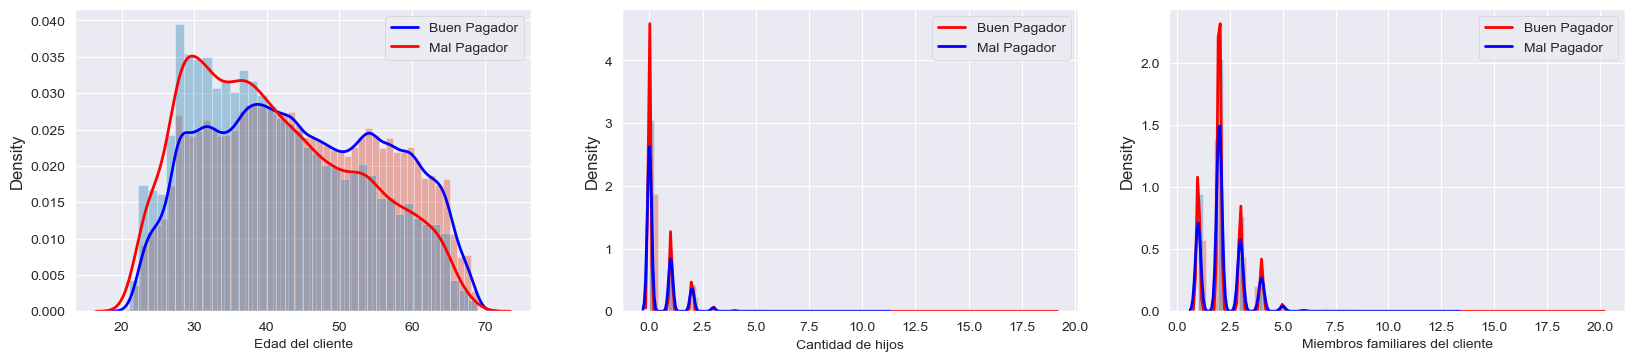

In [139]:
# Gráficos
mask0 = df_train['TARGET_']=='Buen pagador'
mask1 = df_train['TARGET_']=='Mal pagador'

plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(df_train['AGE'][mask0].dropna(), kde_kws={"color": "b", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['AGE'][mask1], kde_kws={"color": "r", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Edad del cliente', fontsize = 10);
plt.legend();

plt.subplot(1,3,2)
sns.distplot(df_train['CNT_CHILDREN'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['CNT_CHILDREN'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Cantidad de hijos', fontsize = 10);
plt.legend();

plt.subplot(1,3,3)
sns.distplot(df_train['CNT_FAM_MEMBERS'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['CNT_FAM_MEMBERS'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Miembros familiares del cliente', fontsize = 10);
plt.legend();

- Los clientes con mayor cantidad de hijos tiender a ser malos pagadores y su distribución es distinta, lo que adelanta que será una variable importante para el modelo.
- En las variables `CNT_CHILDREN` y `CNT_FAM_MEMBERS`  tienen una distribución similar respecto del comportamiento del cliente, y contienen outlier, pues se nota en sus colas de las distribución que están muy cargadas hacia el extremo derecho.

### Gráfico de atributos con target:

* `REGION_RATING_CLIENT` : Evaluación interna (de Home Credit Group) sobre la región donde vive el cliente.
* `REG_CITY_NOT_LIVE_CITY` : Identificador booleano si es que la dirección permanente no concuerda con la dirección de contacto.
* `REG_CITY_NOT_WORK_CITY` : Identificador booleano si es que la dirección permanente no concuerda con la dirección del trabajo.
* `LIVE_CITY_NOT_WORK_CITY` : Identificador booleano si es que la dirección de contacto del cliente no concuerda con la dirección del trabajo.

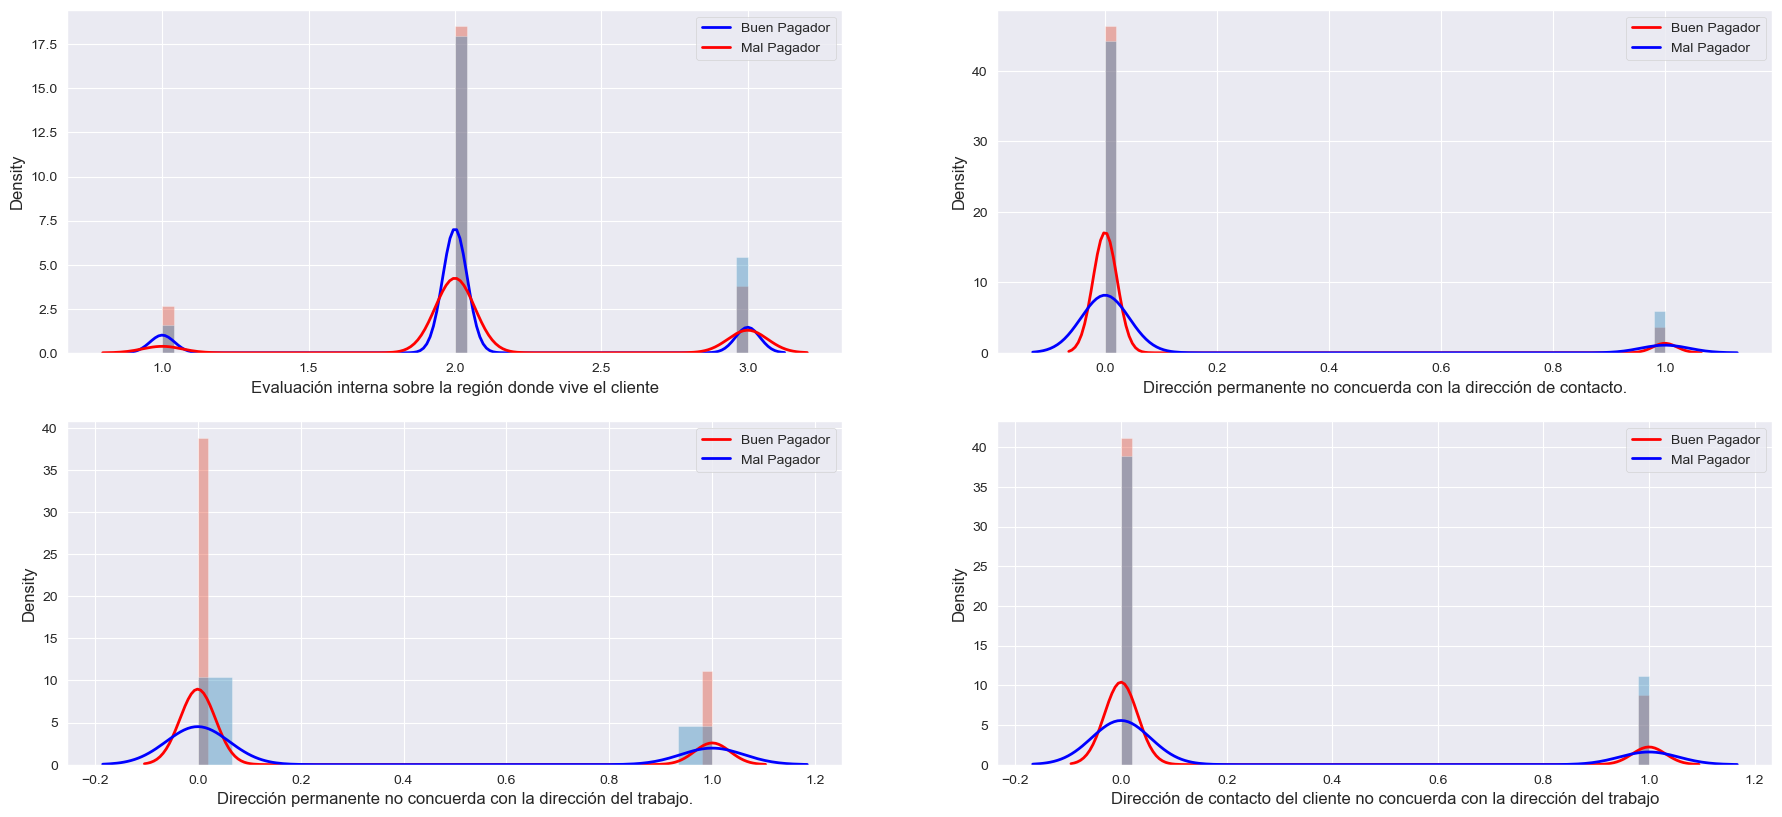

In [140]:
# Gráficos
mask0 = df_train['TARGET_']=='Buen pagador'
mask1 = df_train['TARGET_']=='Mal pagador'

plt.figure(figsize=(22, 10))
plt.subplot(2,2,1)
sns.distplot(df_train['REGION_RATING_CLIENT'][mask0].dropna(), kde_kws={"color": "b", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['REGION_RATING_CLIENT'][mask1], kde_kws={"color": "r", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Evaluación interna sobre la región donde vive el cliente', fontsize = 12);
plt.legend();

plt.subplot(2,2,2)
sns.distplot(df_train['REG_CITY_NOT_LIVE_CITY'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['REG_CITY_NOT_LIVE_CITY'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Dirección permanente no concuerda con la dirección de contacto.', fontsize = 12);
plt.legend();

plt.subplot(2,2,3)
sns.distplot(df_train[ 'REG_CITY_NOT_WORK_CITY'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train[ 'REG_CITY_NOT_WORK_CITY'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Dirección permanente no concuerda con la dirección del trabajo.', fontsize = 12);
plt.legend();

plt.subplot(2,2,4)
sns.distplot(df_train['LIVE_CITY_NOT_WORK_CITY'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['LIVE_CITY_NOT_WORK_CITY' ][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Dirección de contacto del cliente no concuerda con la dirección del trabajo', fontsize = 12);
plt.legend();

- Estas variables tienen una distribución muy similar respecto del comportamiento del cliente, por lo que no aportarían al modelo. 

### Gráfico de atributos con target:

* `FLAG_EMP_PHONE`: Da un teléfono de trabajo de contacto. (1: YES, 0: NO)
* `FLAG_WORK_PRONE` : Da un telefono de hogar de contacto. (1: YES, 0: NO)
* `PHONE_CHANGE` : Cambia de telefóno antes de la postulación.

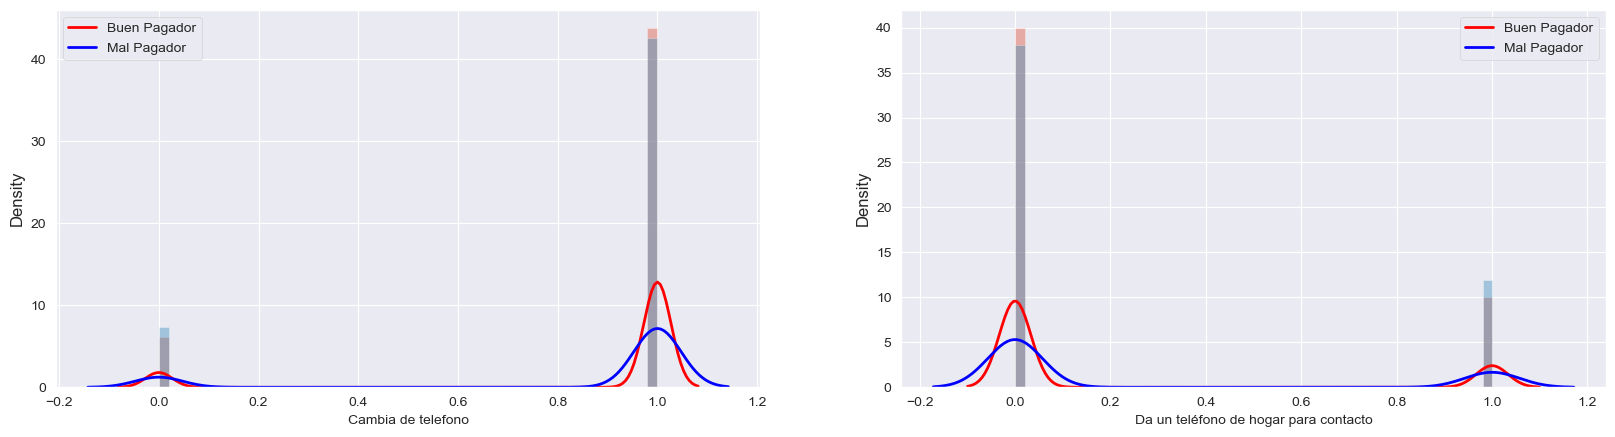

In [141]:
# Atributos 
mask0 = df_train['TARGET_']=='Buen pagador'
mask1 = df_train['TARGET_']=='Mal pagador'

plt.figure(figsize=(20 ,5 ))

plt.subplot(1,2,1)
sns.distplot(df_train['PHONE_CHANGE'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['PHONE_CHANGE'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Cambia de telefono', fontsize = 10);
plt.legend();

plt.subplot(1,2,2)
sns.distplot(df_train['FLAG_WORK_PHONE'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['FLAG_WORK_PHONE'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Da un teléfono de hogar para contacto', fontsize = 10);
plt.legend();

- Existe un alto porcentaje de clientes con edades entre los 25 y 40 años calificados como malos pagadores.
- Clientes que no entregan teléfono de trabajo tienden  a ser buenos pagadores, pero no entregan teléfono de hogar. 
- La distribucion de ambas variables tienen una distribución muy similar respecto del comportamiento del cliente, por lo que no aportarían al modelo.

### Gráfico de atributos con target:

* `WITH_DAYS_WORKED`: Con días trabajados previos a la postulación.
* `EXT_SOURCE_2`: Puntaje normalizado de fuente externa 2.
* `EXT_SOURCE_3`: Puntaje normalizado de fuente externa 3.

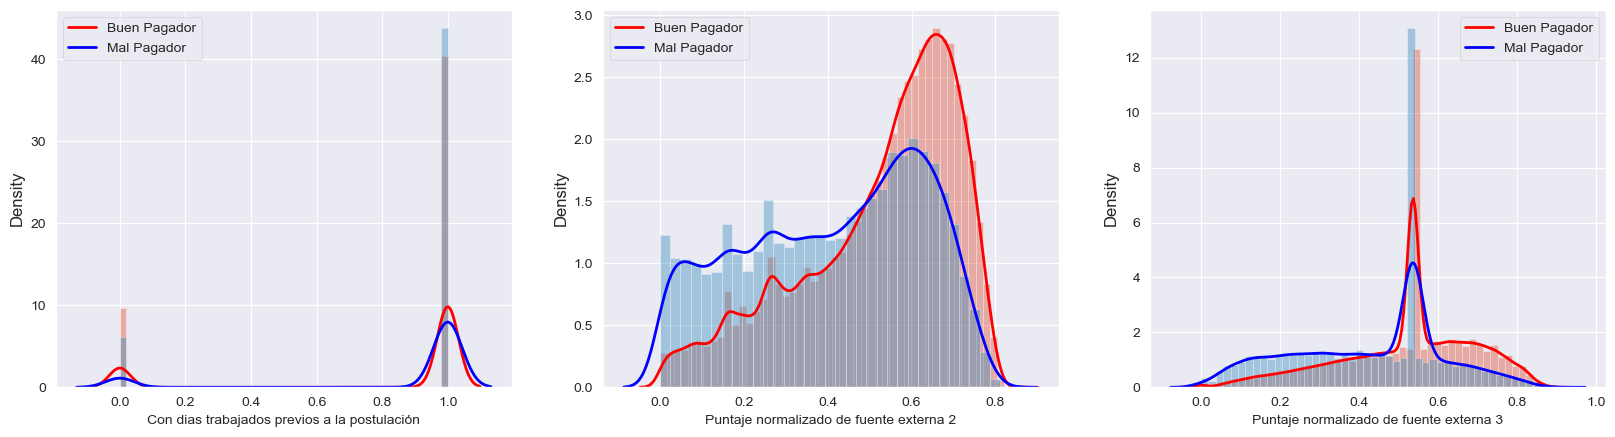

In [142]:
# Atributos

mask0 = df_train['TARGET_']=='Buen pagador'
mask1 = df_train['TARGET_']=='Mal pagador'

plt.figure(figsize=(20 ,5 ))

plt.subplot(1,3,1)
sns.distplot(df_train['WITH_DAYS_WORKED'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['WITH_DAYS_WORKED'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Con dias trabajados previos a la postulación', fontsize = 10);
plt.legend();

plt.subplot(1,3,2)
sns.distplot(df_train['EXT_SOURCE_2'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['EXT_SOURCE_2'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Puntaje normalizado de fuente externa 2', fontsize = 10);
plt.legend();

plt.subplot(1,3,3)
sns.distplot(df_train['EXT_SOURCE_3'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['EXT_SOURCE_3'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Puntaje normalizado de fuente externa 3', fontsize = 10);
plt.legend();

- Existe una mayor presencia de clientes con mejores puntajes de ser calificado como mejores pagadores.
- `WITH_DAYS_WORKED` tienen una distribución muy similar respecto del comportamiento del cliente, por lo que no aportaría significativamente al modelo, para el caso de las variables `EXT_SOURCE_2` y `EXT_SOURCE_3` las distribuciones son considerablemente distintas , por lo que podrian ser variables importantes para el modelo.

### Gráfico de atributos con target:

* `DEF_30_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 30 días su entorno.
* `DEF_60_CNT_SOCIAL_CIRCLE` : Cuántas veces ha registrado mora más de 60 días su entorno.
* `AMT_REQ_CREDIT_BUREAU_MON`: Cantidad de consultas sobre el cliente al buró de crédito. Un mes antes de la postulación.
* `AMT_REQ_CREDIT_BUREAU_YEAR`: Cantidad de consultas sobre el cliente al buró de crédito. Un año antes de la postulación.

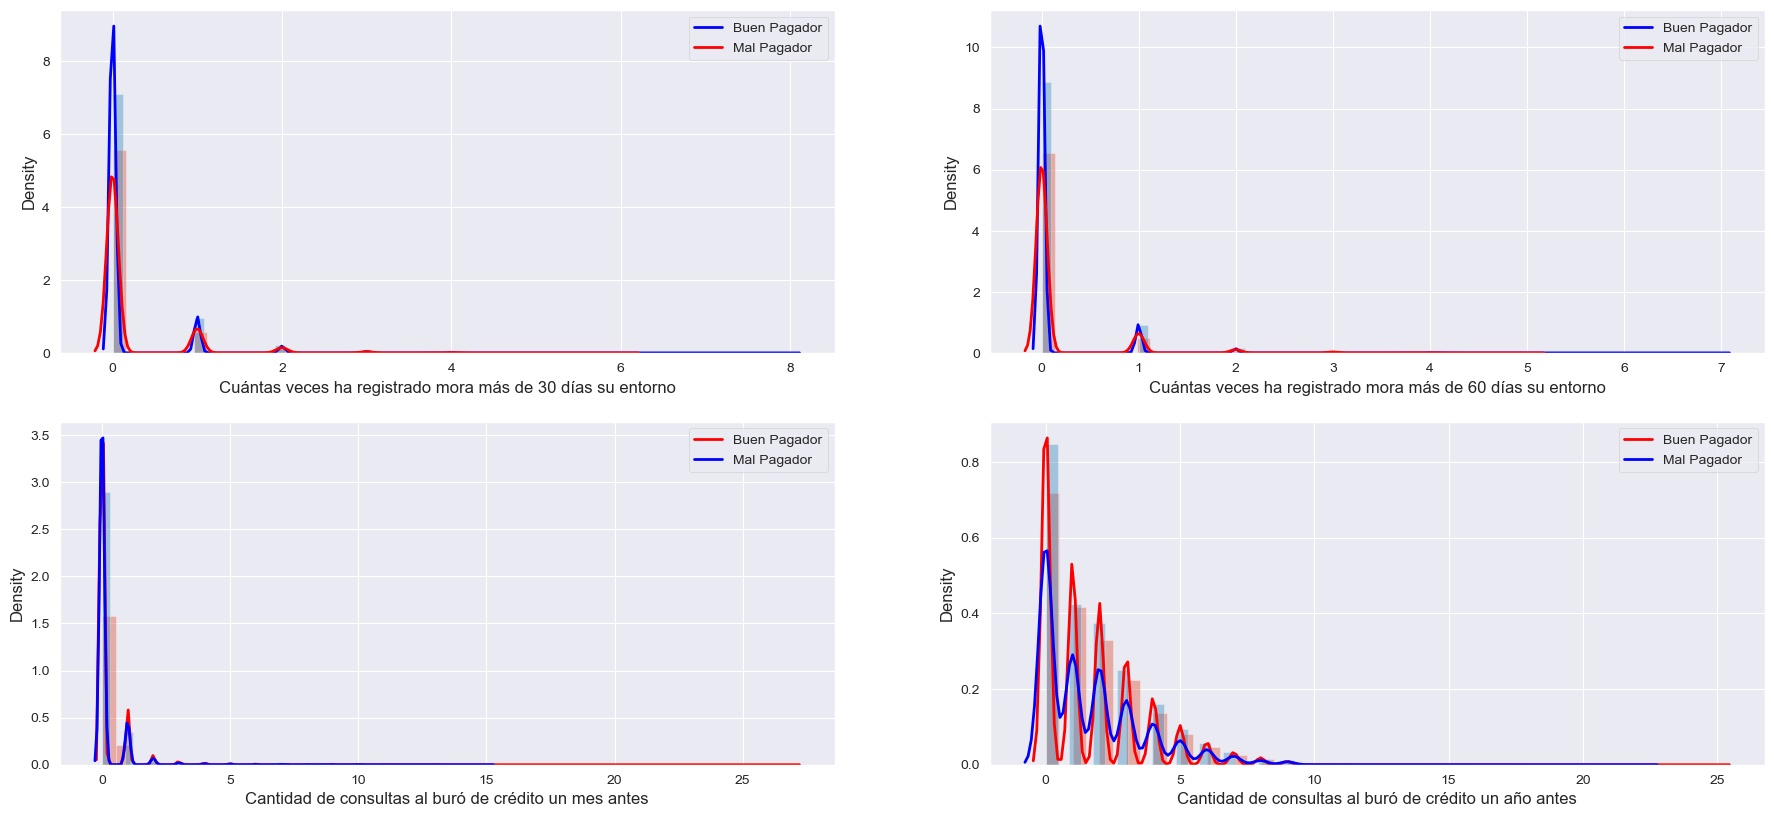

In [143]:
# Gráficos
mask0 = df_train['TARGET_']=='Buen pagador'
mask1 = df_train['TARGET_']=='Mal pagador'

plt.figure(figsize=(22, 10))
plt.subplot(2,2,1)
sns.distplot(df_train['DEF_30_CNT_SOCIAL_CIRCLE'][mask0].dropna(), kde_kws={"color": "b", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['DEF_30_CNT_SOCIAL_CIRCLE'][mask1], kde_kws={"color": "r", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Cuántas veces ha registrado mora más de 30 días su entorno', fontsize = 12);
plt.legend();

plt.subplot(2,2,2)
sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'][mask0].dropna(), kde_kws={"color": "b", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['DEF_60_CNT_SOCIAL_CIRCLE'][mask1], kde_kws={"color": "r", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Cuántas veces ha registrado mora más de 60 días su entorno', fontsize = 12);
plt.legend();

plt.subplot(2,2,3)
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_MON'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Cantidad de consultas al buró de crédito un mes antes', fontsize = 12);
plt.legend();

plt.subplot(2,2,4)
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'][mask0], kde_kws={"color": "r", "lw": 2, "label": "Buen Pagador"})
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'][mask1], kde_kws={"color": "b", "lw": 2, "label": "Mal Pagador"});
plt.xlabel('Cantidad de consultas al buró de crédito un año antes', fontsize = 12);
plt.legend();

- Estos atributos `DEF_30_CNT_SOCIAL_CIRCLE` , `DEF_60_CNT_SOCIAL_CIRCLE`, `AMT_REQ_CREDIT_BUREAU_MON` y `AMT_REQ_CREDIT_BUREAU_YEAR` presentan varios observaciones atipicas, lo que sugiere que podrían ser variables importantes para el modelo.

In [144]:
# Seleccion de variables categoricas
df_train_object = df_train.select_dtypes(include=['object'])
df_train_object.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'TARGET_'],
      dtype='object')

### Gráfico Boxplot entre Target y edad segmentado por género

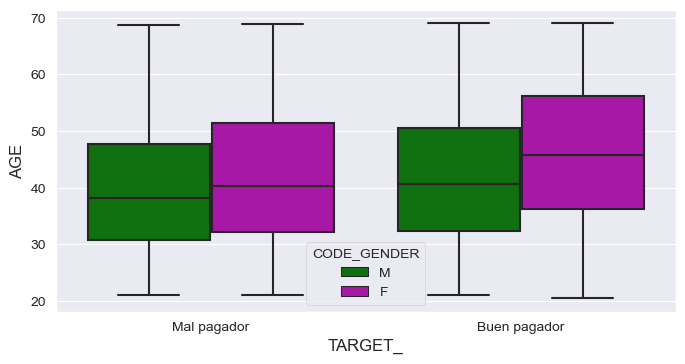

In [145]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
sns.boxplot(x="TARGET_", y="AGE", hue="CODE_GENDER", palette=["g", "m"], data=df_train);
#sns.despine(offset=10, trim=True)

- No se observa una diferencia de edad marcada entre los hombres respecto de su comportamiento de pago, son la mujeres las que tienden a tener un mejor comportamiento de pago entre los 35 y 55 años de edad, a diferencia de los hombres que mejoran su comportamiento entre los 30 y 50 años.

### Gráfico de atributos con target:

* `CODE_GENDER`: Sexo del cliente.
* `FLAG_OWN_CAR`: Indicador binario sobre la tenencia de automóvil por parte del cliente.
* `FLAG_OWN_REALTY`: Indicador binario sobre la propiedad de una casa o departamento por parte del cliente.

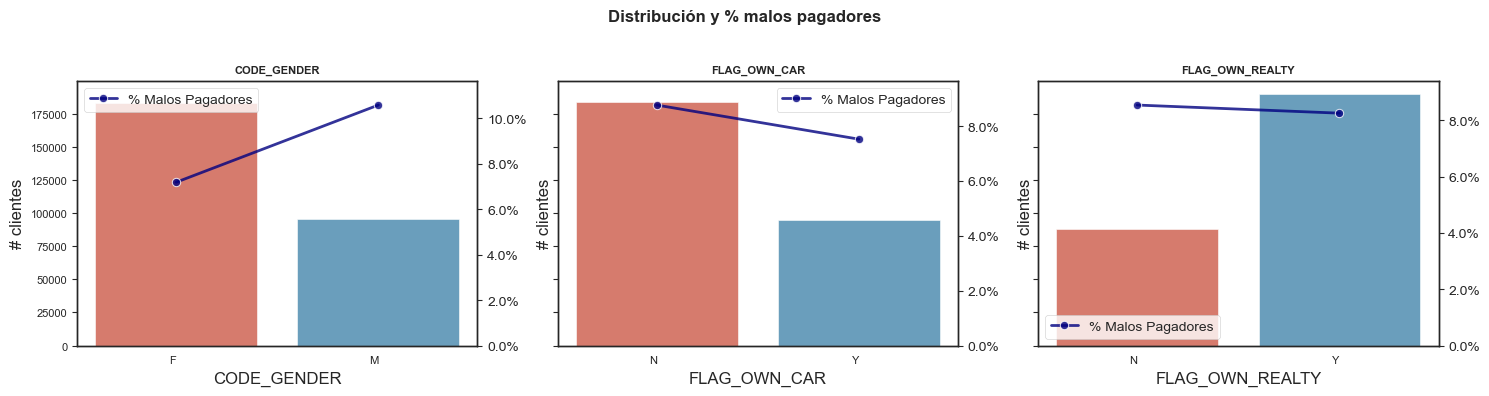

In [146]:
# Seleccion de columnas para graficar
sns.set_style("white")
data_graf_obj1 = df_train_object.loc[:, [ 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY' ]]
hlp.barplot_multiple_porc(df_train, data_graf_obj1, 0)

- Se observa un mayor porcentaje de malos pagadores en los hombres con respecto a las mujeres.

- Respecto de la tenencia de automovil `FLAG_OWN_CAR` por parte del cliente, este presenta un mal comportamiento de pago, si no tiene auto.

- Respecto si el cliente posee casa o departamento `FLAG_OWN_REALTY`, no hay mucha diferencia entre la tasa de malos, por lo que esta variable se eliminará.

### Gráfico de atributos con target:

* `NAME_EDUCATION_TYPE`: Máximo nivel educacional por parte del cliente.
* `NAME_FAMILY_STATUS`: Situación familiar del cliente.
* `NAME_INCOME_TYPE`: Tipo de ingreso.
* `REGION_RATING_CLIENT_W_CITY`: Evaluación interna (de Home Crédito Group) sobre la región donde vive el cliente considerando ciudad.

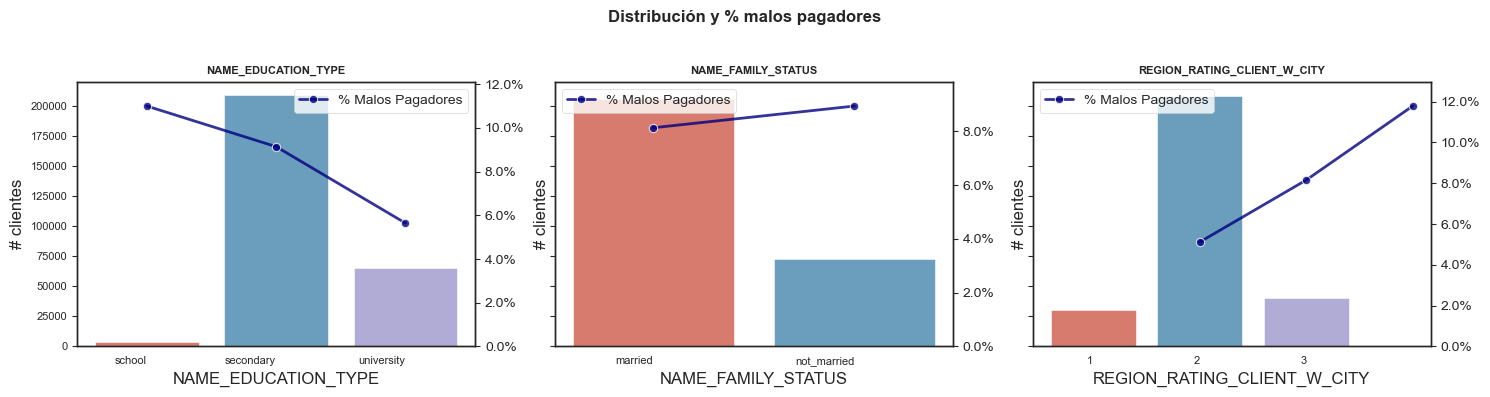

In [147]:
# Seleccion de columnas para graficar
data_graf_obj2 = df_train_object.loc[:, [ 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',  'REGION_RATING_CLIENT_W_CITY' ]]
hlp.barplot_multiple_porc(df_train, data_graf_obj2, 0)

- Los clientes que tienen mejor nivel de educación son mejores pagadores.

- Ser casado indica mejor comportamiento de pago, aunque no se observa una gran  variación  respecto de su situacion familiar.

- Se elimina `REGION_RATING_CLIENTE_W_CITY`  por tener un comportamiento equivalente a `REGION_RATING_CLIENT`.

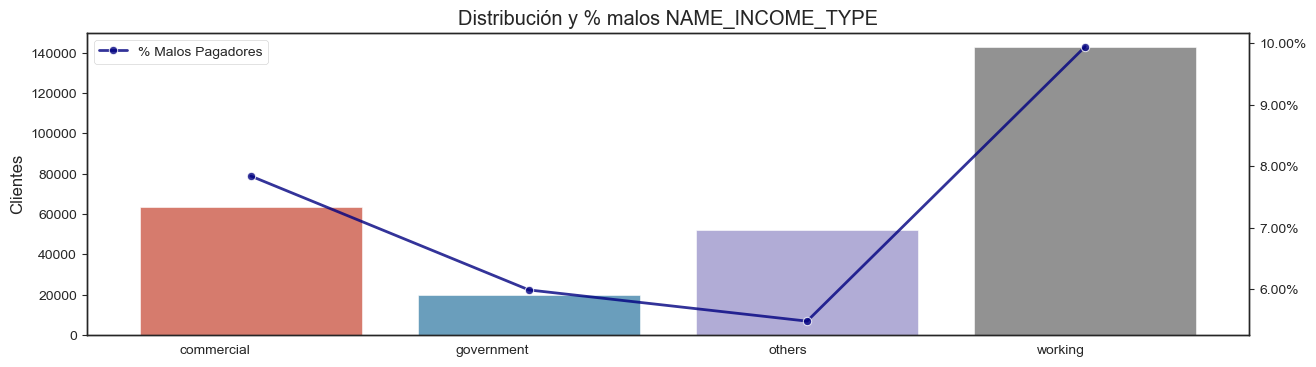

In [148]:
# Atributo NAME_INCOME_TYPE con TARGET
hlp.grafico_bivariado_cat(df_train, 'NAME_INCOME_TYPE','TARGET', (15,4), 0);

- Existe un porcentaje de clientes que trabajan que tienen un peor comportamiento de pago a diferencia de otros en los que se incluyen los desempleados y estudiantes.

### Gráfico de atributos con target:

* `NAME_HOUSING_TYPE`: Cuál es la situación habitacional del cliente.

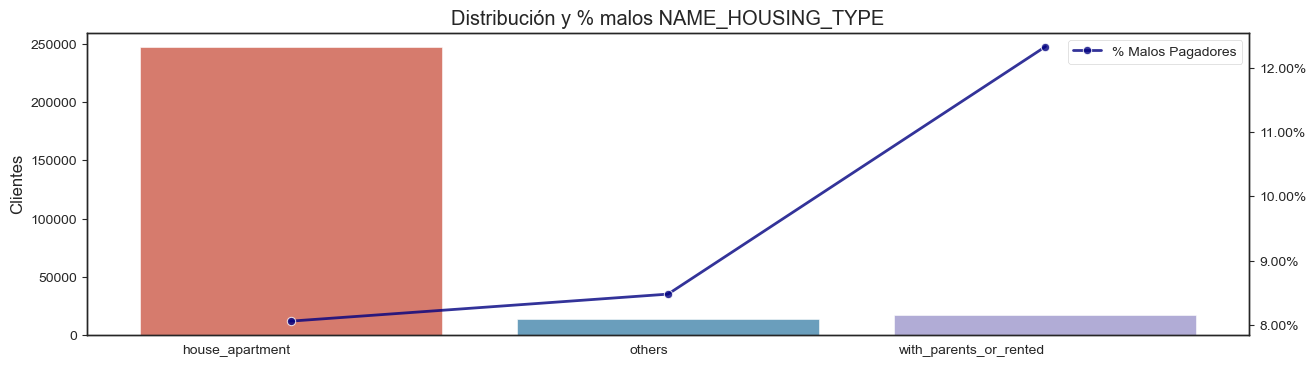

In [149]:
# Atributo NAME_HOUSING_TYPE con TARGET
hlp.grafico_bivariado_cat(df_train, 'NAME_HOUSING_TYPE','TARGET', (15,4), 0);

- Los clientes que no arriendan tienen mejor comportamiento de pago.

### Gráfico de atributo con target :

* `ORGANIZATION_TYPE` : Tipo de organización donde trabaja el cliente.

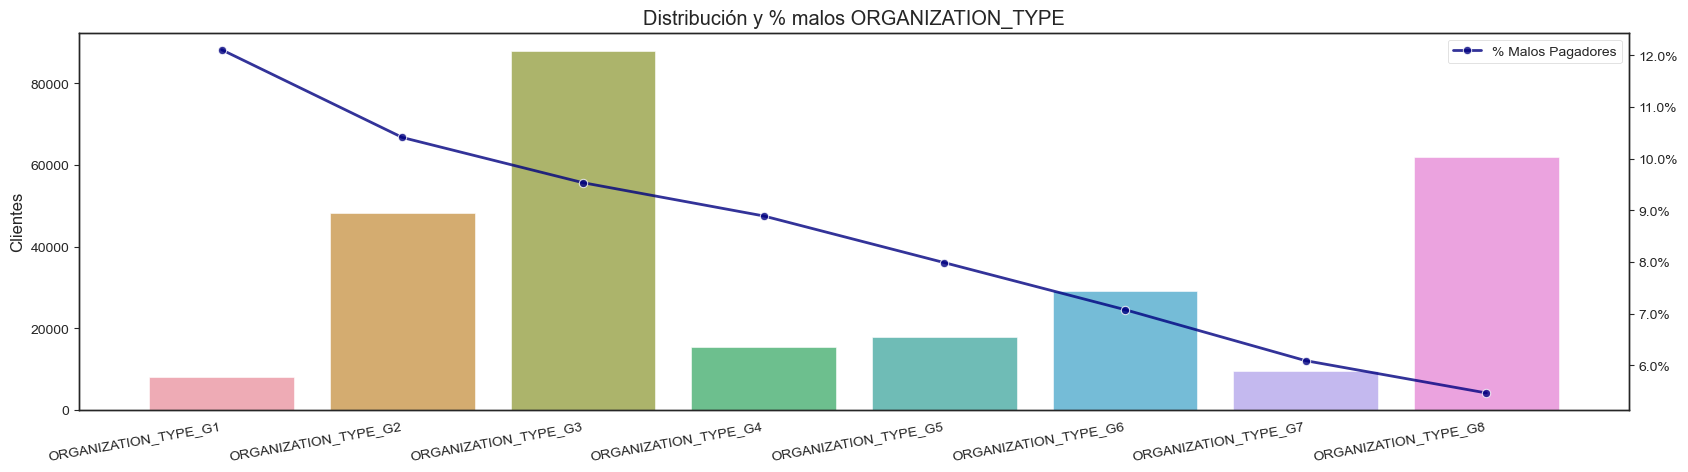

In [150]:
# Atributo ORGANIZATION_TYPE con TARGET
hlp.grafico_bivariado_cat(df_train, 'ORGANIZATION_TYPE','TARGET',(20,5), 10 );

- Los clientes que trabajan en empresas del rubro Construction, Realtor, Restaurant tiene la mayor tasa de malos (Organización tipo G1) a diferencia de los que trabajan en Bank, Culture, Military, Police, Security, Ministries, University (Organización tipo G8), aunque existe un porcentaje de malos pagadores que trabaja en Business, Entity, Trade (Organización tipo G3)

### Gráfico de atributo con target :

* `OCCUPATION_TYPE` : Cuál es la profesión del cliente.

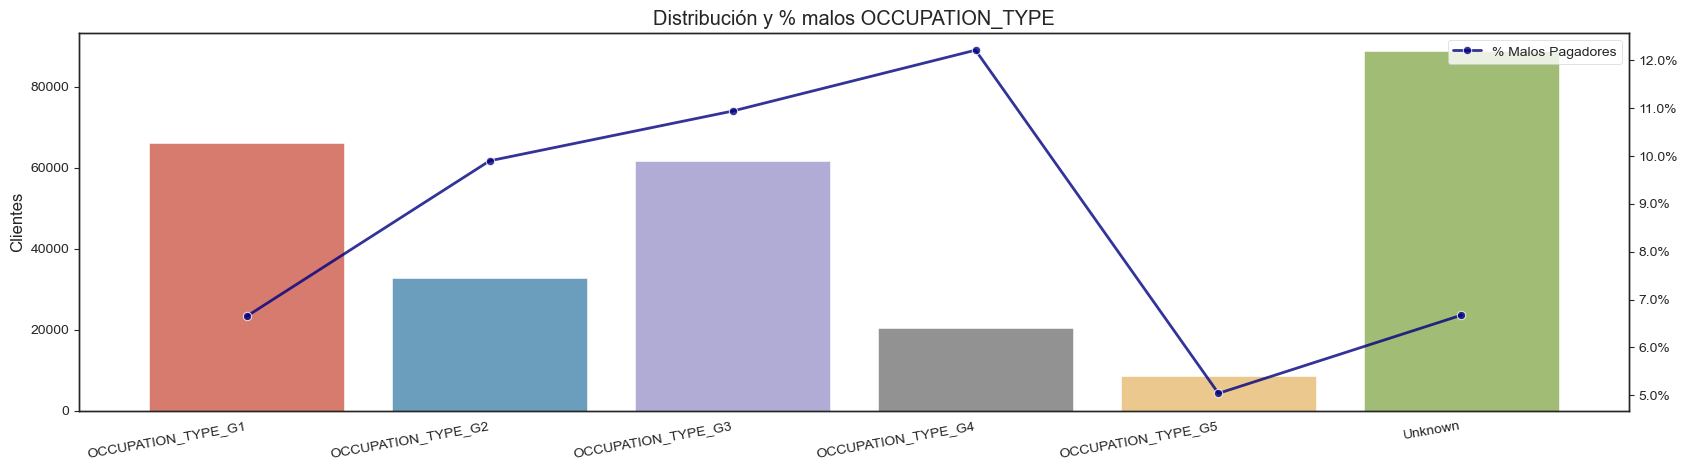

In [151]:
# Grafico OCCUPATION_TYPE con TARGET
hlp.grafico_bivariado_cat(df_train, 'OCCUPATION_TYPE','TARGET',(20,5), 10);

- Los clientes que realizan profesiones como Drivers, Low-skill Laborers, Waiters/barmen staff tienden a ser malos pagadores y los contadores son buenos pagadores.

### 2.12.2 Eliminación de atributos de análisis bivariado

In [152]:
# Seleccion de columnas a Eliminar del analisis bivariado
#==================================================================================================
columns_biv_drop = ['FLAG_OWN_REALTY', 'REGION_RATING_CLIENT_W_CITY', 'TARGET_']

In [153]:
# Eliminacion de Atributos del analisis bivariado
#==================================================================================================
df_train = df_train.drop(columns = columns_biv_drop)

In [154]:
# Dimensión de la data posterior a la eliminación de atributos
df_train.shape

(278232, 30)

In [155]:
df_train.head()

TARGET CODE_GENDER FLAG_OWN_CAR  CNT_CHILDREN NAME_INCOME_TYPE  \
0       1           M            N             0          working   
1       0           F            N             0       government   
3       0           F            N             0          working   
4       0           M            N             0          working   
5       0           M            N             0       government   

  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE  FLAG_WORK_PHONE  \
0           secondary        not_married   house_apartment                0   
1          university            married   house_apartment                0   
3           secondary            married   house_apartment                0   
4           secondary        not_married   house_apartment                0   
5           secondary            married   house_apartment                1   

   FLAG_PHONE     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1  OCCUPATION_TYPE_G3              1.0                     2   
1           1  OCCUPATION_TYPE_G1              2.0                     1   
3           0  OCCUPATION_TYPE_G3              2.0                     2   
4           0  OCCUPATION_TYPE_G1              1.0                     2   
5           1  OCCUPATION_TYPE_G3              2.0                     2   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   

      ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  DEF_30_CNT_SOCIAL_CIRCLE  \
0  ORGANIZATION_TYPE_G3      0.262949      0.139376                       2.0   
1  ORGANIZATION_TYPE_G7      0.622246      0.537070                       0.0   
3  ORGANIZATION_TYPE_G3      0.650442      0.537070                       0.0   
4  ORGANIZATION_TYPE_G7      0.322738      0.537070                       0.0   
5  ORGANIZATION_TYPE_G5      0.354225      0.621226                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_MON  \
0                       2.0                        0.0   
1                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   
5                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR        AGE  LOG_AMT_INCOME_TOTAL  \
0                         1.0  25.920548             12.218495   
1                         0.0  45.931507             12.506177   
3                         0.0  52.068493             11.813030   
4                         0.0  54.608219             11.707670   
5                         1.0  46.413699             11.502875   

   LOG_AMT_CREDIT  WITH_DAYS_WORKED  LOG_DAYS_REGISTRATION  \
0       12.915579                 1               8.201934   
1       14.072864                 1               7.078342   
3       12.652944                 1               9.193499   
4       13.148031                 1               8.368925   
5       13.103171                 1               8.511175   

   LOG_DAYS_ID_PUBLISH  PHONE_CHANGE  
0             7.659171             1  
1             5.673323             1  
3             7.798523             1  
4             8.148446             1  
5             6.167517             1

# 3. Feature engineering

In [156]:
# Cantidad de niveles por Variables categroicas
hlp.variables_categoricas(df_train)

F    182800
M     95432
Name: CODE_GENDER, dtype: int64


N    183775
Y     94457
Name: FLAG_OWN_CAR, dtype: int64


working       142719
commercial     63652
others         52025
government     19836
Name: NAME_INCOME_TYPE, dtype: int64


secondary     209157
university     65467
school          3608
Name: NAME_EDUCATION_TYPE, dtype: int64


married        205692
not_married     72540
Name: NAME_FAMILY_STATUS, dtype: int64


house_apartment           247389
with_parents_or_rented     17271
others                     13572
Name: NAME_HOUSING_TYPE, dtype: int64


Unknown               88800
OCCUPATION_TYPE_G1    65962
OCCUPATION_TYPE_G3    61746
OCCUPATION_TYPE_G2    32769
OCCUPATION_TYPE_G4    20348
OCCUPATION_TYPE_G5     8607
Name: OCCUPATION_TYPE, dtype: int64


ORGANIZATION_TYPE_G3    88023
ORGANIZATION_TYPE_G8    61851
ORGANIZATION_TYPE_G2    48189
ORGANIZATION_TYPE_G6    29131
ORGANIZATION_TYPE_G5    17988
ORGANIZATION_TYPE_G4    15485
ORGANIZATION_TYPE_G7     9538
ORGANIZATION_TY

## 3.1 Preprocesado de los datos

In [157]:
df_train2=df_train.copy()

In [158]:
df_train = hlp.preprocess_data(df_train)

In [159]:
df_train.to_csv('data_train_bin.csv',index=False)

## 3.2 Lectura de archivo binarizado

In [160]:
#df_train = pd.read_csv("data_train_bin.csv")

In [161]:
# Dimension despues del preprocesado de variables categoricas binarizadas
print("n filas:", df_train.shape[0],"\nn columnas:",df_train.shape[1])

n filas: 278232 
n columnas: 44


In [162]:
# Visualiacion primeros registros
df_train.head()

TARGET  CNT_CHILDREN  FLAG_WORK_PHONE  FLAG_PHONE  CNT_FAM_MEMBERS  \
0       1             0                0           1              1.0   
1       0             0                0           1              2.0   
3       0             0                0           0              2.0   
4       0             0                0           0              1.0   
5       0             0                1           1              2.0   

   REGION_RATING_CLIENT  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                     2                       0                       0   
1                     1                       0                       0   
3                     2                       0                       0   
4                     2                       0                       1   
5                     2                       0                       0   

   LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  \
0                        0      0.262949      0.139376   
1                        0      0.622246      0.537070   
3                        0      0.650442      0.537070   
4                        1      0.322738      0.537070   
5                        0      0.354225      0.621226   

   DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   
5                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_YEAR        AGE  \
0                        0.0                         1.0  25.920548   
1                        0.0                         0.0  45.931507   
3                        0.0                         0.0  52.068493   
4                        0.0                         0.0  54.608219   
5                        0.0                         1.0  46.413699   

   LOG_AMT_INCOME_TOTAL  LOG_AMT_CREDIT  WITH_DAYS_WORKED  \
0             12.218495       12.915579                 1   
1             12.506177       14.072864                 1   
3             11.813030       12.652944                 1   
4             11.707670       13.148031                 1   
5             11.502875       13.103171                 1   

   LOG_DAYS_REGISTRATION  LOG_DAYS_ID_PUBLISH  PHONE_CHANGE  CODE_GENDER_M  \
0               8.201934             7.659171             1              1   
1               7.078342             5.673323             1              0   
3               9.193499             7.798523             1              0   
4               8.368925             8.148446             1              1   
5               8.511175             6.167517             1              1   

   FLAG_OWN_CAR_Y  NAME_INCOME_TYPE_commercial  NAME_INCOME_TYPE_government  \
0               0                            0                            0   
1               0                            0                            1   
3               0                            0                            0   
4               0                            0                            0   
5               0                            0                            1   

   NAME_INCOME_TYPE_others  NAME_EDUCATION_TYPE_school  \
0                        0                           0   
1                        0                           0   
3                        0                           0   
4                        0                           0   
5                        0                           0   

   NAME_EDUCATION_TYPE_university  NAME_FAMILY_STATUS_not_married  \
0                               0                               1   
1                               1                               0   
3                               0                               0   
4                               0                         

# 4. Pre Modelamiento

Previo a la realización de los modelos se realiza un estandarización de los datos, se divide la base en entrenamiento y validación (70% y 30%), y luego se considera realizar un balanceo de los datos de entrenamiento, debido a que la clase objetivo se encuentra desbalanceada, donde un 8.3% de los registros tienen marca de `TARGET` = 1. 

Para balancear la clase se consideran distinas metodologias, optando finalmente por realizar un submuestreo, es decir, seleccionar aleatoriamente registros de la clase 0, para que la base se encuentre mejor distribuida

In [163]:
# División Train Test Split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['TARGET'], axis=1), df_train['TARGET'],  test_size=0.3, random_state=98765)

# Estandarizacion
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# UnderSumpling
undersampler = RandomUnderSampler(random_state=42,sampling_strategy='not minority')
X_train_ss, y_train_ss = undersampler.fit_resample(X_train_std,y_train)

# para resumen
metodos = ['Original','Balanceada (Subsampling)']
lista_X_train = [X_train_std,X_train_ss]
lista_y_train = [y_train,y_train_ss]

print("Resumen Bases consideradas:")

hlp.tabla_comp_train(metodos,lista_X_train,lista_y_train)

Resumen Bases consideradas:


n_registros  n_target_1  % target 1
Base                                                         
Original                       194762       16289        8.36
Balanceada (Subsampling)        32578       16289       50.00

- Una vez generadas las bases de entrenamiento se obtiene una base con 194.762 registros, correspondiente al 70% de la data original, la cual mantiene la distribución de target de la data original, y una base balanceada, con 32.578 registros, con la distribución de target balanceada (50% clase 0 y 50% clase 1). 

# 5. Modelamiento

- Dado el vector objetivo, se considerán distintos tipos de modelos de clasificación. Como primera alternativa se realiza un modelo de `Regresión logística`, por ser un modelo que se utiliza en la industria crediticia al tener una mayor facilidad de interpretación. Además, se realizarán pruebas con otras metodologías para evaluar si existen otros modelos con mejor capacidad de predicción. Dentro de los modelos a considerar se encuentran: `Modelos aditivos generalizados GAM`, `Random Forest` y `Gradient Boosting`. 

- Dentro de los indicadores a utilizar para comparar los modelos se encuentran: precision, recall, f1-score, accuracy (generados a través de un reporte de clasificación), AUC (curva ROC), y adicionalmente los indicadores KS y GINI los cuales son indicadores que se utilizan en la industria para medir capacidad predictiva de modelos de créditos. 

## 5.1 Modelo Regresión Logística

Como primera aproximación se realiza un modelo de regresión logística. Se aplica este modelo con y sin hiperparámetros a las base original (estandarizada) y a la respectiva base balanceada. Se realiza esto para validar el uso de la muestra balanceada.

### 5.1.1 Modelo base estandarizada:

In [164]:
# Modelo Regresion Logistica estandarizada
model_reg_log = LogisticRegression(class_weight='balanced',penalty='l1',solver='saga', random_state=1).fit(X_train_std, y_train)

# Predicciones
y_pred_reg_log = model_reg_log.predict(X_test_std) 
y_pred_reg_log_prob = model_reg_log.predict_proba(X_test_std)[:,1]

print(classification_report(y_test, y_pred_reg_log))

print("AUC : {} %".format(round(roc_auc_score(y_test, y_pred_reg_log_prob),4)*100))
print("KS  :", round(ks_2samp(y_pred_reg_log_prob[y_test==1], y_pred_reg_log_prob[y_test!=1]).statistic,5)*100," %")
print("GINI:", round((roc_auc_score(y_test, y_pred_reg_log_prob)-0.5)*2,5)*100,"%")

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     76538
           1       0.16      0.66      0.26      6932

    accuracy                           0.68     83470
   macro avg       0.56      0.67      0.53     83470
weighted avg       0.89      0.68      0.75     83470

AUC : 73.04 %
KS  : 34.648  %
GINI: 46.087 %


### 5.1.2 Modelo base estandarizada balanceada:


In [165]:
# Modelo Regresion Logistica sin hiperparametros
model_reg_log_ss = LogisticRegression(penalty='l1',solver='saga', random_state=1).fit(X_train_ss, y_train_ss)

print('Indicadores datos entrenamiento: \n')
hlp.resumen_modelo(model_reg_log_ss,X_train_ss, y_train_ss)

Indicadores datos entrenamiento: 

Reporte Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     16289
           1       0.68      0.66      0.67     16289

    accuracy                           0.67     32578
   macro avg       0.67      0.67      0.67     32578
weighted avg       0.67      0.67      0.67     32578

Indicadores:
auc :  73.647 %
ks  :  35.153 %
gini:  47.293 %


In [166]:
print('Indicadores datos validación: \n')
hlp.resumen_modelo(model_reg_log_ss,X_test_std, y_test)

Indicadores datos validación: 

Reporte Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     76538
           1       0.16      0.66      0.26      6932

    accuracy                           0.68     83470
   macro avg       0.56      0.67      0.53     83470
weighted avg       0.89      0.68      0.75     83470

Indicadores:
auc :  73.019 %
ks  :  34.677 %
gini:  46.037 %


- De los resultados anteriores se puede apreciar que a pesar de que los indicadores globales no aumentan de forma considerable (como el AUC), el utilizar una base balanceada mejora la capacidad de predicción de la clase 1, lo cual se refleja en el recall y f1-score.

- Con esto, se puede se puede apreciar una primera aproximación de las características que impactan en el comportamiento de pago:

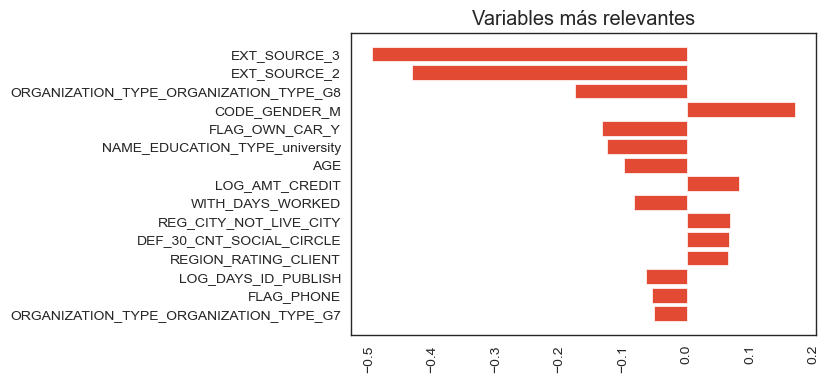

In [167]:
df_importancias = hlp.feature_importance_reg_log(model_reg_log_ss,df_train)
df_importancias = df_importancias.reset_index()
df_importancias_15 = df_importancias.loc[:14,]
df_importancias_15 = df_importancias_15.sort_values(by='Importancia_abs')
plt.barh(df_importancias_15['Variable'],df_importancias_15['Importancia'])
plt.xticks(rotation = 90);
plt.title("Variables más relevantes");

- En el gráfico anterior, donde se muestran los 15 atributos más relevantes, se puede ver que las variables con más relevancia son las `EXT_SOURCE_3` y`EXT_SOURCE_2` (puntajes de fuente externa), la cual influye negativamente en la predicción de un mal pagador (un mejor puntaje indicaria que es más probable que sea bueno). Asi también, se observa que variables como si posee auto (`FLAG_OWN_CAR_Y`), la edad (`AGE`), o si tiene educación universitaria impactan postivamente en que sea un buen pagador, mientras que el género (si es masculino), si la dirección permanente no concuerda con concuerda con la dirección de contacto (`REG_CITY_NOT_LIVE_CITY`), si ha tenido mora mayor a 30 (`DEF_30_CNT_SOCIAL_CIRCLE`), influyen en predecir al cliente como un probable mal pagador.<br><br>

- Con estos resultados se puede obtiene una primera aproximación de los perfiles de los clientes. Con esto se prueban distintos modelos, los cuales se muestran a continuación. En cada modelo se presenta los resultados obtenidos mostrando los indicadores mencionados. A partir de estos resultados se selecciona el mejor modelo, para el cual posteriormente se realiza una busqueda de hiperparámetros. 

## 5.2 Modelo Aditivo Generalizado

In [168]:
%%time
# Desde aca solo se aplica con bases balanceadas
# Modelo GAM 

model_gam = LogisticGAM().fit(X_train_ss, y_train_ss)
# Resultado
hlp.resumen_modelo(model_gam,X_test_std,y_test,gam=True)

pickle.dump(model_gam, open('respaldo_resultados/modelo_02_gam', 'wb'))

Reporte Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     76538
           1       0.16      0.67      0.26      6932

    accuracy                           0.68     83470
   macro avg       0.56      0.68      0.53     83470
weighted avg       0.89      0.68      0.75     83470

Indicadores:
auc :  73.555 %
ks  :  35.594 %
gini:  47.111 %
Wall time: 1min 15s


## 5.3 Modelo Random Forest

In [169]:
%%time
# Desde aca solo se aplica con bases balanceadas
# Random Forest
model_random_forest = RandomForestClassifier(class_weight='balanced',n_jobs=-1, random_state=1).fit(X_train_ss, y_train_ss)
# Resultado
hlp.resumen_modelo(model_random_forest,X_test_std,y_test)

Reporte Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     76538
           1       0.16      0.65      0.25      6932

    accuracy                           0.68     83470
   macro avg       0.56      0.67      0.52     83470
weighted avg       0.89      0.68      0.75     83470

Indicadores:
auc :  72.133 %
ks  :  33.364 %
gini:  44.267 %
Wall time: 6.88 s


## 5.4 GradientBoosting

In [170]:
%%time
# Desde aca solo se aplica con bases balanceadas
# GradientBoosting
#model_gradient_boosting = GradientBoostingClassifier().fit(X_train_ss, y_train_ss)
model_gradient_boosting = GradientBoostingClassifier(criterion='mse',learning_rate=0.01,n_estimators=2000,subsample=0.5,random_state=1).fit(X_train_ss, y_train_ss)


Wall time: 2min 39s


In [171]:
print("Indicadores data validación: \n")
hlp.resumen_modelo(model_gradient_boosting,X_test_std,y_test)

Indicadores data validación: 

Reporte Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     76538
           1       0.16      0.67      0.26      6932

    accuracy                           0.68     83470
   macro avg       0.56      0.68      0.53     83470
weighted avg       0.89      0.68      0.75     83470

Indicadores:
auc :  73.826 %
ks  :  35.923 %
gini:  47.652 %


```python
# Serializacion
write_predict_gb =  pickle.dump(model_gradient_boosting, open('gradient_boosting_predict.sav','wb'))
```

## 5.5 AdaBoost

In [172]:
%%time
# Desde aca solo se aplica con bases balanceadas
# AdaBoostClassifier
model_AdaBoostClassifier = AdaBoostClassifier(random_state=1).fit(X_train_ss, y_train_ss)
# Resultado
hlp.resumen_modelo(model_AdaBoostClassifier,X_test_std,y_test)

Reporte Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     76538
           1       0.16      0.66      0.25      6932

    accuracy                           0.68     83470
   macro avg       0.56      0.67      0.52     83470
weighted avg       0.89      0.68      0.75     83470

Indicadores:
auc :  72.767 %
ks  :  33.869 %
gini:  45.533 %
Wall time: 6.77 s


## 5.6 LinearDiscriminantAnalysis

In [173]:
%%time
# Desde aca solo se aplica con bases balanceadas
# LinearDiscriminantAnalysis
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LinearDiscriminantAnalysis = LinearDiscriminantAnalysis().fit(X_train_ss, y_train_ss)
# Resultado
hlp.resumen_modelo(model_LinearDiscriminantAnalysis,X_test_std,y_test)

Reporte Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     76538
           1       0.16      0.66      0.26      6932

    accuracy                           0.68     83470
   macro avg       0.56      0.67      0.53     83470
weighted avg       0.89      0.68      0.75     83470

Indicadores:
auc :  73.012 %
ks  :  34.672 %
gini:  46.025 %
Wall time: 530 ms


## 5.7 Selección de Modelo

Para selección se comparan indicadores de los modelos tanto en data de entrenamiento como en validación:

In [174]:
# Resumen indicadores de todos los modelos data de entrenamiento
#===============================================================
# listar nombres de los modelos y modelos respectivos
# modelo GAM se tiene que llamar así para que se ejecute correctamente la función
print("Indicadores Modelos data entrenamiento:")

modelos_nombres = ['Gradient Boosting','GAM','Regresion Logística','Random Forest','AdaBoostClassifier','LinearDiscriminantAnalysis']
modelos = [model_gradient_boosting,model_gam,model_reg_log_ss,model_random_forest,model_AdaBoostClassifier,model_LinearDiscriminantAnalysis]
df_kpi = hlp.resumen_compara_modelos_df(modelos_nombres,modelos,X_train_ss, y_train_ss).sort_values(by='KS',ascending=False)
df_kpi

Indicadores Modelos data entrenamiento:


accuracy  precision  recall  f1-score     AUC  \
Modelo                                                                      
Random Forest                   1.00       1.00    1.00      1.00  1.0000   
Gradient Boosting               0.70       0.70    0.69      0.69  0.7679   
GAM                             0.68       0.69    0.67      0.68  0.7444   
AdaBoostClassifier              0.68       0.68    0.66      0.67  0.7403   
LinearDiscriminantAnalysis      0.67       0.68    0.66      0.67  0.7364   
Regresion Logística             0.67       0.68    0.66      0.67  0.7365   

                                KS    GINI  
Modelo                                      
Random Forest               1.0000  1.0000  
Gradient Boosting           0.3930  0.5357  
GAM                         0.3646  0.4888  
AdaBoostClassifier          0.3550  0.4805  
LinearDiscriminantAnalysis  0.3523  0.4729  
Regresion Logística         0.3515  0.4729

In [175]:
# Resumen indicadores de todos los modelos data de validación
#============================================================
print("Indicadores Modelos data validación:")
# listar nombres de los modelos y modelos respectivos
# modelo GAM se tiene que llamar así para que se ejecute correctamente la función
modelos_nombres = ['Gradient Boosting','GAM','Regresion Logística','Random Forest','AdaBoostClassifier','LinearDiscriminantAnalysis']
modelos = [model_gradient_boosting,model_gam,model_reg_log_ss,model_random_forest,model_AdaBoostClassifier,model_LinearDiscriminantAnalysis]
df_kpi = hlp.resumen_compara_modelos_df(modelos_nombres,modelos,X_test_std,y_test).sort_values(by='KS',ascending=False)
df_kpi

Indicadores Modelos data validación:


accuracy  precision  recall  f1-score     AUC  \
Modelo                                                                      
Gradient Boosting               0.68       0.16    0.67      0.26  0.7383   
GAM                             0.68       0.16    0.67      0.26  0.7356   
Regresion Logística             0.68       0.16    0.66      0.26  0.7302   
LinearDiscriminantAnalysis      0.68       0.16    0.66      0.26  0.7301   
AdaBoostClassifier              0.68       0.16    0.66      0.25  0.7277   
Random Forest                   0.68       0.16    0.65      0.25  0.7213   

                                KS    GINI  
Modelo                                      
Gradient Boosting           0.3592  0.4765  
GAM                         0.3559  0.4711  
Regresion Logística         0.3468  0.4604  
LinearDiscriminantAnalysis  0.3467  0.4602  
AdaBoostClassifier          0.3387  0.4553  
Random Forest               0.3336  0.4427

* Se puede apreciar que con `Random Forest` se obtiene un modelo sobreajustado, perdiendo su capacidad predictiva al aplicarse en la data de validación. Modelos como `AdaBoostClassifier` y `LinearDiscriminantAnalysis` si bien tienen mejores indicadores que la `Regresión Logística` en la data de entrenamiento, al aplicarse a la data de validación tienen indicadores más leves que este último. <br><br>

* Al comparar las métricas de los diferentes modelos estudiados, se obtiene que el modelo que posee el mayor poder predictivo es el algoritmo de `Gradient Boosting`. Sin embargo, los otros modelos estudiados presentan indicadores similares, por lo tanto, se sugiere trabajar con alguno de los modelos que sean superiores en métricas de desempeño de poder predictivo respecto a la `Regresión Logistica` o esta misma en su defecto. <br><br>

* Dado lo anterior, se propone evaluar e implementar el modelo **Gradient Boosting**, el cual obtuvo las mejores métricas de clasificación KS y AUC, indicando así un muy buen poder de clasificación para la evaluación de créditos.

### 5.7.1 Matriz de confusión de modelo seleccionado

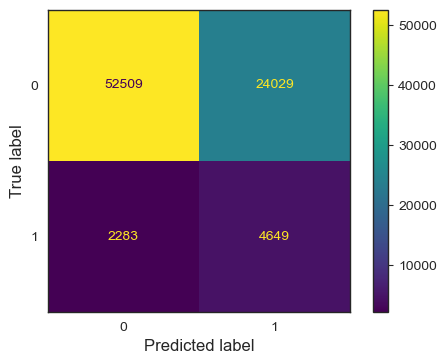

In [176]:
ConfusionMatrixDisplay.from_estimator(model_gradient_boosting, X_test_std, y_test)
plt.show()

- A partir de los datos de testeo, se puede observar que el mejor modelo captura una gran cantidad de clientes que son malos pagadores (4.649 créditos) lo cual se asocia a un recall de un 0.67.<br><br>

- Por otra parte, el modelo carece de buena precisión ya que un gran volumen de créditos buenos, son predichos como malos pagadores (24.029), asociado a un indicador de precision de 0.16.<br><br>

- No obstante, dada la naturaleza del problema que estamos enfrentando se le dará una mayor importancia al indicador de recall, como así también la metrica KS, la cual nos muestra un muy buen poder predictivo con un 35,98%.

In [177]:
#Serialización mejor modelo
pickle.dump(model_gradient_boosting, open('modelo_gradient_boosting.pkl','wb'))

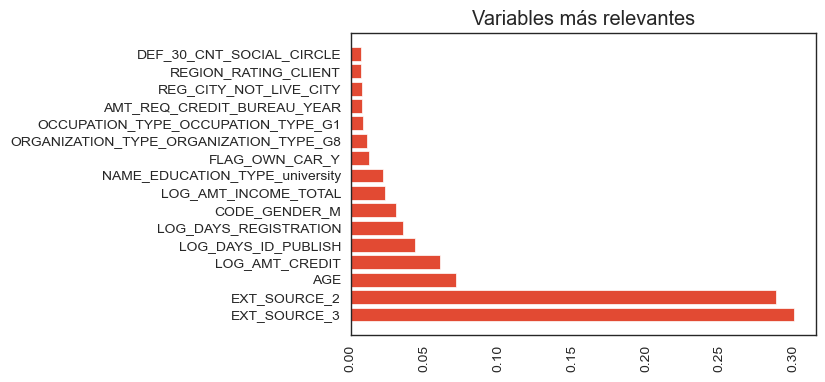

In [178]:
#Grafico features GRADIENT BOOSTING
df = hlp.feature_importance(model_gradient_boosting,df_train)
df_importancias = hlp.feature_importance(model_gradient_boosting,df_train)
df_importancias = df_importancias.reset_index()
df_importancias_15 = df_importancias.loc[:15,]
plt.barh(df_importancias_15['Variable'],df_importancias_15['Importancia'])
plt.xticks(rotation = 90);
plt.title("Variables más relevantes");

- Es importante destacar que las variables `EXT_SOURCE_3` y `EXT_SOURCE_2` son aquellas que presentan el mayor impacto en el poder predictivo del modelo, así también se pueden destacar otras como: `AGE`, `LOG_AMT_CREDIT` y `LOG_DAYS_ID_PUBLISH`.

## 6. Análisis Punto de Corte

- A continuación se determinarán las probabilidades de corte, para así poder generar zonas de aprobación, rechazo y evaluación exhaustiva.


- A partir de las probabilidades obtenidas de aplicar el modelo en la data de test, se realiza una tramificación de las probabilidades en 20 cortes, para analizar como la predicción discrimina entre buenos y malos pagadores, visto como la diferencia entre el porcentaje acumulado de buenos pagadores y el % acumulado de malos pagadores.  Donde se aprecia que el porcentaje de malos pagadores se concentran en las probabilidades mayores. 

In [179]:
modelo_seleccionado = pickle.load(open( "gradient_boosting_predict.sav" , "rb" ))

from statistics import quantiles 

y_predict_proba=modelo_seleccionado.predict_proba(X_test_std)[:,1] # prob de 0 
y_predict=modelo_seleccionado.predict(X_test_std)

df_prob = pd.DataFrame({'y':list(y_test), 'y_predict': list(y_predict),'prob': list(y_predict_proba)})
quantiles = quantiles(df_prob['prob'], n = 20)

bins = [0]
for i in quantiles:
    bins.append(round(i,2))
bins.append(1)

df_prob['malo'] = df_prob['y']
df_prob['bueno'] = 1- df_prob['y']
df_prob['tramo_prob'] = pd.cut(df_prob['prob'],bins)

df_prob = df_prob.groupby('tramo_prob').agg({'y':['count'],'bueno':['sum'],'malo':['sum']}).reset_index()
df_prob.columns = ['tramo_prob','n','n_buenos','n_malos']
df_prob = df_prob.sort_values(by = 'tramo_prob', ascending = False)

df_prob['tasa_malos'] = round(df_prob['n_malos']/(df_prob['n'])*100,2)

#
df_prob['porc_buenos'] = round(df_prob['n_buenos']/df_prob['n_buenos'].sum()*100,2)
df_prob['porc_malos'] = round(df_prob['n_malos']/df_prob['n_malos'].sum()*100,2)

#
df_prob['n_buenos_acum'] = df_prob['n_buenos'].cumsum()
df_prob['n_malos_acum'] = df_prob['n_malos'].cumsum()

#
df_prob['porc_buenos_acum'] = round(df_prob['n_buenos_acum']/df_prob['n_buenos'].sum()*100,2)
df_prob['porc_malos_acum'] = round(df_prob['n_malos_acum']/df_prob['n_malos'].sum()*100,2)

df_prob['dif_porc_acum'] = abs(df_prob['porc_malos_acum']-df_prob['porc_buenos_acum'])

df_prob['tramo_prob'] = df_prob['tramo_prob'].astype('str')

ks = df_prob['dif_porc_acum'].max()
punto_ks = list(df_prob[df_prob['dif_porc_acum']==ks]['tramo_prob'].unique())[0]

- Para realizar un análisis de impacto económico respecto a las solicitudes de crédito es necesario determinar los beneficios y/o pérdida de determinar uno u otro criterio de aceptación o rechazo en la evaluación.   
   
   
- La proporción de ganancia y pérdida de un crédito respecto al monto otorgado es de:   
15% para los crédito buenos   
135% para los créditos malos   

In [180]:
df_original=pd.read_csv('data/training_new_credits.csv')
df_original = df_original[df_original['NAME_CONTRACT_TYPE']== 'Cash loans']

df_saldo_prom=df_original.groupby(by='TARGET').agg({'AMT_CREDIT' : ['mean']})
ganancia_bueno=round(float(df_saldo_prom.loc[0].round()*0.15))
print(f'La ganancia de un crédito bueno es: {ganancia_bueno}')
perdida_malo=round(float(df_saldo_prom.loc[1].round()*1.35))
print(f'La pérdida de un crédito malo es: {perdida_malo}')

La ganancia de un crédito bueno es: 94869
La pérdida de un crédito malo es: 781109


La utilidad o pérdida de otorgar un crédito es calculado de la siguiente manera:

In [181]:
df_prob['utilidad_perdida_u'] = round((df_prob['n_buenos']*ganancia_bueno-df_prob['n_malos']*perdida_malo)/df_prob['n'],0)

df_prob_2 = df_prob.drop(columns=['porc_buenos','porc_malos','n_buenos_acum','n_malos_acum'])
df_prob_2 = df_prob_2.set_index('tramo_prob')

In [182]:
df_prob_2

n  n_buenos  n_malos  tasa_malos  porc_buenos_acum  \
tramo_prob                                                            
(0.78, 1.0]   4038      2790     1248       30.91              3.65   
(0.71, 0.78]  4502      3618      884       19.64              8.37   
(0.66, 0.71]  4004      3391      613       15.31             12.80   
(0.61, 0.66]  4469      3853      616       13.78             17.84   
(0.57, 0.61]  3950      3482      468       11.85             22.39   
(0.53, 0.57]  4273      3786      487       11.40             27.33   
(0.5, 0.53]   3442      3109      333        9.67             31.39   
(0.46, 0.5]   4935      4537      398        8.06             37.32   
(0.43, 0.46]  3918      3644      274        6.99             42.08   
(0.4, 0.43]   4202      3953      249        5.93             47.25   
(0.37, 0.4]   4520      4251      269        5.95             52.80   
(0.35, 0.37]  3204      3065      139        4.34             56.81   
(0.32, 0.35]  4914      4718      196        3.99             62.97   
(0.3, 0.32]   3376      3238      138        4.09             67.20   
(0.27, 0.3]   5057      4870      187        3.70             73.56   
(0.25, 0.27]  3360      3255      105        3.12             77.82   
(0.22, 0.25]  4714      4600      114        2.42             83.83   
(0.19, 0.22]  4254      4172       82        1.93             89.28   
(0.15, 0.19]  4494      4420       74        1.65             95.05   
(0.0, 0.15]   3844      3786       58        1.51            100.00   

              porc_malos_acum  dif_porc_acum  utilidad_perdida_u  
tramo_prob                                                        
(0.78, 1.0]             18.00          14.35           -175864.0  
(0.71, 0.78]            30.76          22.39            -77136.0  
(0.66, 0.71]            39.60          26.80            -39241.0  
(0.61, 0.66]            48.49          30.65            -25874.0  
(0.57, 0.61]            55.24          32.85             -8918.0  
(0.53, 0.57]            62.26          34.93             -4967.0  
(0.5, 0.53]             67.07          35.68             10122.0  
(0.46, 0.5]             72.81          35.49             24223.0  
(0.43, 0.46]            76.76          34.68             33609.0  
(0.4, 0.43]             80.35          33.10             42961.0  
(0.37, 0.4]             84.23          31.43             42737.0  
(0.35, 0.37]            86.24          29.43             56866.0  
(0.32, 0.35]            89.07          26.10             59930.0  
(0.3, 0.32]             91.06          23.86             59062.0  
(0.27, 0.3]             93.75          20.19             62477.0  
(0.25, 0.27]            95.27          17.45             67495.0  
(0.22, 0.25]            96.91          13.08             73685.0  
(0.19, 0.22]            98.10           8.82             77984.0  
(0.15, 0.19]            99.16           4.11             80445.0  
(0.0, 0.15]            100.00           0.00             81652.0

- A partir de la tabla anterior se puede observar que para aquellas evaluación que presenten una probabilidad de incumplir el pago entre un 0 y un 53% está asociado a obtener un monto de beneficio economico, en cambio si la probabilidad es mayor a un 53%, se podrían obtener pérdidas al aprobar dichos créditos. <br><br>

- También se puede observar que en el intervalo (0.5 - 0.53] se obtiene un beneficio pequeño en comparación con intervalos que presentan menor probabilidad de incumplir pago, dado esto podría ser discutible el resultado de este tramo (rechazo de crédito) debido a los volumenes de casos malos y buenos. así también, el tramo (0.53 - 0.57] presenta pérdida en un monto bajo en relación a otros tramos que también presentan pérdida, por lo tanto, en esta zona se podría considerar evaluar en forma mas detallada el crédito, para así poder tener una inspección experta que permita una clasificación de estos créditos. <br><br>

- Por lo tanto, se propone definir una zona intermedida de evaluación manual por parte de algún ejecutivo, para aquellos casos que presenten una probabilidad entre (0.5 y 0.57], para considerar la aprobación del crédito. <br><br> 

- A partir de la probabilidad de evaluación, se proponen **3 zonas**:   
   
Tramo Prob. | Descripción
---|---
**(0 - 0.5]**    | Zona de aprobación de evaluación de crédito   
**(0.5 - 0.57]** | Zona de evaluación manual de créditos   
**(0.57 - 1]**   | Zona de rechazo de crédito   

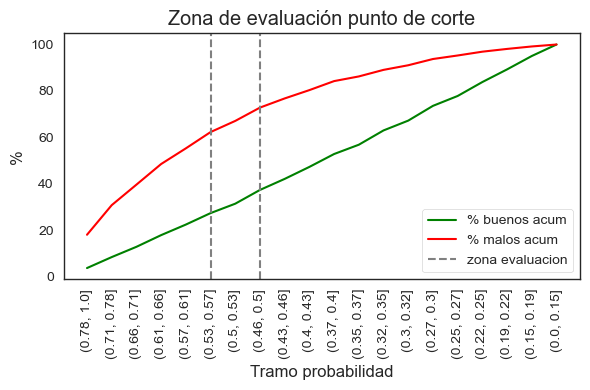

In [183]:
sns.lineplot(x = 'tramo_prob', y = 'porc_buenos_acum', data = df_prob, label='% buenos acum',color='green');
sns.lineplot(x = 'tramo_prob', y = 'porc_malos_acum', data = df_prob,label ='% malos acum',color='red');
plt.title('Zona de evaluación punto de corte')
plt.axvline('(0.46, 0.5]', color = 'grey', linestyle = '--', label = 'zona evaluacion')
plt.axvline('(0.53, 0.57]', color = 'grey', linestyle = '--' )
plt.ylabel('%')
plt.xlabel('Tramo probabilidad')
plt.legend()
plt.xticks(rotation = 90);
plt.tight_layout()
plt.show()

- En el gráfico anterior se pueden observar las 3 zonas descritas, en donde a partir de la probabilidad 0.57 se capturan una mayor cantidad de créditos que podrían ser entregados a clientes con un mal comportamiento de pago.

## 7. Implementación

Una vez definido el modelo, se importa el set de datos disponible para aplicarlo, junto al modelo serializado. Luego se realizan los ajustes necesarios para disponer de las variables necesarias que permitan aplicar el modelo en estos datos. Estos ajustes se realizan por medio de la función `procesa_data_validacion`. 

In [184]:
# Cargar modelo y data de validación
modelo_gradient_boosting = pickle.load(open( "modelo_gradient_boosting.pkl" , "rb" ))
#modelo_arresto_reglog = pickle.load(open( "ClaudiaMiguel_modelo_arresto_reglog.sav" , "rb" ))

df_aplicacion = pd.read_csv('data/testing_new_credits.csv')
print(df_aplicacion.shape)
df_aplicacion.head(3)

(48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0       Kindergarten      0.752614      0.789654      0.159520   
1      Self-employed      0.564990      0.291656      0.432962   
2  Transport: type 3           NaN      0.699787      0.610991   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0           0.066             0.059                       0.9732   
1             NaN               NaN                          NaN   
2             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0              NaN             NaN            NaN         0.1379   
1              NaN             NaN            NaN            NaN   
2              NaN             NaN            NaN            NaN   

   FLOORSMAX_

In [185]:
# Deja data binarizada para aplicar el modelo 
df_aplicacion = hlp.procesa_data_validacion(df_aplicacion)
print(df_aplicacion.shape)  # (48305, 44)
df_aplicacion.head(3)

(48305, 43)


CNT_CHILDREN  FLAG_WORK_PHONE  FLAG_PHONE  CNT_FAM_MEMBERS  \
0             0                0           0              2.0   
1             0                0           0              2.0   
2             0                0           0              2.0   

   REGION_RATING_CLIENT  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
0                     2                       0                       0   
1                     2                       0                       0   
2                     2                       0                       0   

   LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  \
0                        0      0.789654      0.159520   
1                        0      0.291656      0.432962   
2                        0      0.699787      0.610991   

   DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_YEAR        AGE  \
0                        0.0                         0.0  52.715068   
1                        0.0                         3.0  49.490411   
2                        0.0                         4.0  54.898630   

   LOG_AMT_INCOME_TOTAL  LOG_AMT_CREDIT  WITH_DAYS_WORKED  \
0             11.813030       13.251284                 1   
1             11.502875       12.313886                 1   
2             12.218495       13.404928                 1   

   LOG_DAYS_REGISTRATION  LOG_DAYS_ID_PUBLISH  PHONE_CHANGE  CODE_GENDER_M  \
0               8.550628             6.699500             1              0   
1               9.118006             7.392032             0              1   
2               7.684784             8.161375             1              1   

   FLAG_OWN_CAR_Y  NAME_INCOME_TYPE_commercial  NAME_INCOME_TYPE_government  \
0               0                            0                            0   
1               0                            0                            0   
2               1                            0                            0   

   NAME_INCOME_TYPE_others  NAME_EDUCATION_TYPE_school  \
0                        0                           0   
1                        0                           0   
2                        0                           0   

   NAME_EDUCATION_TYPE_university  NAME_FAMILY_STATUS_not_married  \
0                               1                               0   
1                               0                               0   
2                               1                               0   

   NAME_HOUSING_TYPE_others  NAME_HOUSING_TYPE_with_parents_or_rented  \
0                         0                                         0   
1                         0                                         0   
2                         0                                         0   

   OCCUPATION_TYPE_OCCUPATION_TYPE_G1  OCCUPATION_TYPE_OCCUPATION_TYPE_G2  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   

   OCCUPATION_TYPE_OCCUPATION_TYPE_G3  OCCUPATION_TYPE_OCCUPATION_TYPE_G4  \
0                                   0                                   0   
1                                   0                                   1   
2                                   0                                   1   

   OCCUPATION_TYPE_OCCUPATION_TYPE_G5  ORGANIZATION_TYPE_ORGANIZATION_TYPE_G1  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   

   ORGANIZATION_TYPE_ORGANIZATION_TYPE_G2  \
0                           

In [186]:
# Aplicar modelo para obtener predicciones

# Estandarizar la base
scaler = StandardScaler()
X_std = scaler.fit_transform(df_aplicacion)

# Predicciones
y_predict_proba = modelo_gradient_boosting.predict_proba(X_std)[:,1]

df_predict = pd.DataFrame({'prob':list(y_predict_proba)})
df_predict['Evaluacion'] = 'Aprobado'
df_predict['Evaluacion'] = np.where(df_predict['prob'] > 0.50, 'Zona Evaluacion', df_predict['Evaluacion']  )
df_predict['Evaluacion'] = np.where(df_predict['prob'] > 0.57, 'Rechazado', df_predict['Evaluacion']  )

tmp = df_predict.groupby('Evaluacion').agg({'prob':['count','min','max']}).reset_index()
tmp.columns = ['Evaluacion','n','min','max']
tmp['%'] = round(tmp['n']/tmp['n'].sum()*100,2)
#tmp['%'] = tmp['']
tmp

Evaluacion      n       min       max      %
0         Aprobado  32584  0.032102  0.499997  67.45
1        Rechazado  11356  0.570015  0.951261  23.51
2  Zona Evaluacion   4365  0.500029  0.569997   9.04

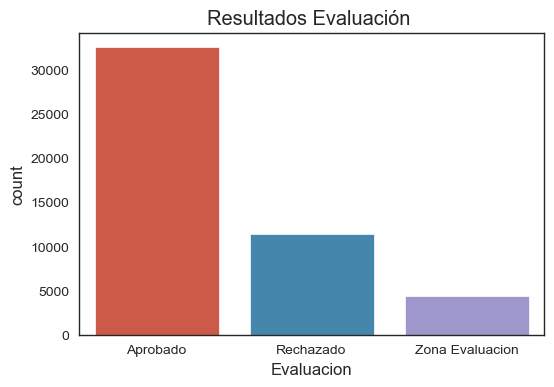

In [187]:
sns.countplot(x = 'Evaluacion', data = df_predict, hue_order = ['Aprobado','Zona Evaluacion', 'Rechazado'] );
plt.title('Resultados Evaluación ');

__Resumen:__

- La data de implementación cuenta con 48.744 observaciones, de los cuales, 48.305 corresponden a créditos de consumo para los cuales se implementa el modelo.  

- Al realizar esto, se obtienen 32.584 (67.45%) donde el crédito es aprobado, 11.356 (23.51%) donde es rechazado y 4.365 casos donde se sugiere evaluar de forma exhaustiva si efectivamente el crédito debe ser rechazado. 